# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import os

## Load All the Data

In [4]:
path = './'
files = os.listdir(path)
files.remove('accuracy copy.ipynb')
files.remove('accuracy.ipynb')
files.remove('Hasil Eksperimen.xlsx')
files.remove('Hasil Eksperimen-1.xlsx')
files.remove('score_bi-lstm_smtp_0.0.xlsx')
files.remove('score_lstm_smtp_0.0.xlsx')
df_preds = dict()
for file in files:
    df_preds[file] = pd.read_csv(file, names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])
df_truth = pd.read_csv('../NUSW-NB15_GT.csv')

In [5]:
df_preds[files[0]].head()

id  binary_error  b_mean  b_iqr  \
0  175.45.176.0-40755-149.171.126.18-25-tcp      0.022245       0      1   
1  175.45.176.0-60595-149.171.126.17-25-tcp      0.022245       0      1   
2  175.45.176.2-58472-149.171.126.17-25-tcp      0.021739       0      1   
3  175.45.176.2-13352-149.171.126.13-25-tcp      0.121091       0      0   
4   175.45.176.0-3844-149.171.126.12-25-tcp      0.022245       0      1   

   b_zscore  floatin_error  f_mean  f_iqr  f_zscore  
0         1    2394.703113       0      1         1  
1         1    2436.598583       0      1         1  
2         1    2278.929385       0      1         1  
3         0   19100.991948       0      1         1  
4         1    2436.598583       0      1         1

In [6]:
df_truth.head()

Start time   Last time Attack category   Attack subcategory Protocol  \
0  1421927414  1421927416  Reconnaissance                 HTTP      tcp   
1  1421927415  1421927415        Exploits     Unix 'r' Service      udp   
2  1421927416  1421927416        Exploits              Browser      tcp   
3  1421927417  1421927417        Exploits  Miscellaneous Batch      tcp   
4  1421927418  1421927418        Exploits           Cisco IOS       tcp   

      Source IP  Source Port  Destination IP  Destination Port  \
0  175.45.176.0        13284  149.171.126.16                80   
1  175.45.176.3        21223  149.171.126.18             32780   
2  175.45.176.2        23357  149.171.126.16                80   
3  175.45.176.2        13792  149.171.126.16              5555   
4  175.45.176.2        26939  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference  .  
0                                                  -  .  
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  .  
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  .  
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  .  
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  .

## Exploratory Data Analysis

In [7]:
for key, val in df_preds.items():
    print(val[['b_iqr']].value_counts())

b_iqr
0        39352
1         5377
Name: count, dtype: int64
b_iqr
0        39751
1         4978
Name: count, dtype: int64
b_iqr
0        39594
1         5154
Name: count, dtype: int64
b_iqr
0        39471
1         5277
Name: count, dtype: int64
b_iqr
0        39880
1         4868
Name: count, dtype: int64
b_iqr
0        40098
1         4650
Name: count, dtype: int64
b_iqr
0        38994
1         5735
Name: count, dtype: int64
b_iqr
0        39934
1         4795
Name: count, dtype: int64
b_iqr
0        39499
1         5249
Name: count, dtype: int64
b_iqr
0        39721
1         5027
Name: count, dtype: int64
b_iqr
0        39561
1         5168
Name: count, dtype: int64
b_iqr
0        39884
1         4864
Name: count, dtype: int64
b_iqr
0        39895
1         4834
Name: count, dtype: int64
b_iqr
0        39752
1         4977
Name: count, dtype: int64
b_iqr
0        39907
1         4841
Name: count, dtype: int64
b_iqr
0        39908
1         4821
Name: count, dtype: int64
b_iqr
0 

In [8]:
for key, val in df_preds.items():
    print(val[['b_zscore']].value_counts())

b_zscore
0           40002
1            4727
Name: count, dtype: int64
b_zscore
0           39898
1            4831
Name: count, dtype: int64
b_zscore
0           40065
1            4683
Name: count, dtype: int64
b_zscore
0           39883
1            4865
Name: count, dtype: int64
b_zscore
0           39883
1            4865
Name: count, dtype: int64
b_zscore
0           40407
1            4341
Name: count, dtype: int64
b_zscore
0           39714
1            5015
Name: count, dtype: int64
b_zscore
0           39955
1            4774
Name: count, dtype: int64
b_zscore
0           39917
1            4831
Name: count, dtype: int64
b_zscore
0           39922
1            4826
Name: count, dtype: int64
b_zscore
0           39886
1            4843
Name: count, dtype: int64
b_zscore
0           39891
1            4857
Name: count, dtype: int64
b_zscore
0           39910
1            4819
Name: count, dtype: int64
b_zscore
0           39891
1            4838
Name: count, dtype: int64
b_zsco

In [9]:
df_truth.isnull().sum()

Start time                0
Last time                 0
Attack category           0
Attack subcategory     4097
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               1
Attack Reference      50638
.                         0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [10]:
df_truth['Source Port'] = df_truth['Source Port'].astype(int)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(int)
df_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Start time          174347 non-null  int64 
 1   Last time           174347 non-null  int64 
 2   Attack category     174347 non-null  object
 3   Attack subcategory  170250 non-null  object
 4   Protocol            174347 non-null  object
 5   Source IP           174347 non-null  object
 6   Source Port         174347 non-null  int64 
 7   Destination IP      174347 non-null  object
 8   Destination Port    174347 non-null  int64 
 9   Attack Name         174346 non-null  object
 10  Attack Reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 16.0+ MB


In [11]:
df_truth['Source Port'] = df_truth['Source Port'].astype(str)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(str)
df_truth['id'] = df_truth[['Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']].apply("-".join, axis=1)

## Making Predictions

In [12]:
for key, df_pred in df_preds.items():
    df_pred["predicted"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

In [13]:
for key, df_pred in df_preds.items():
    print(df_pred[df_pred['predicted']==1])


                                             id  binary_error  b_mean  b_iqr  \
10     175.45.176.2-30357-149.171.126.16-25-tcp      0.030864       0      1   
46     175.45.176.0-21014-149.171.126.15-25-tcp      0.015925       0      1   
70     175.45.176.1-53096-149.171.126.13-25-tcp      0.022245       0      1   
73     175.45.176.1-13963-149.171.126.13-25-tcp      0.022245       0      1   
79     175.45.176.3-37532-149.171.126.19-25-tcp      0.022245       0      1   
...                                         ...           ...     ...    ...   
44170  175.45.176.0-40991-149.171.126.11-25-tcp      0.022245       0      1   
44182  175.45.176.2-43215-149.171.126.15-25-tcp      0.016178       0      1   
44187  175.45.176.2-30290-149.171.126.13-25-tcp      0.021739       0      1   
44194  175.45.176.2-28720-149.171.126.15-25-tcp      0.110974       0      1   
44195  175.45.176.3-46257-149.171.126.19-25-tcp      0.015925       0      1   

       b_zscore  floatin_error  f_mean 

In [14]:
for key, df_pred in df_preds.items():
    print(df_pred[df_pred['predicted']==0])

                                             id  binary_error  b_mean  b_iqr  \
0      175.45.176.0-40755-149.171.126.18-25-tcp      0.022245       0      1   
1      175.45.176.0-60595-149.171.126.17-25-tcp      0.022245       0      1   
2      175.45.176.2-58472-149.171.126.17-25-tcp      0.021739       0      1   
3      175.45.176.2-13352-149.171.126.13-25-tcp      0.121091       0      0   
4       175.45.176.0-3844-149.171.126.12-25-tcp      0.022245       0      1   
...                                         ...           ...     ...    ...   
44724     59.166.0.9-21800-149.171.126.0-25-tcp      0.126643       0      0   
44725      59.166.0.4-6591-149.171.126.6-25-tcp      0.121335       0      0   
44726      59.166.0.5-7481-149.171.126.2-25-tcp      0.121335       0      0   
44727     59.166.0.0-12790-149.171.126.2-25-tcp      0.121335       0      0   
44728     59.166.0.1-41608-149.171.126.1-25-tcp      0.119373       0      0   

       b_zscore  floatin_error  f_mean 

In [74]:
df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv('../mcnemar/ftp/pred_0.0.csv')

OSError: Cannot save file into a non-existent directory: '../mcnemar/ftp'

## Calculating Score

In [15]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

### Detection Rate

In [16]:
from sklearn.metrics import recall_score

score = dict()
for key, val in df_preds.items():
    score[key] = dict()
    score[key]['Detection Rate'] = dict()
    for method in methods:
        if method == 'binary':
            for i in threshold:
                acc = recall_score(val[i], val['predicted'])
                score[key]['Detection Rate'][i] = acc
                print(f'Recall-{key}-Binary-{i}: {acc}')
        else:
            for i in threshold_2:
                acc = recall_score(val[i], val['predicted'])
                score[key]['Detection Rate'][i] = acc
                print(f'Recall-{key}-Floating-{i}: {acc}')  

Recall-result-lstm-tcp25-hl2-seq5-do0.2-oov1000-combined-00025.pcap.csv-Binary-b_mean: 0.8064516129032258
Recall-result-lstm-tcp25-hl2-seq5-do0.2-oov1000-combined-00025.pcap.csv-Binary-b_iqr: 0.7387018783708388
Recall-result-lstm-tcp25-hl2-seq5-do0.2-oov1000-combined-00025.pcap.csv-Binary-b_zscore: 0.8339327268880897
Recall-result-lstm-tcp25-hl2-seq5-do0.2-oov1000-combined-00025.pcap.csv-Floating-f_mean: 0.25
Recall-result-lstm-tcp25-hl2-seq5-do0.2-oov1000-combined-00025.pcap.csv-Floating-f_iqr: 0.8384951153606319
Recall-result-lstm-tcp25-hl2-seq5-do0.2-oov1000-combined-00025.pcap.csv-Floating-f_zscore: 0.8414354266638848
Recall-result-lstm-tcp25-hl2-seq4-do0.2-oov1000-combined-00025.pcap.csv-Binary-b_mean: 0.13333333333333333
Recall-result-lstm-tcp25-hl2-seq4-do0.2-oov1000-combined-00025.pcap.csv-Binary-b_iqr: 0.8099638408999599
Recall-result-lstm-tcp25-hl2-seq4-do0.2-oov1000-combined-00025.pcap.csv-Binary-b_zscore: 0.8341958186710826
Recall-result-lstm-tcp25-hl2-seq4-do0.2-oov1000-co

### Confussion Matrix

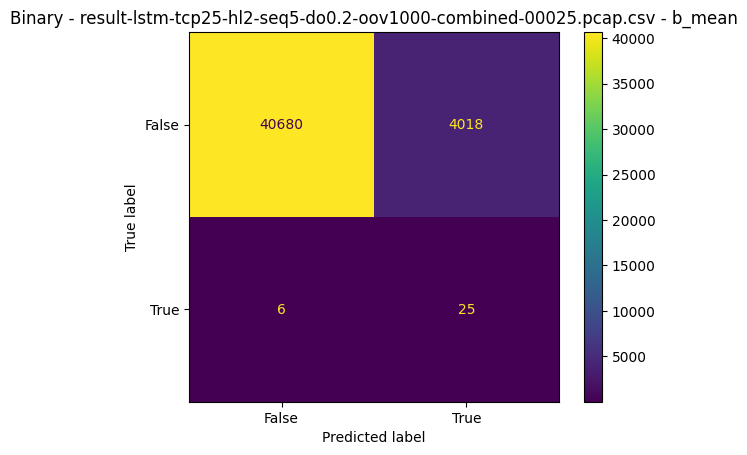

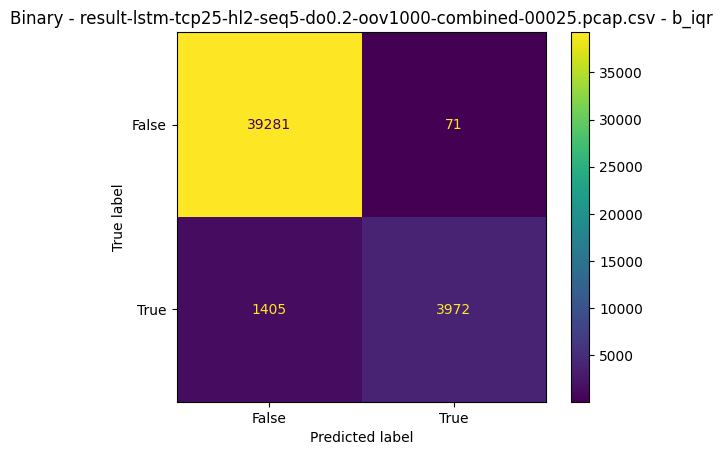

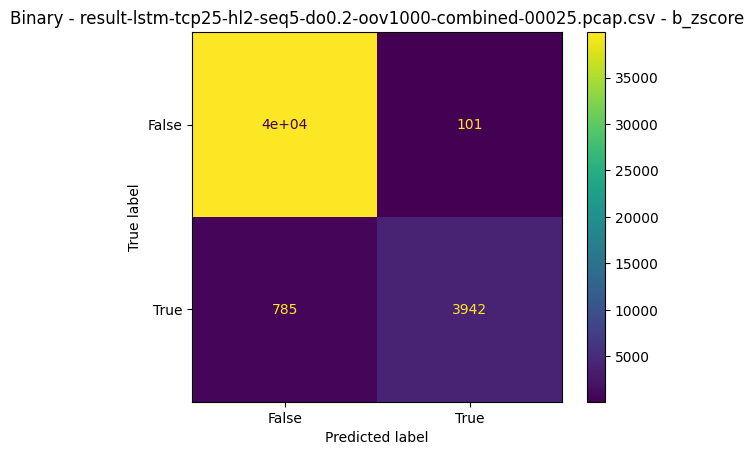

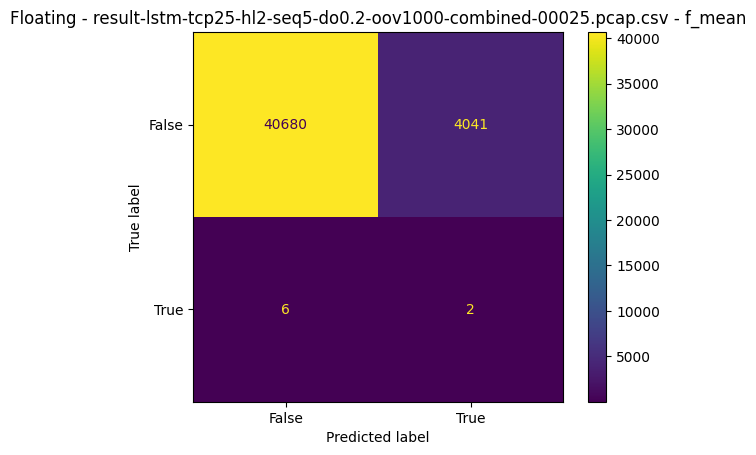

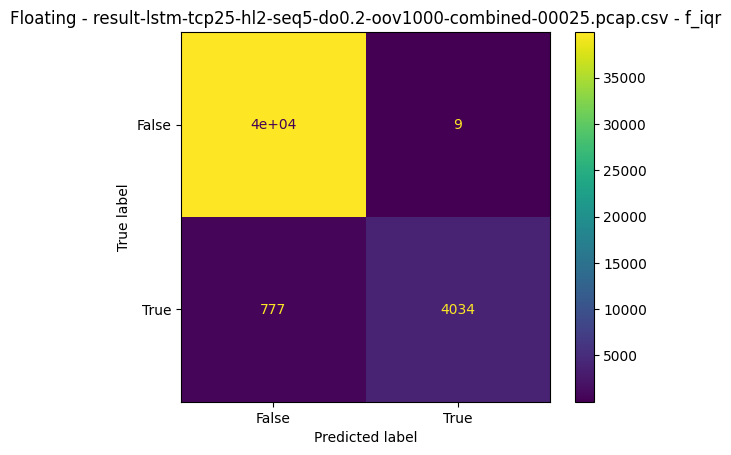

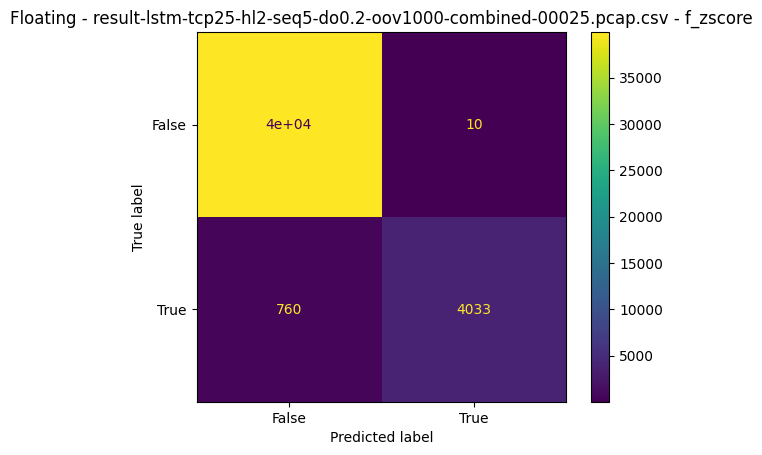

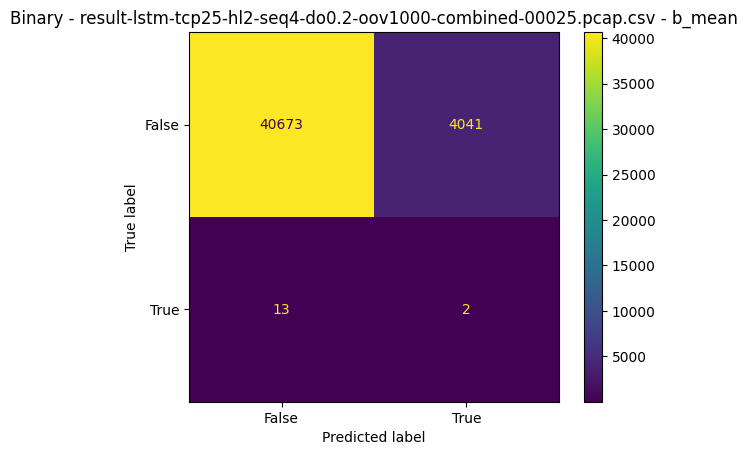

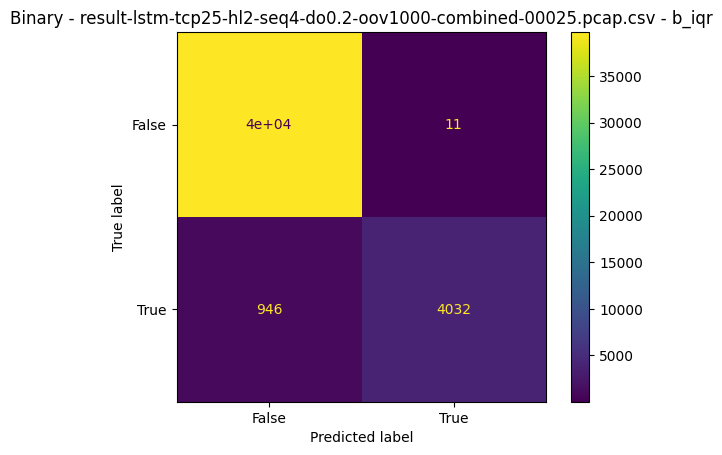

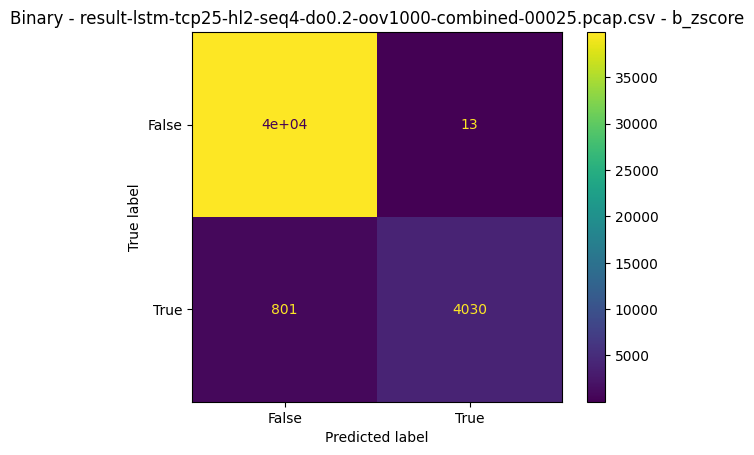

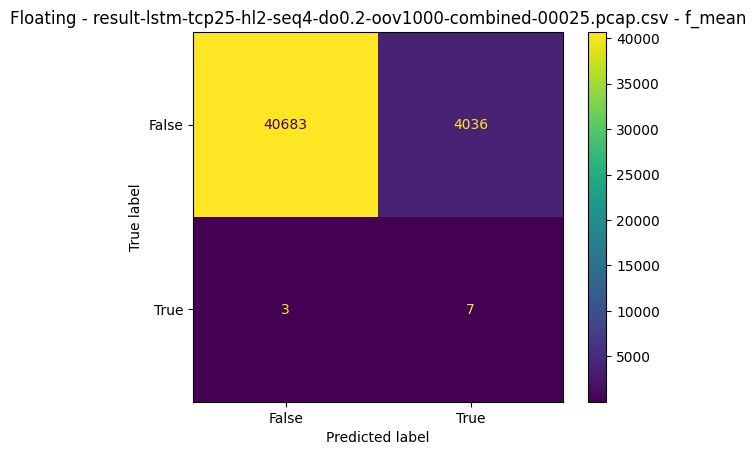

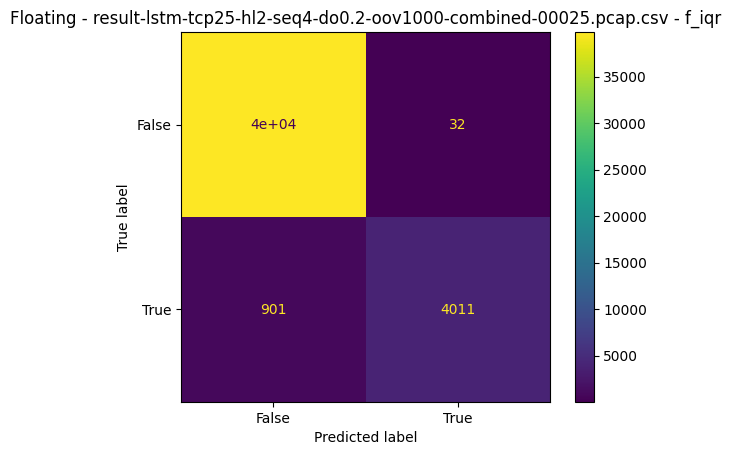

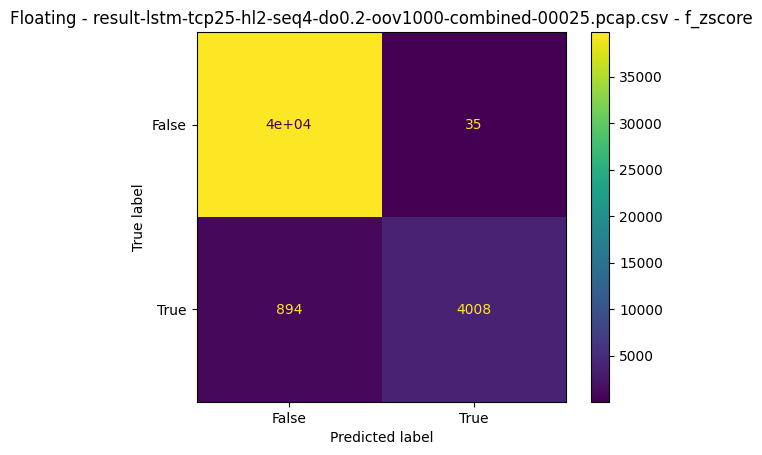

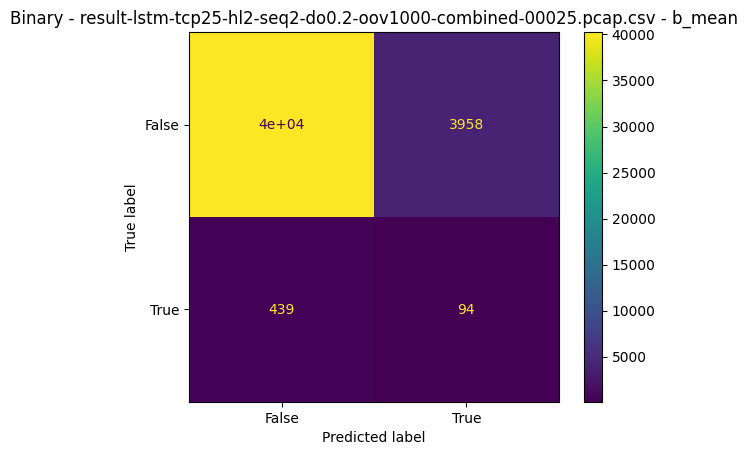

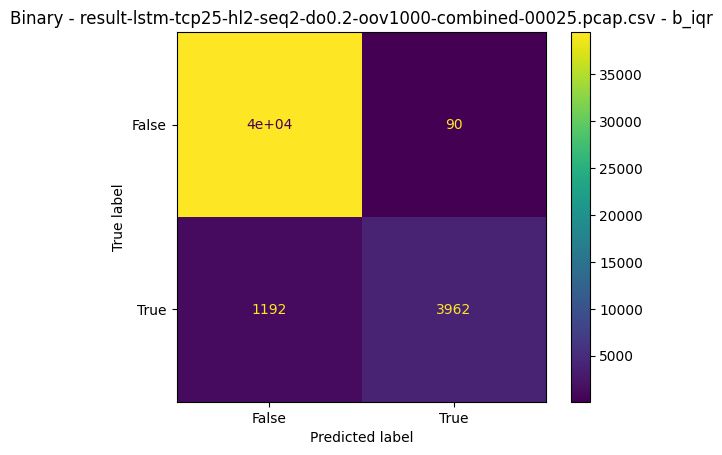

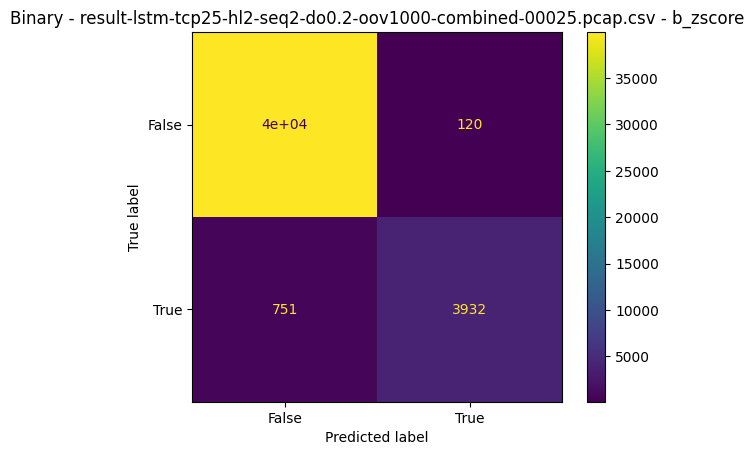

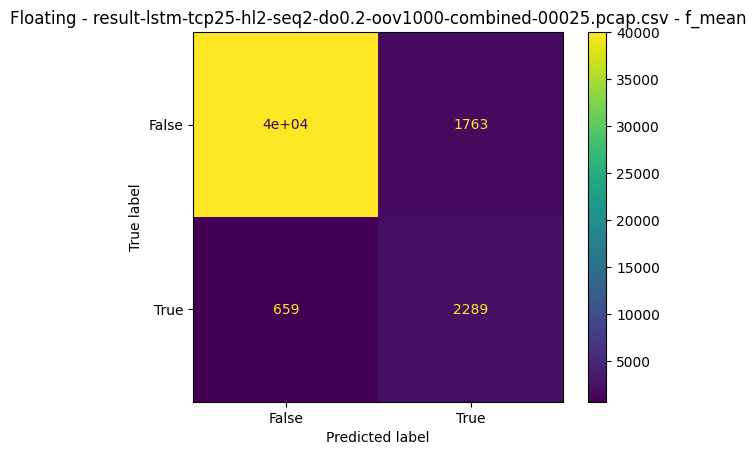

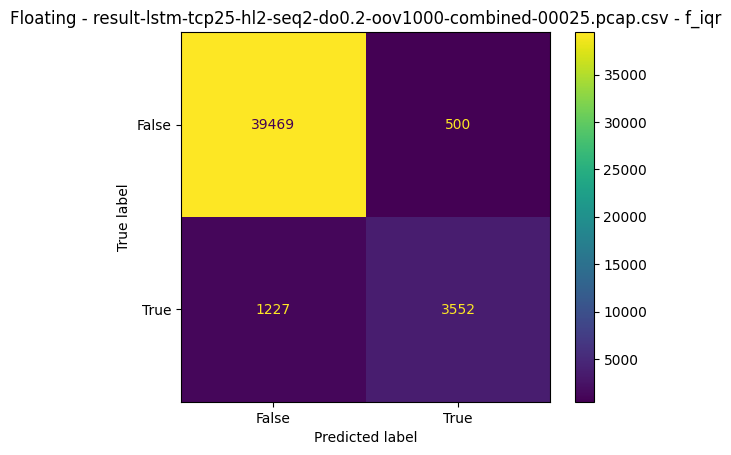

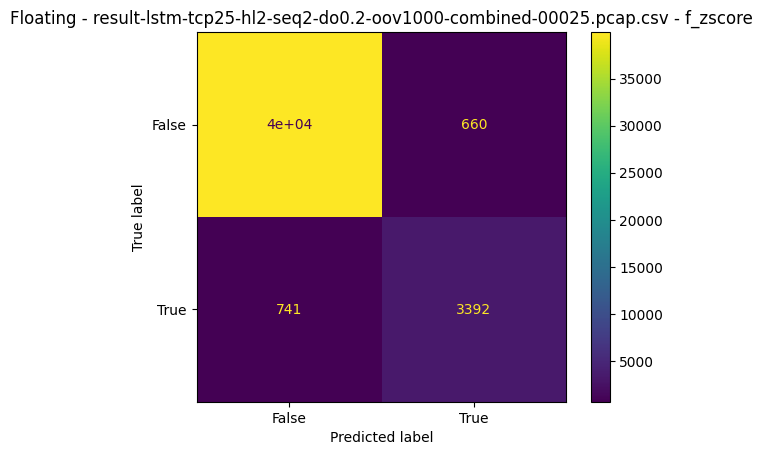

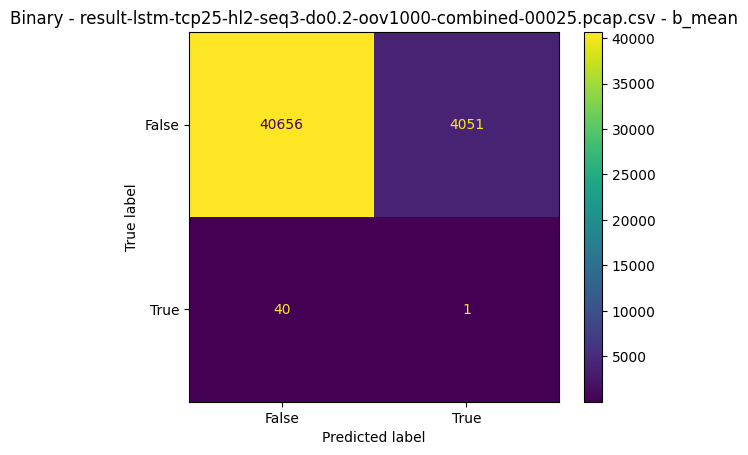

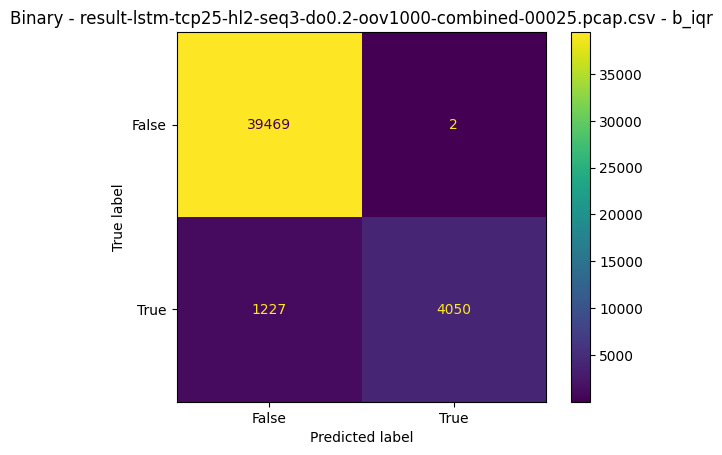

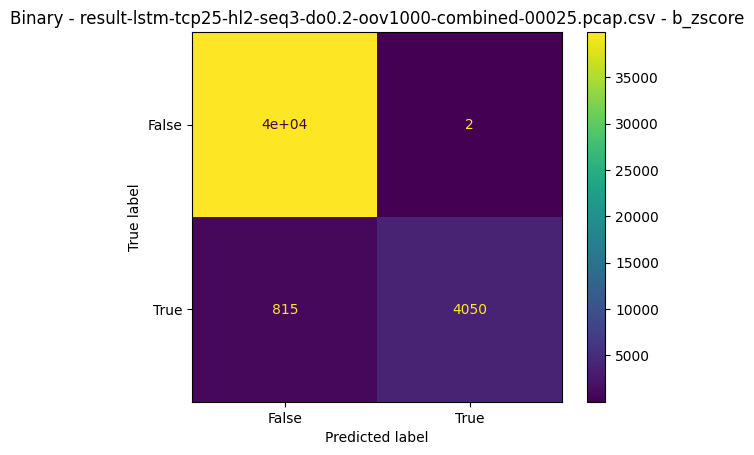

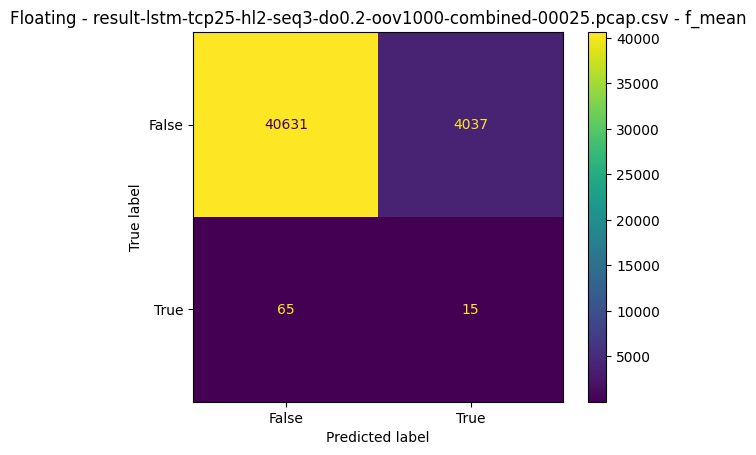

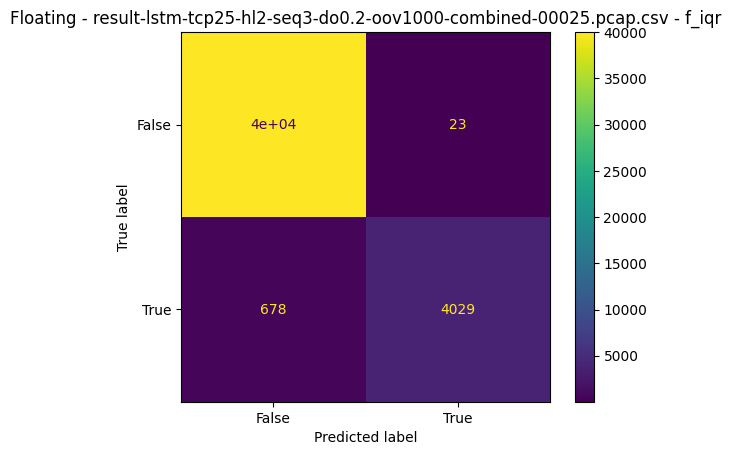

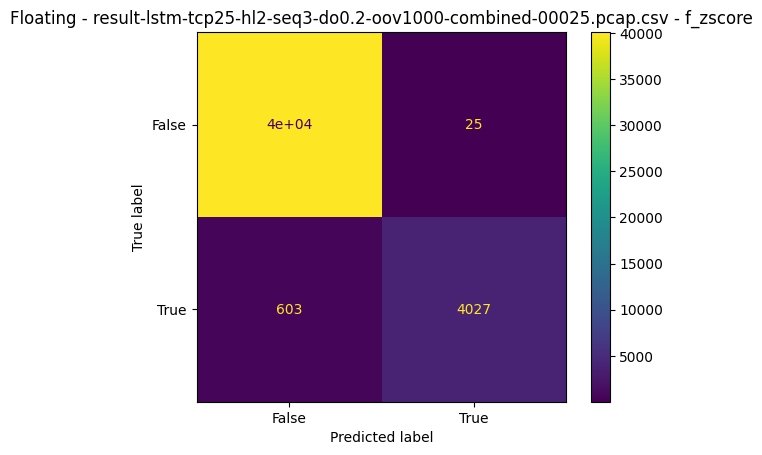

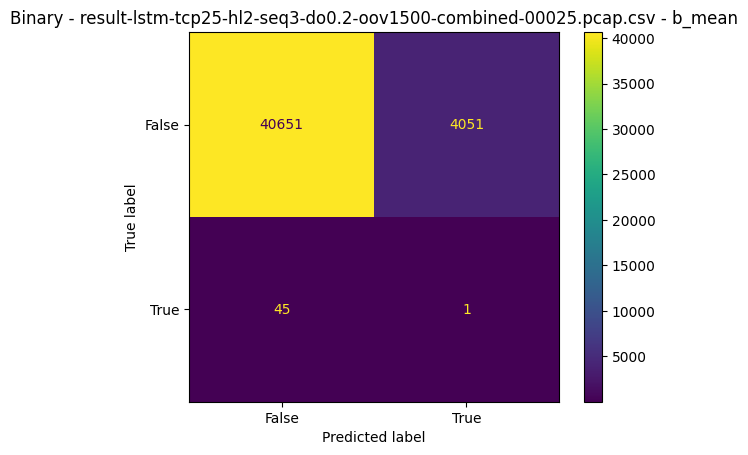

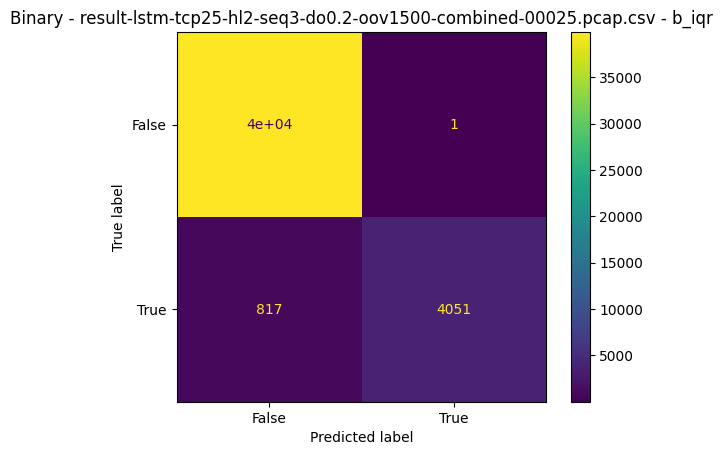

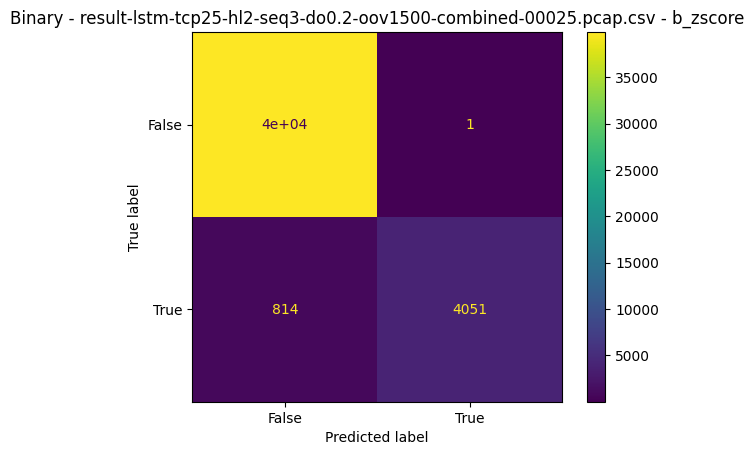

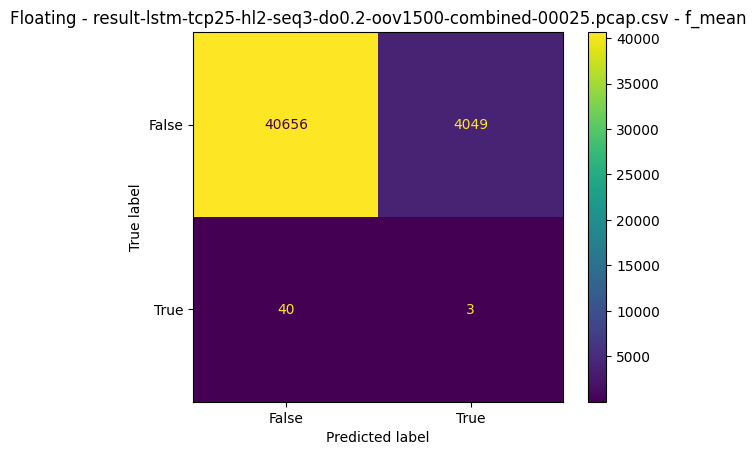

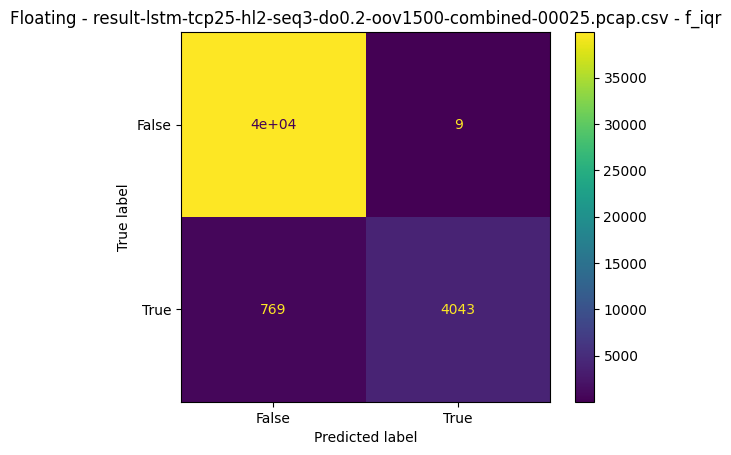

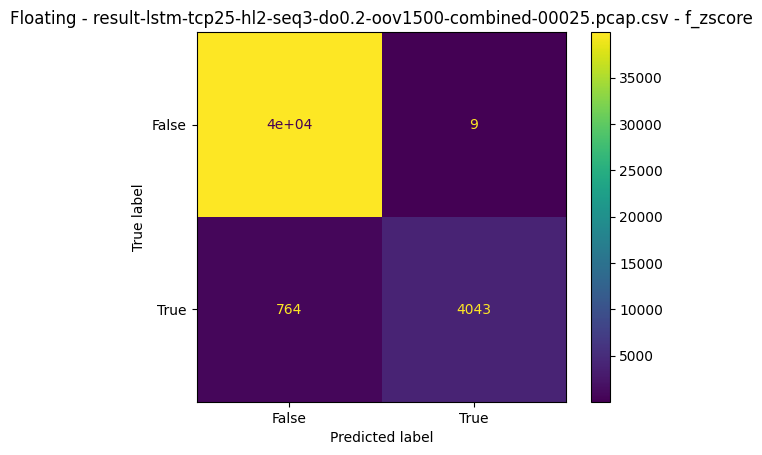

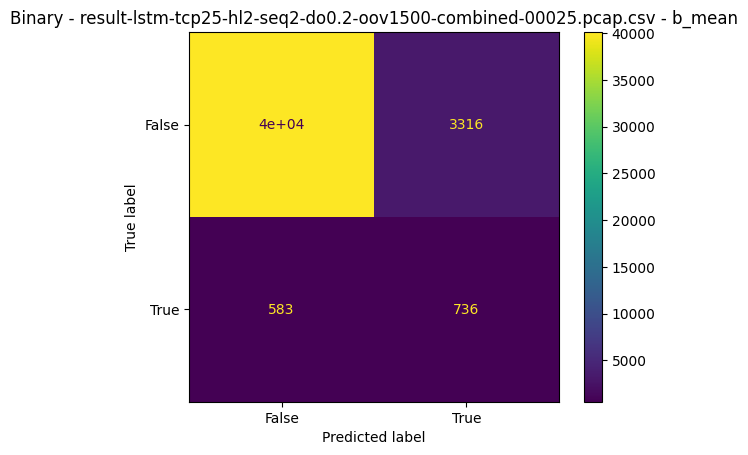

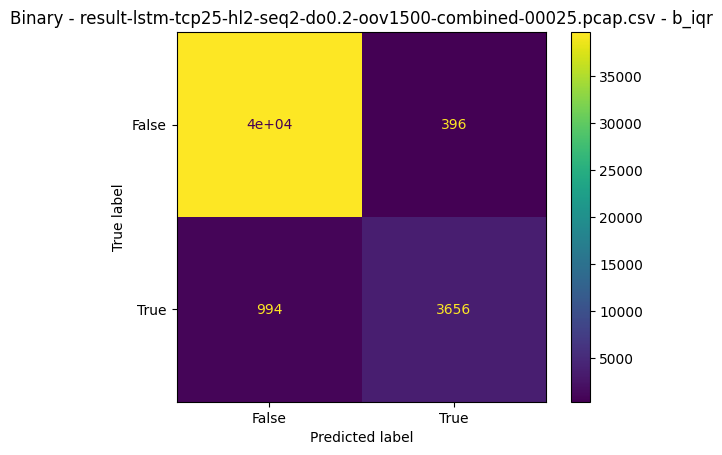

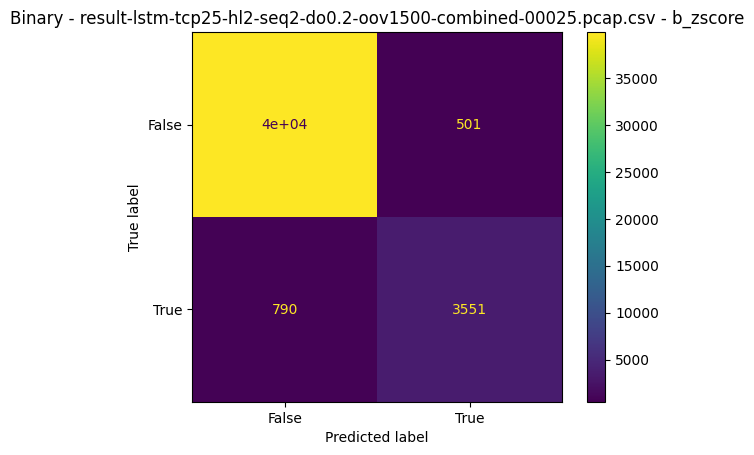

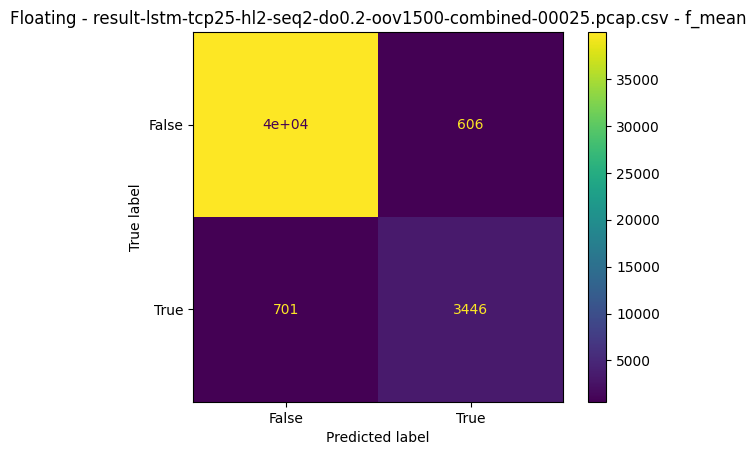

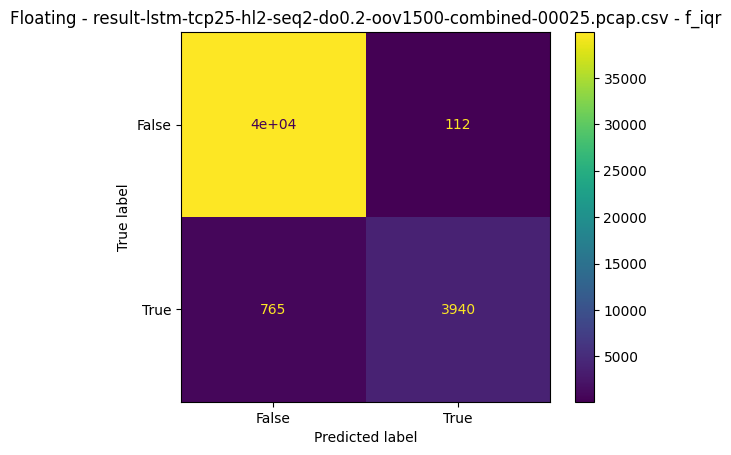

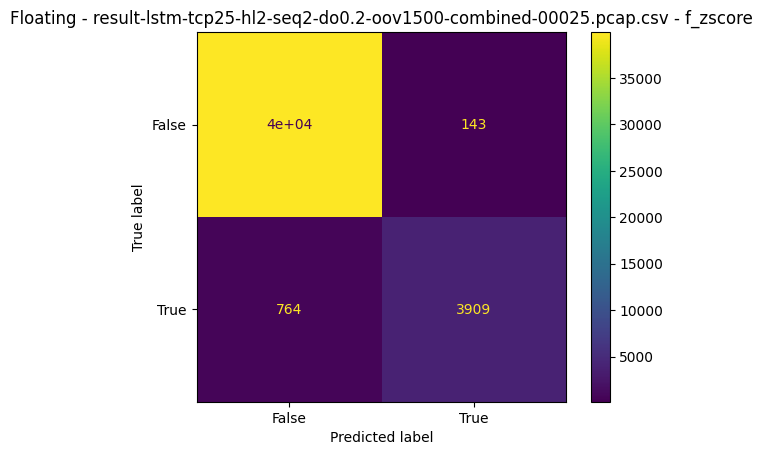

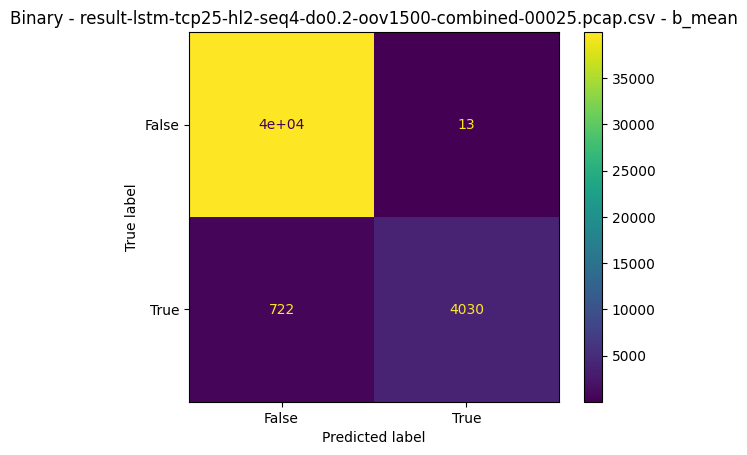

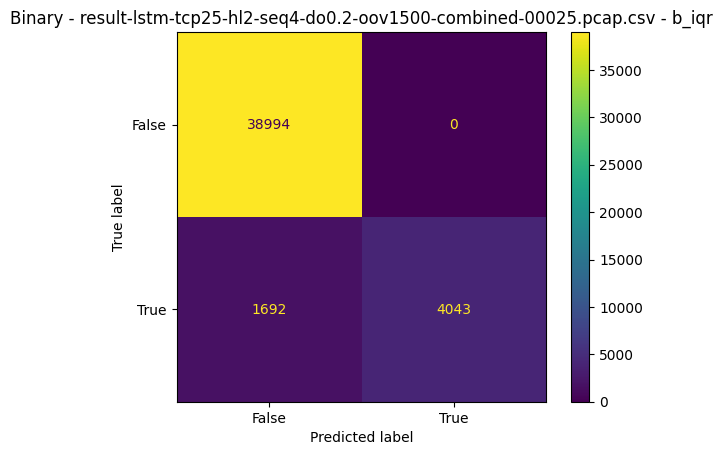

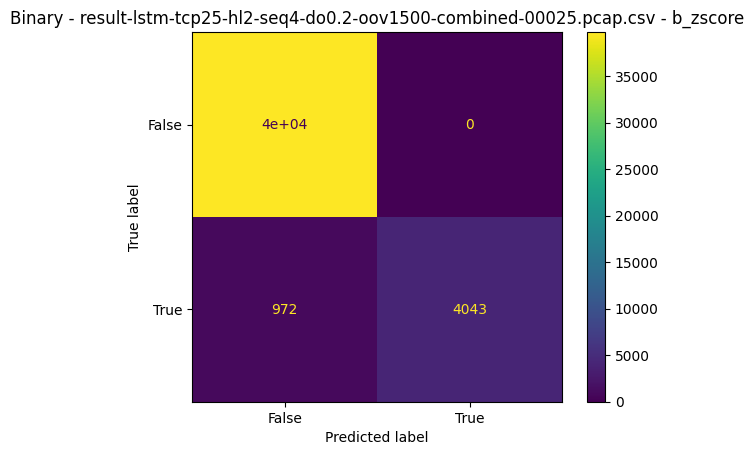

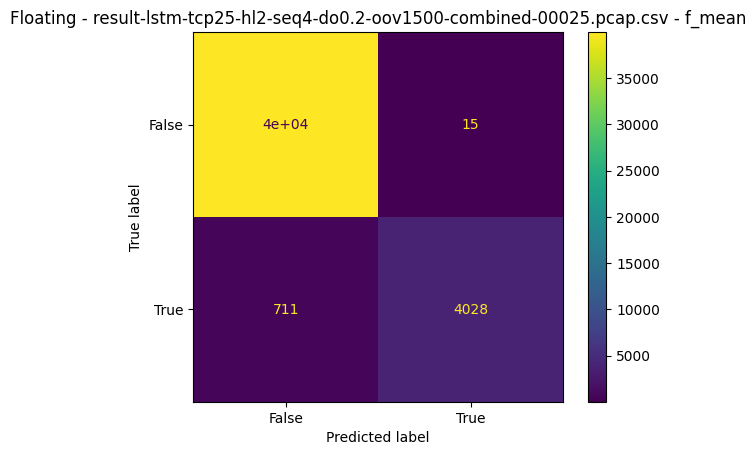

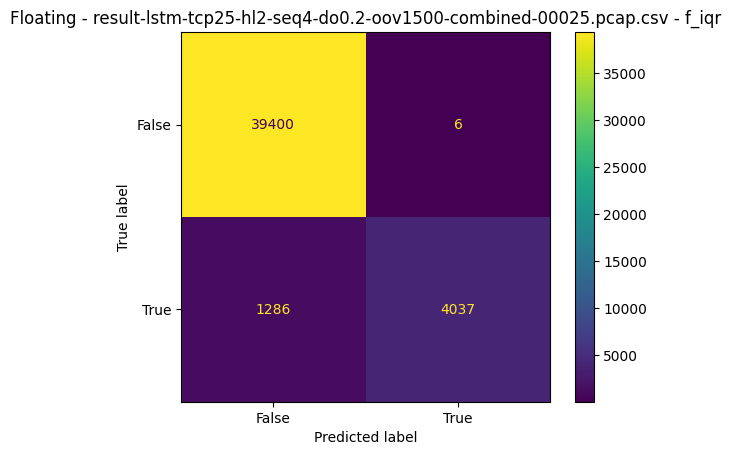

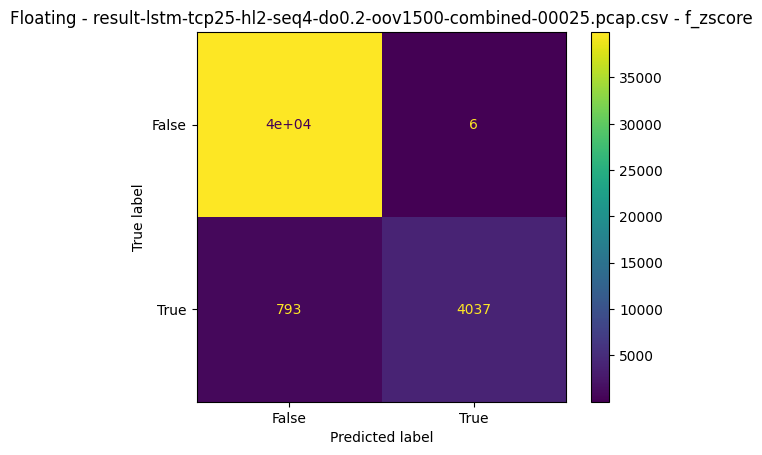

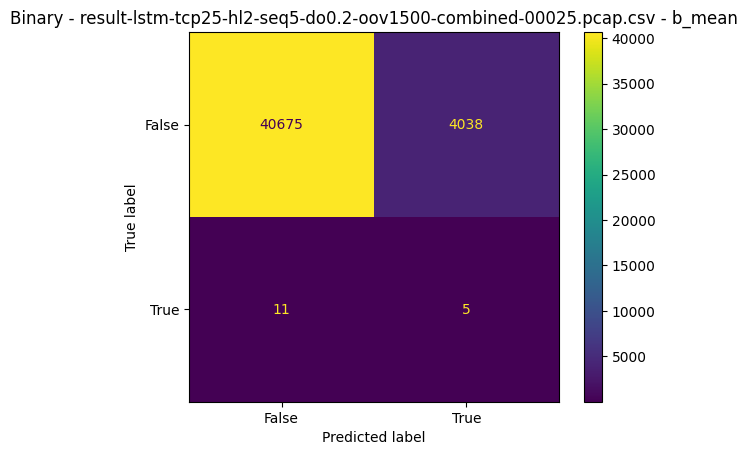

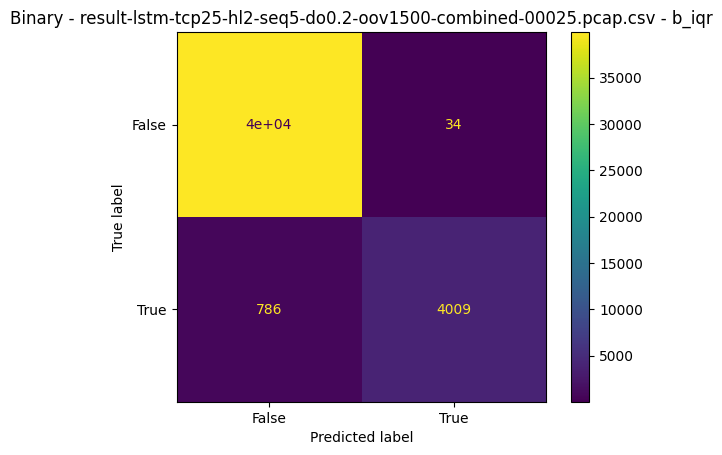

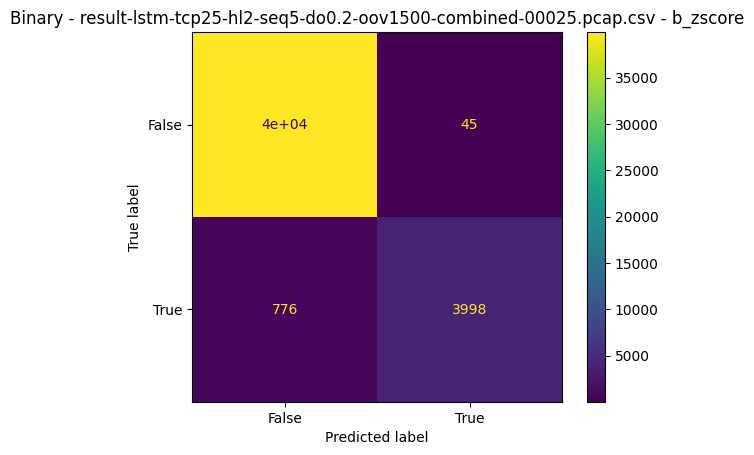

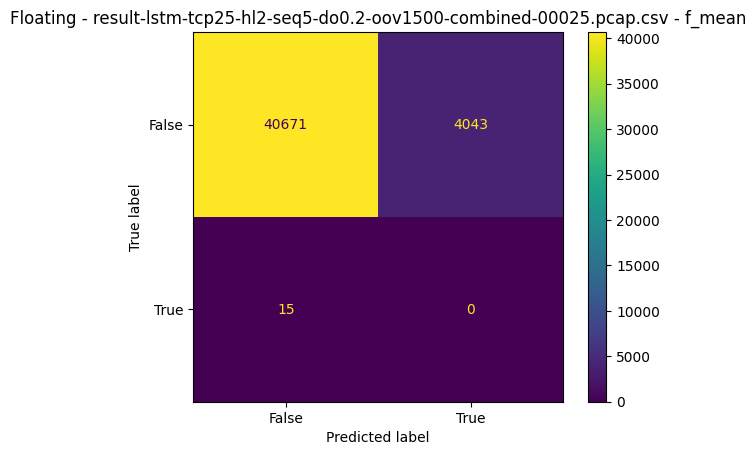

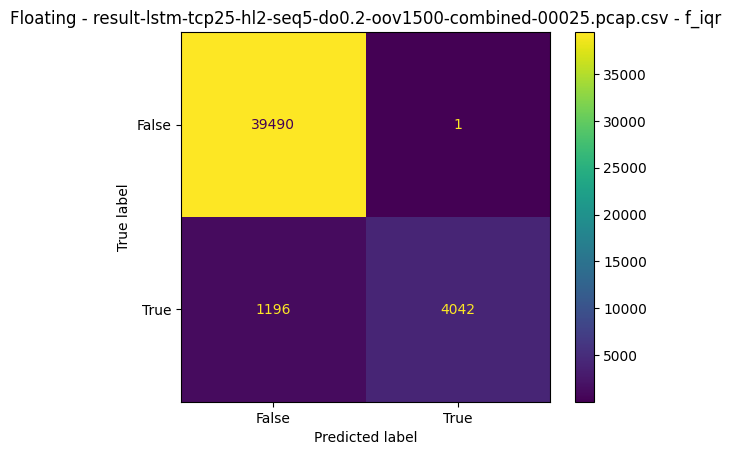

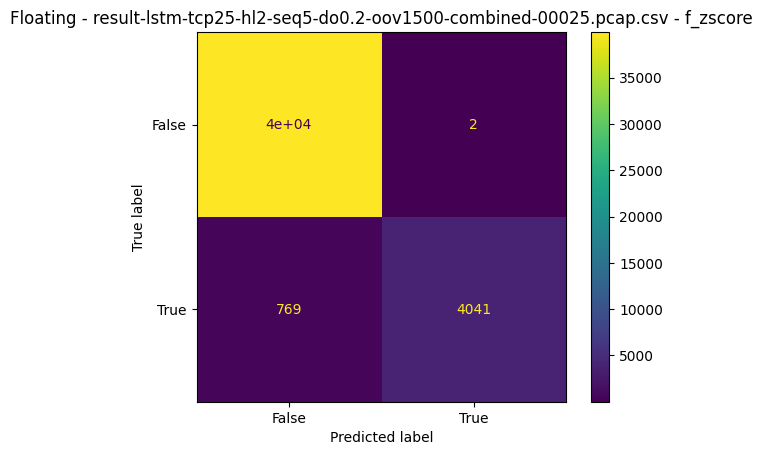

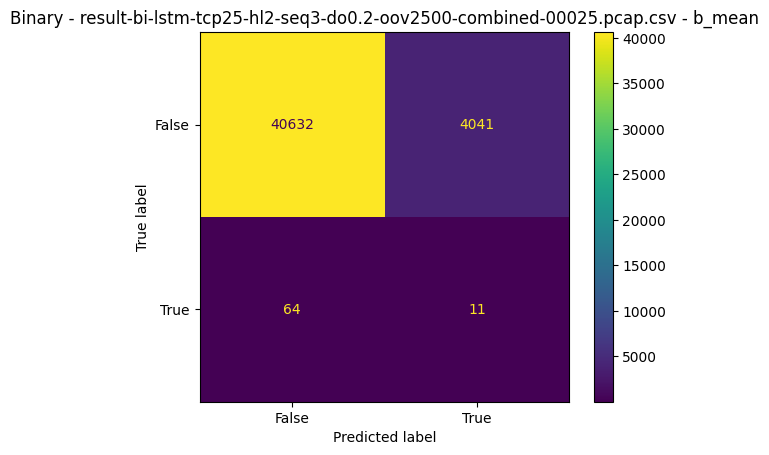

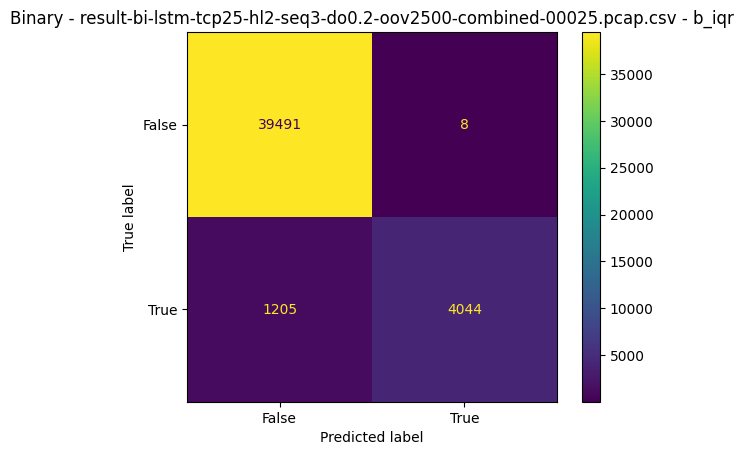

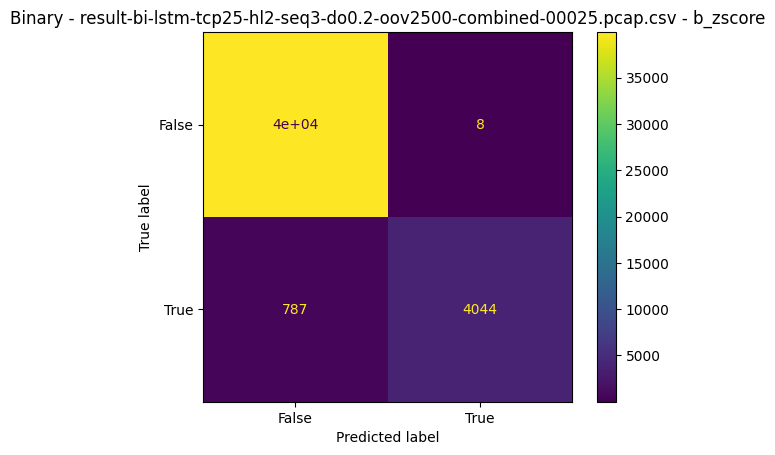

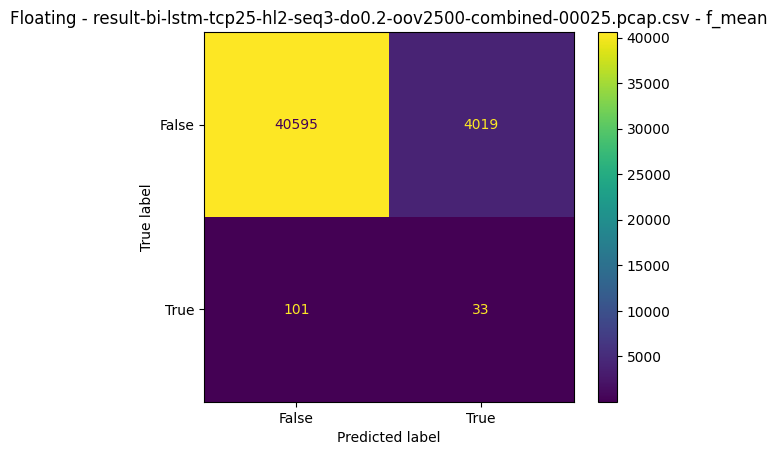

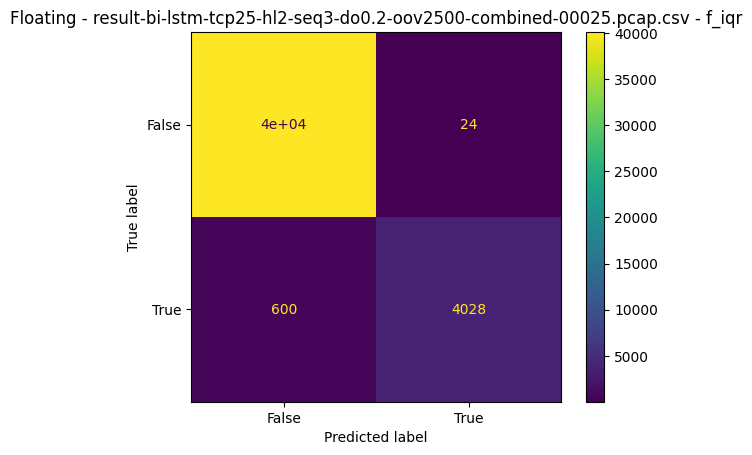

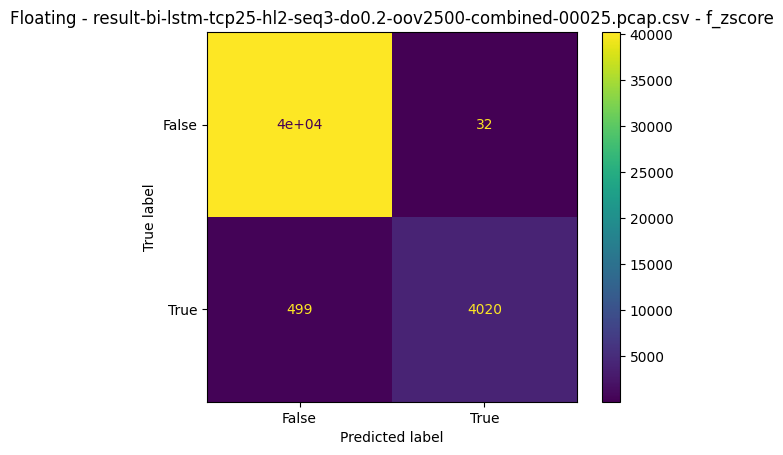

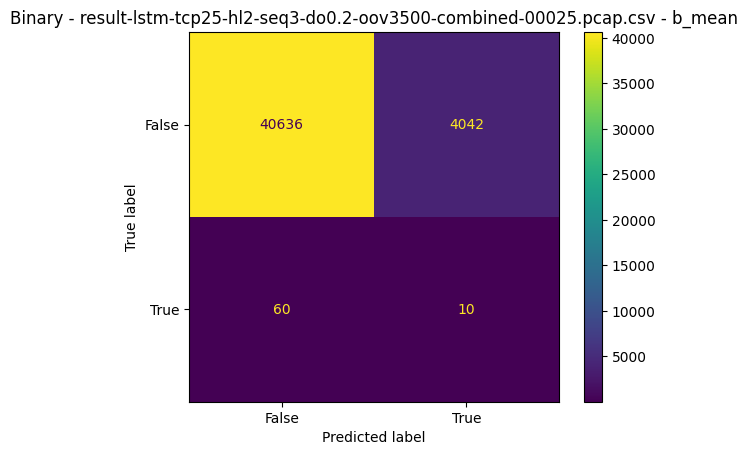

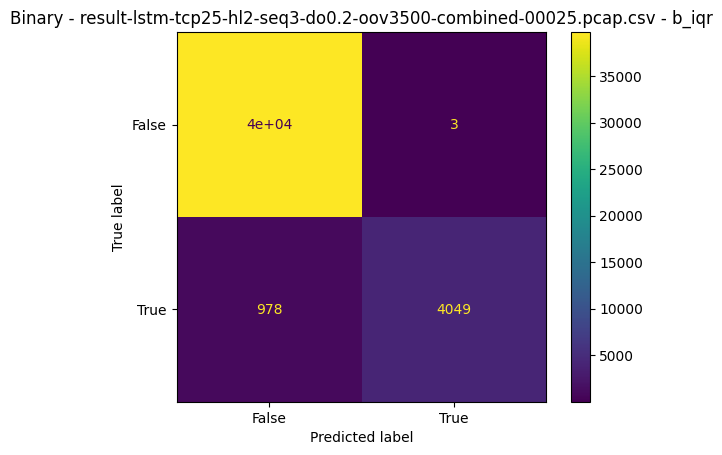

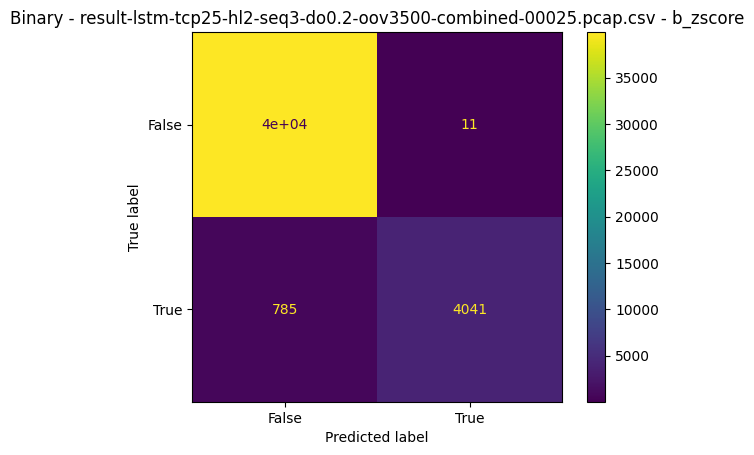

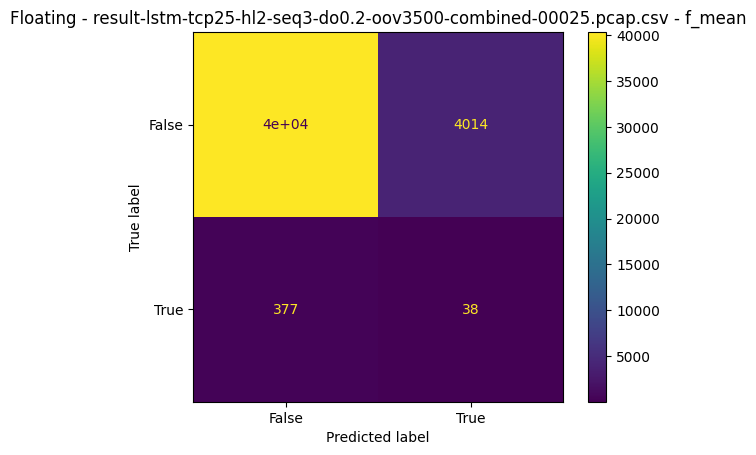

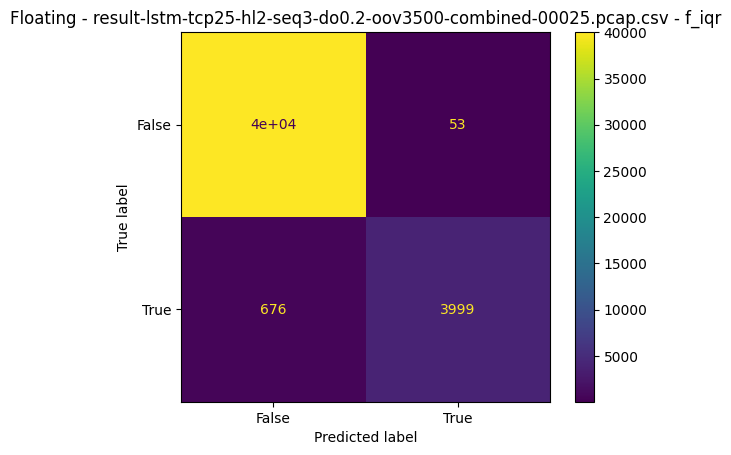

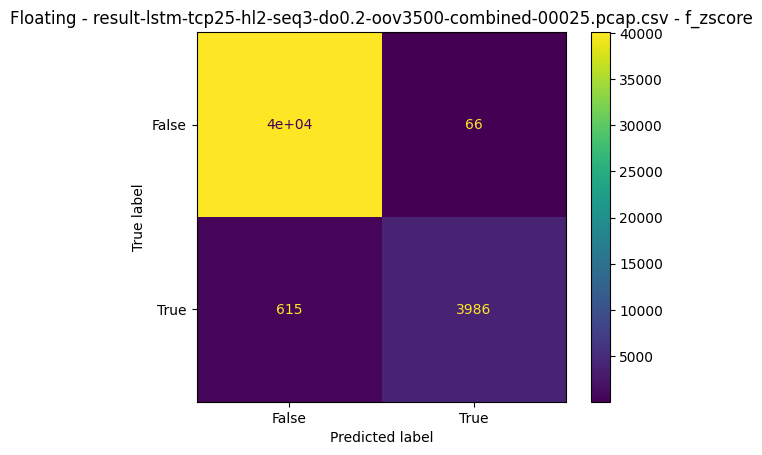

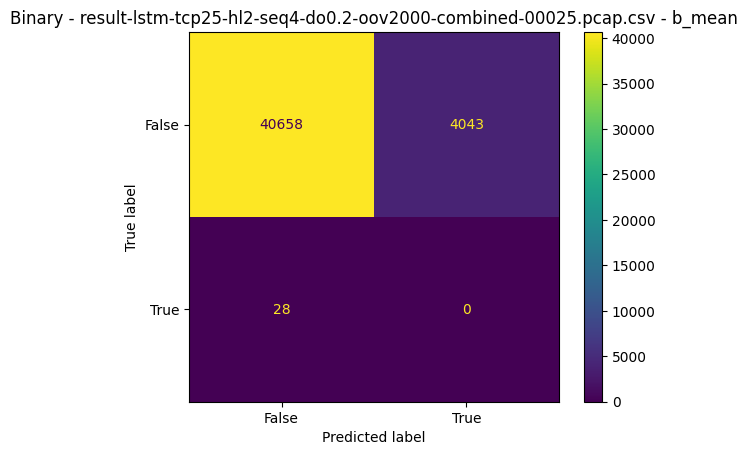

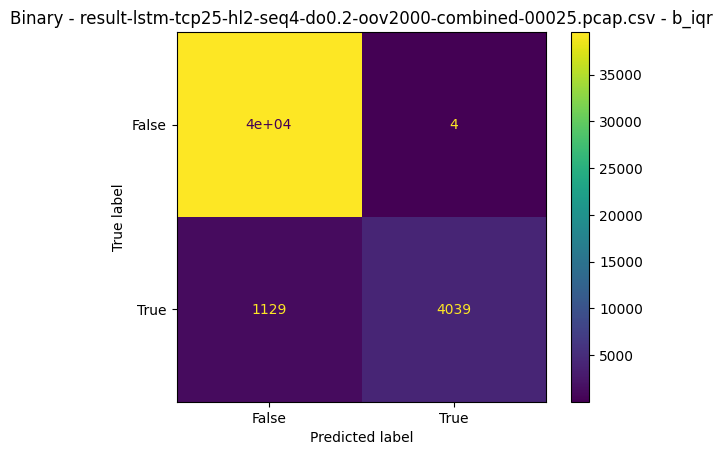

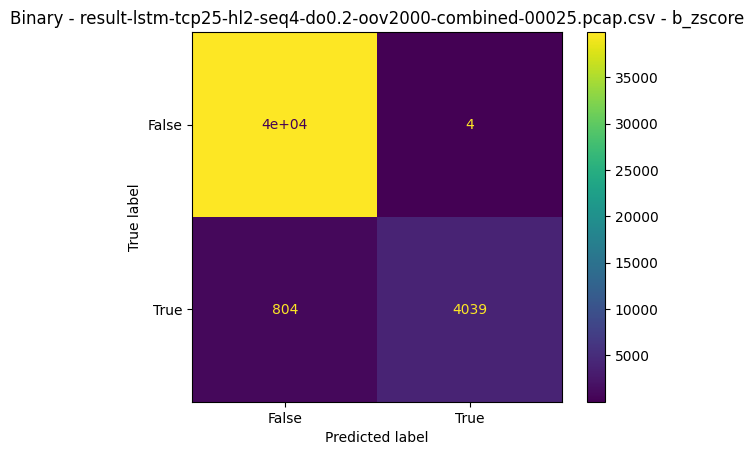

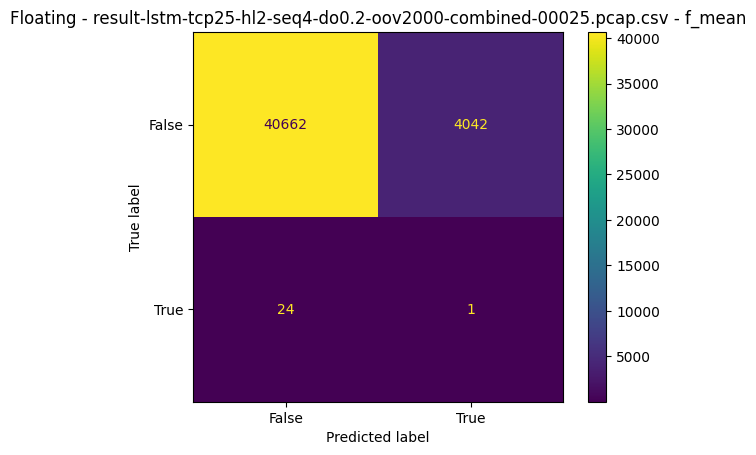

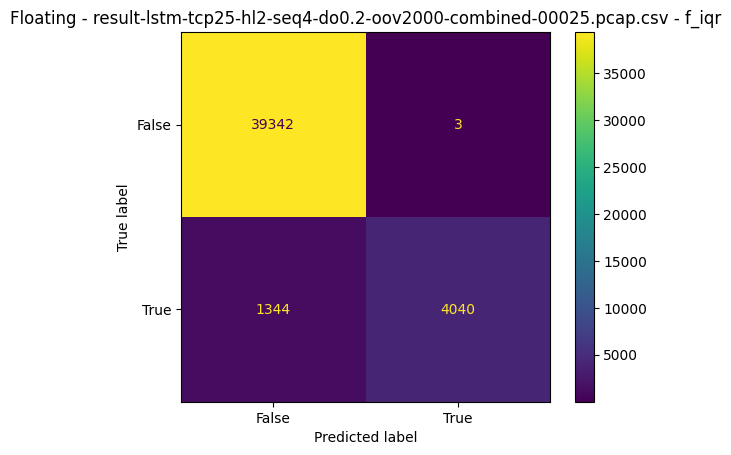

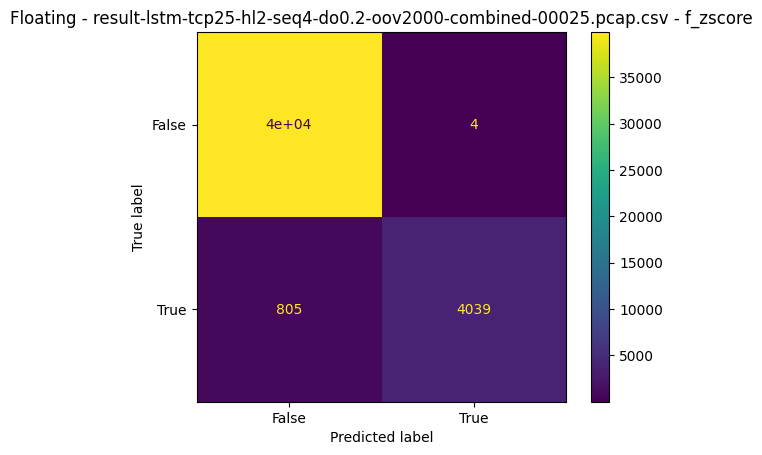

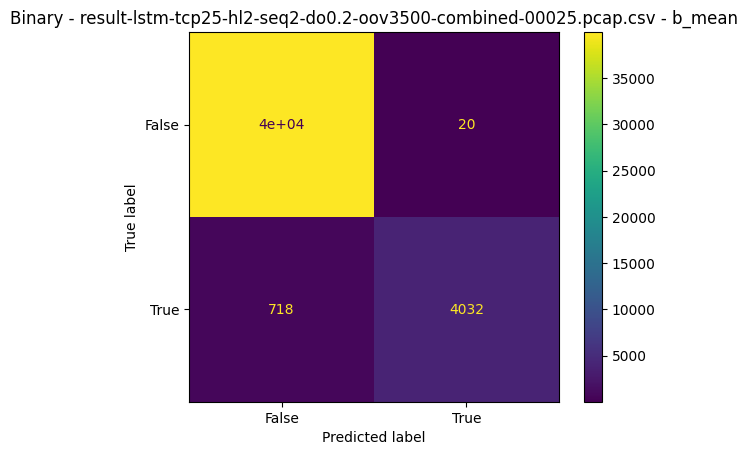

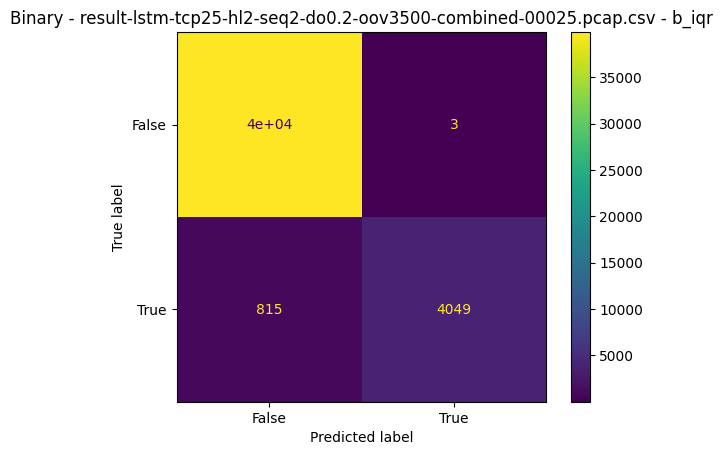

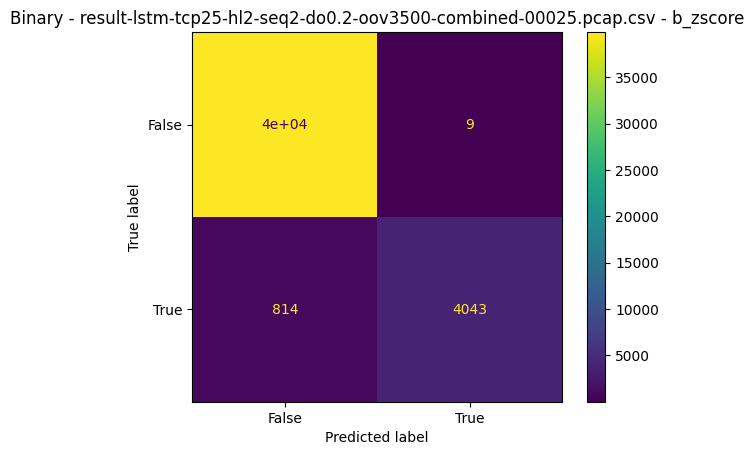

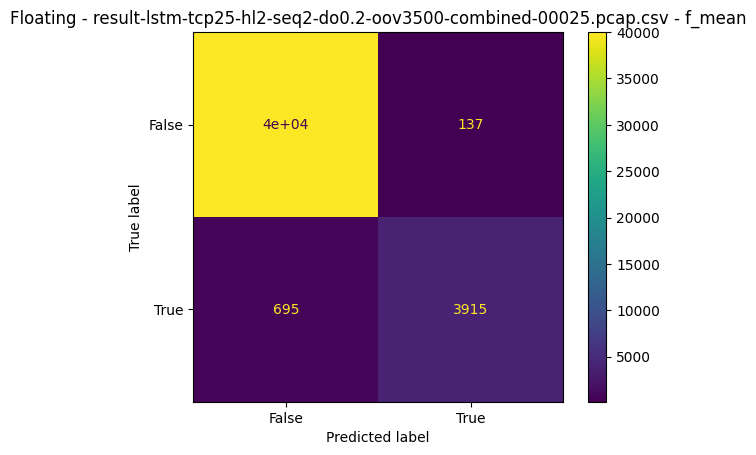

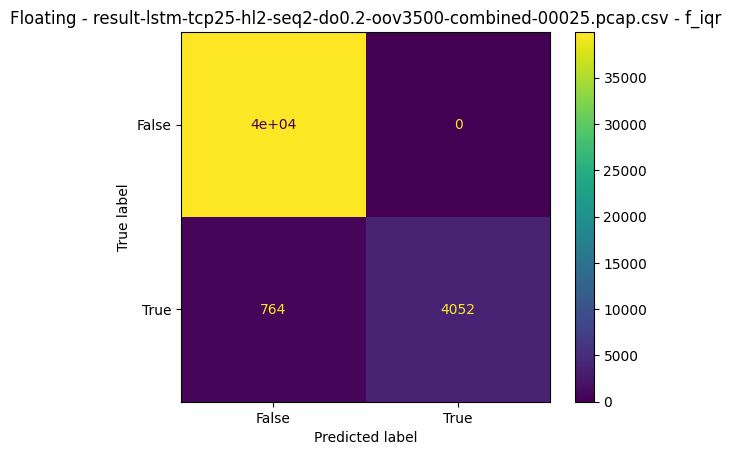

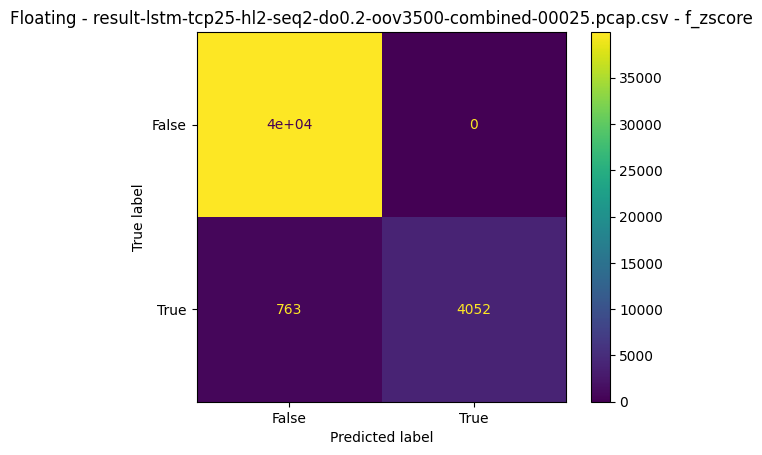

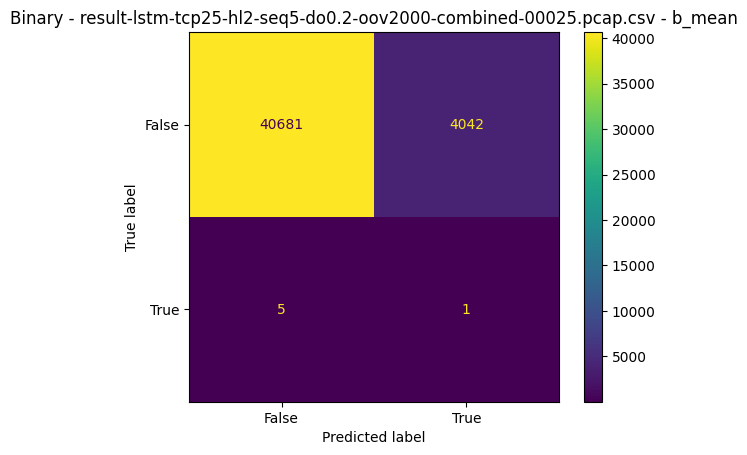

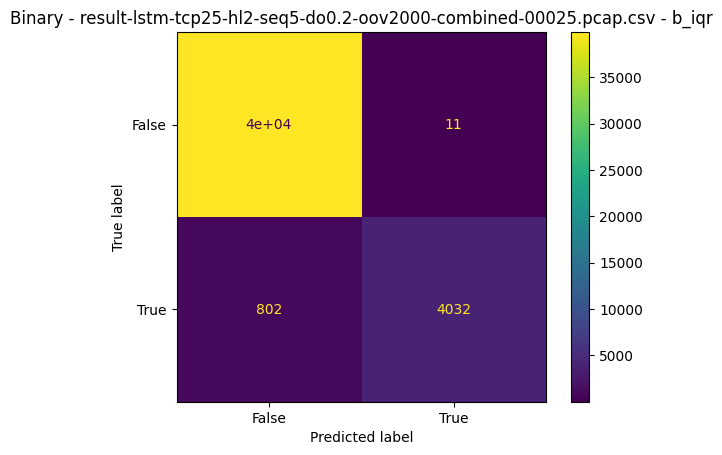

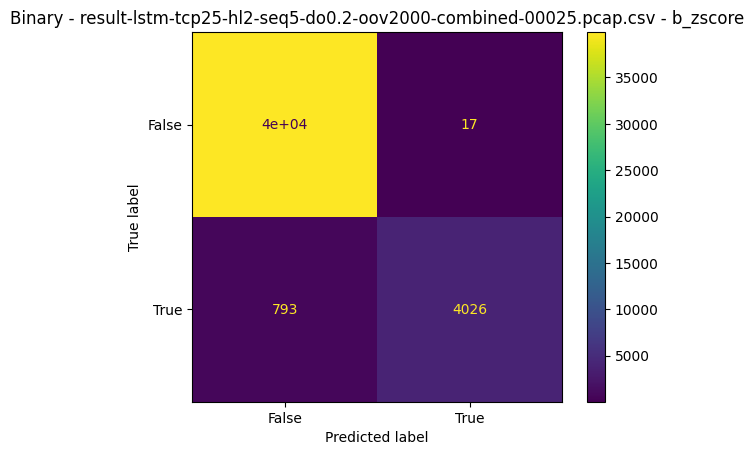

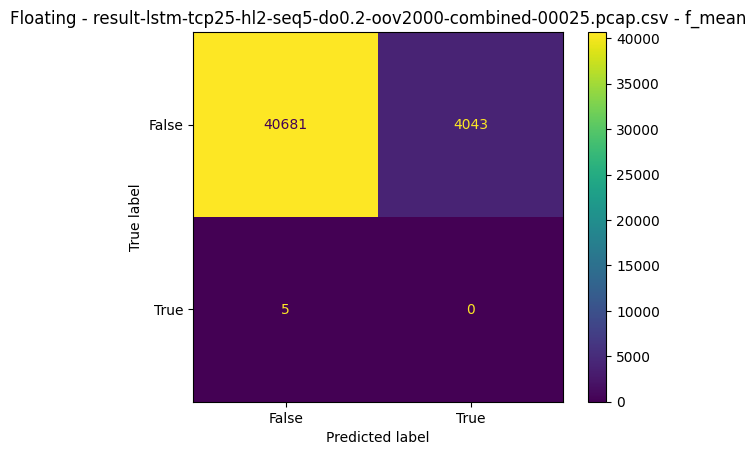

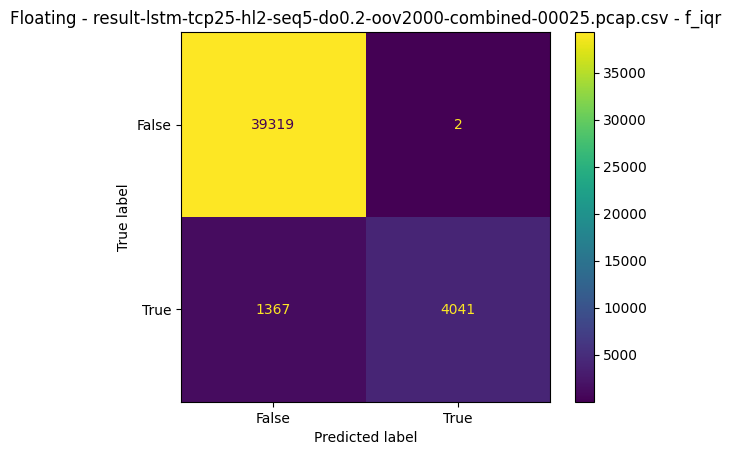

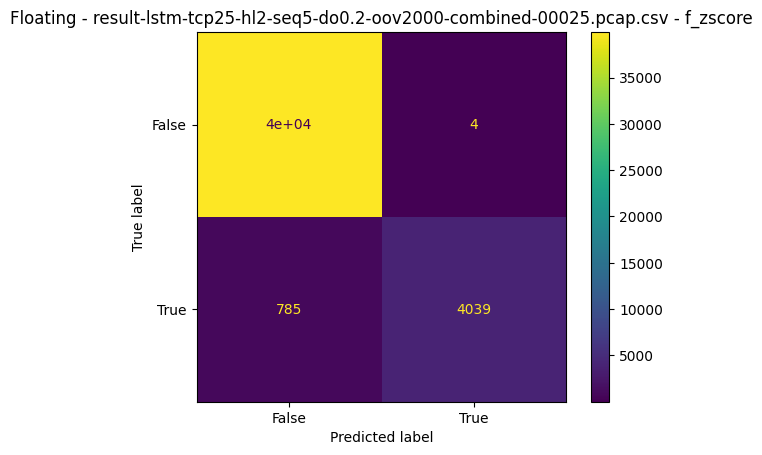

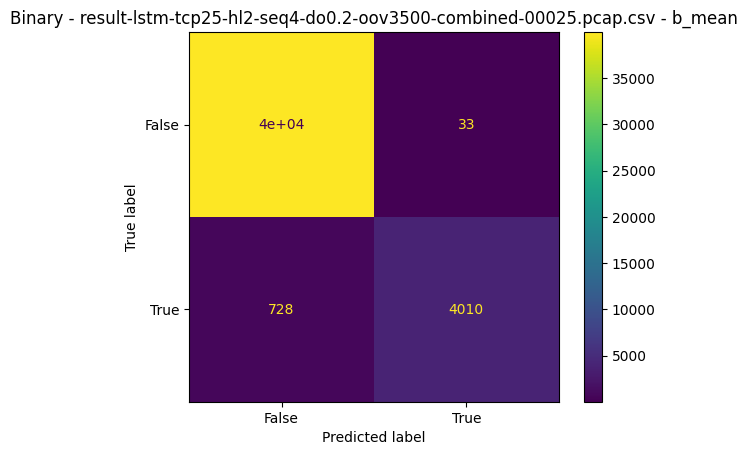

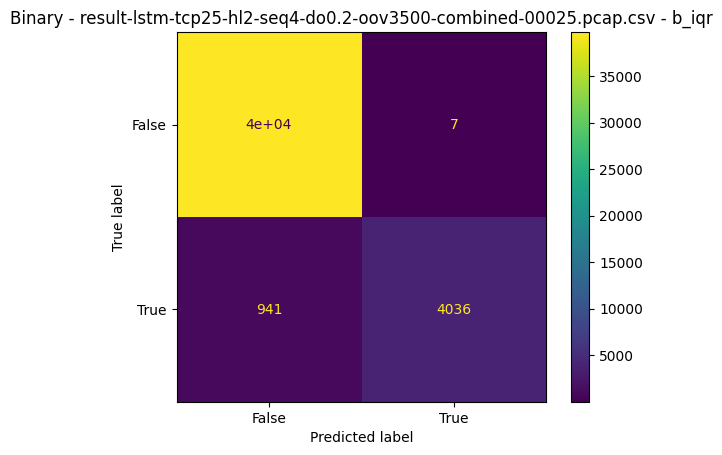

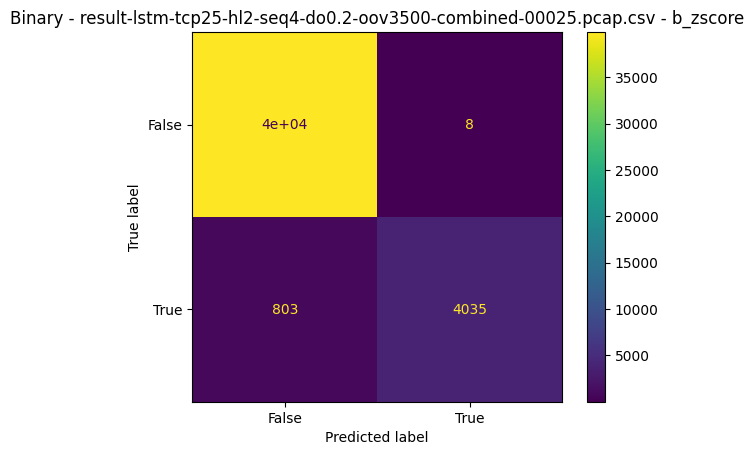

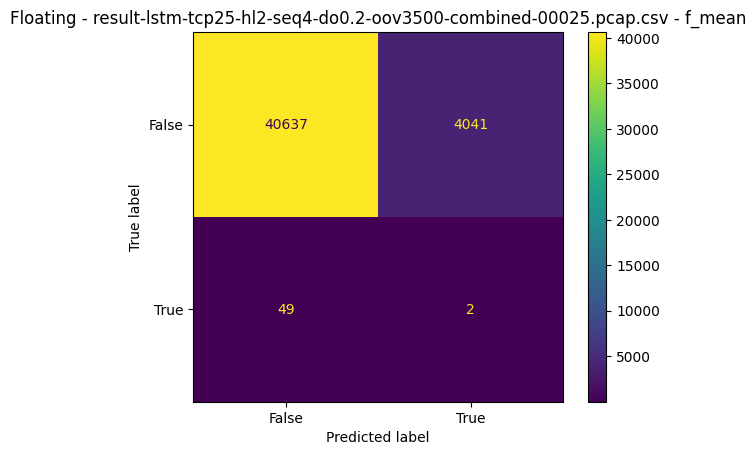

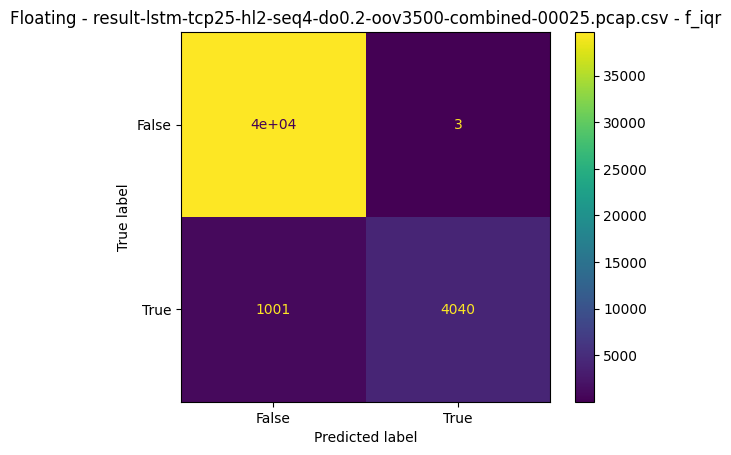

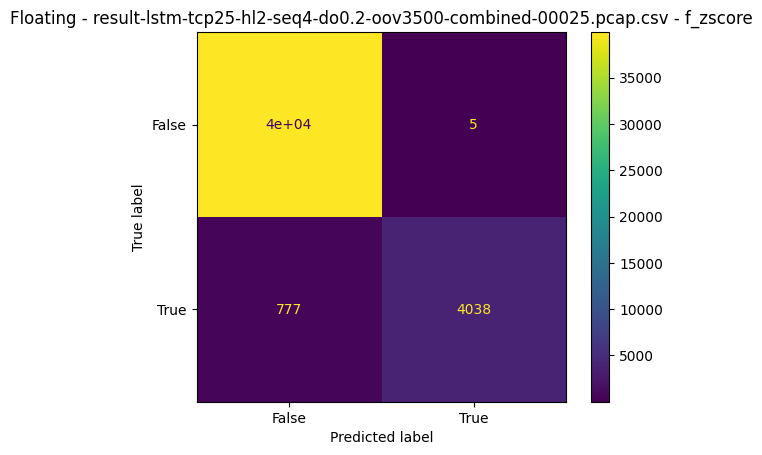

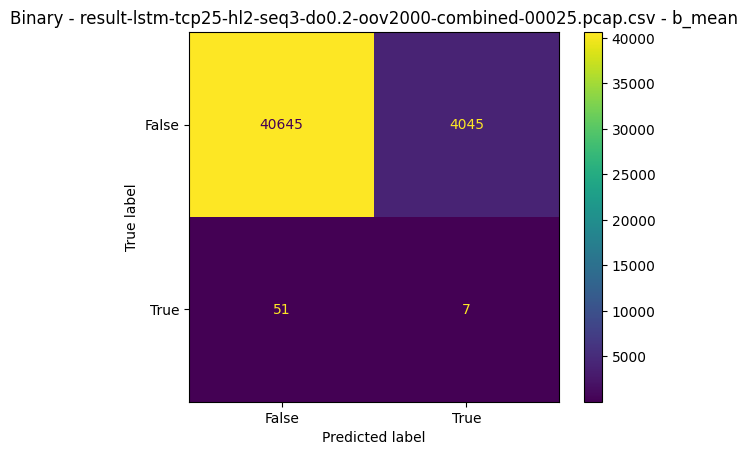

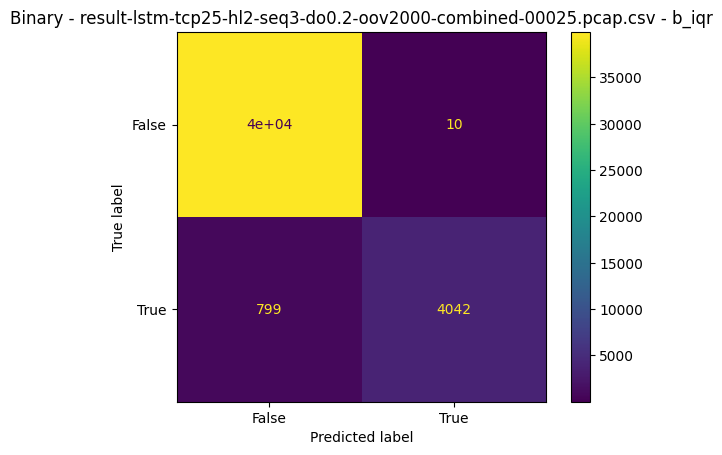

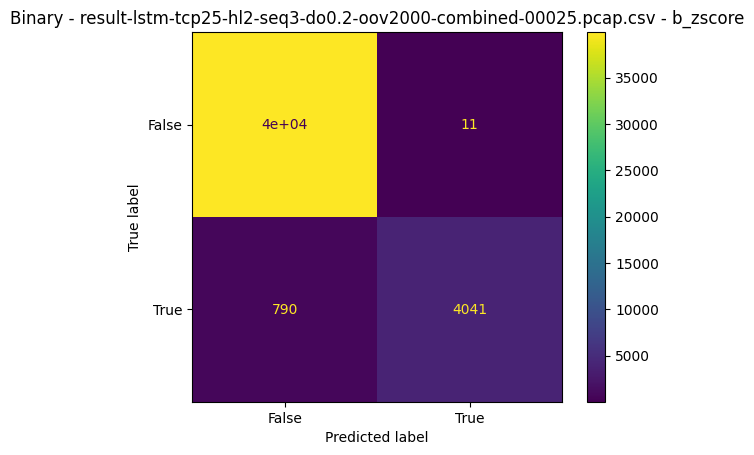

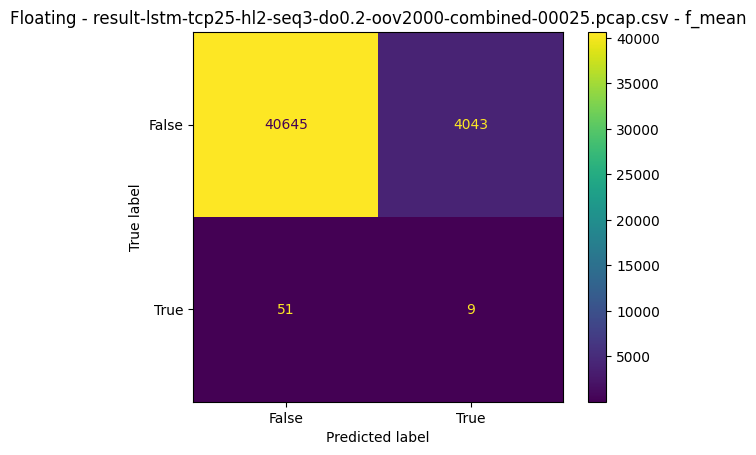

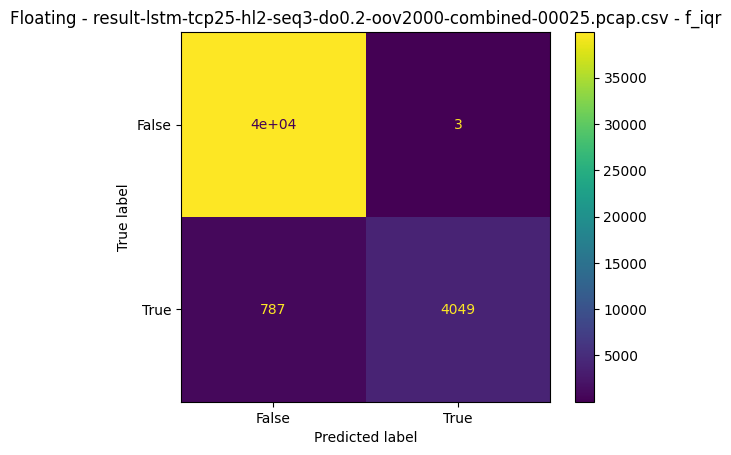

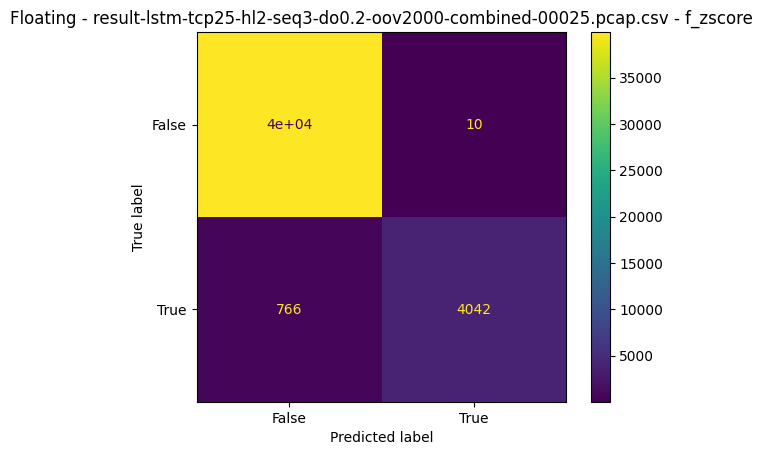

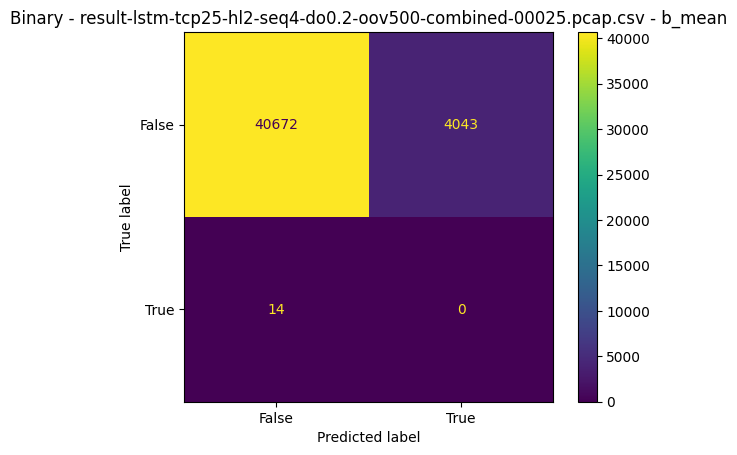

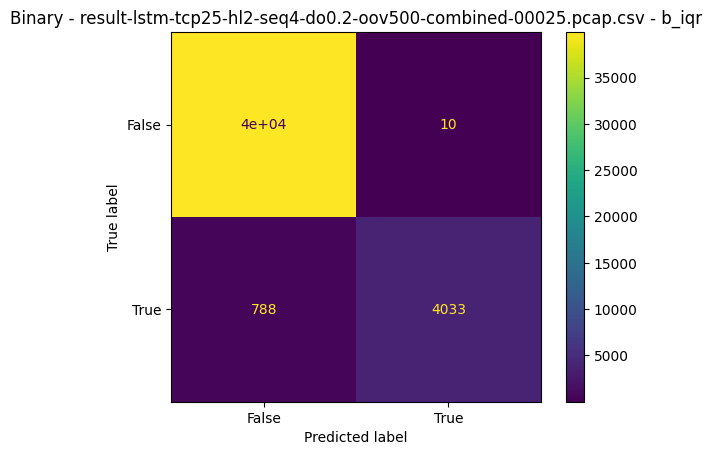

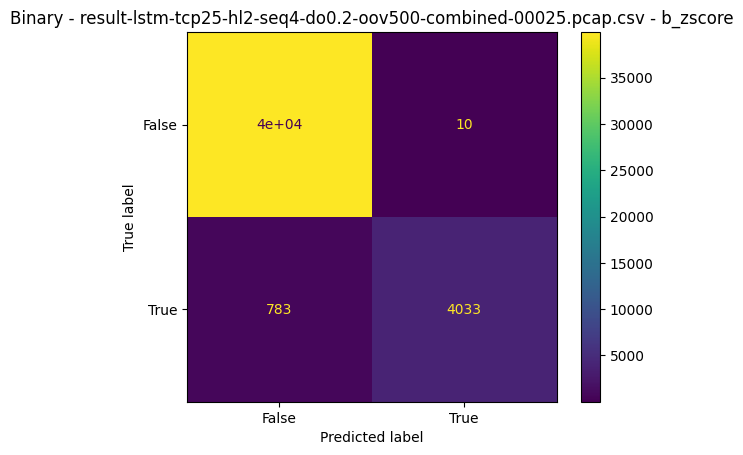

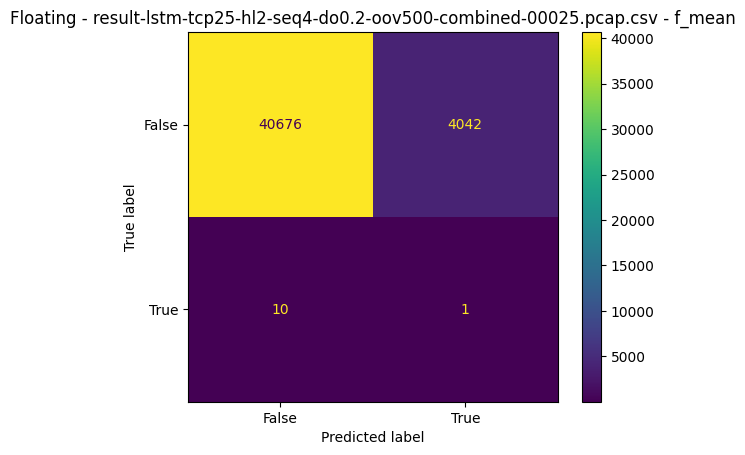

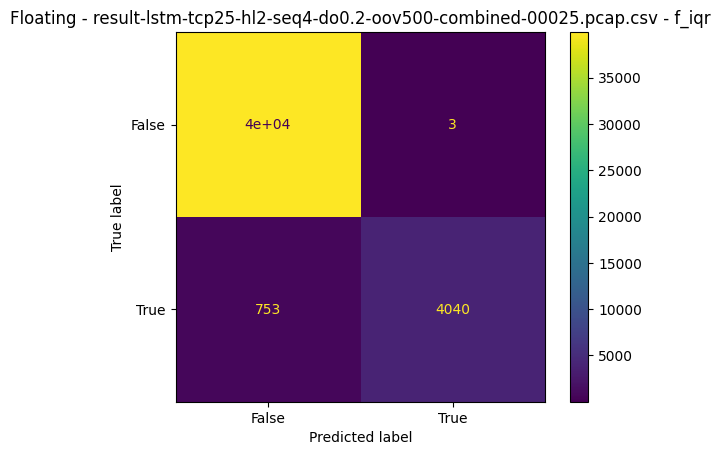

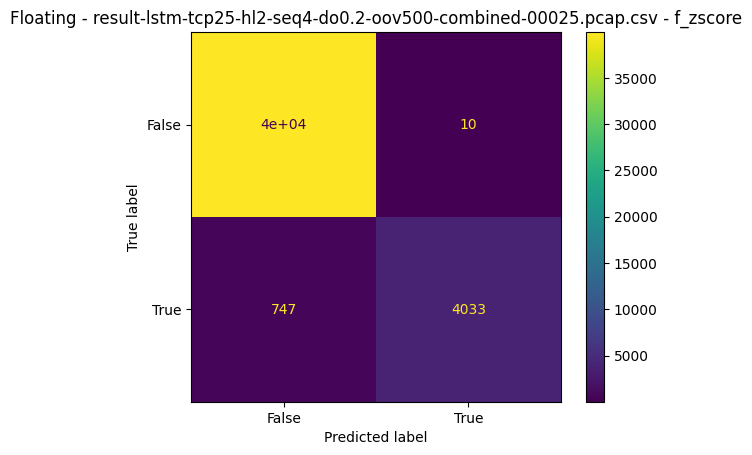

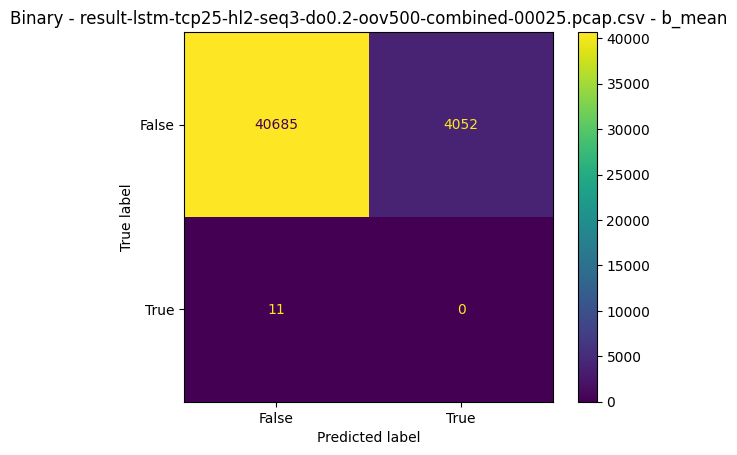

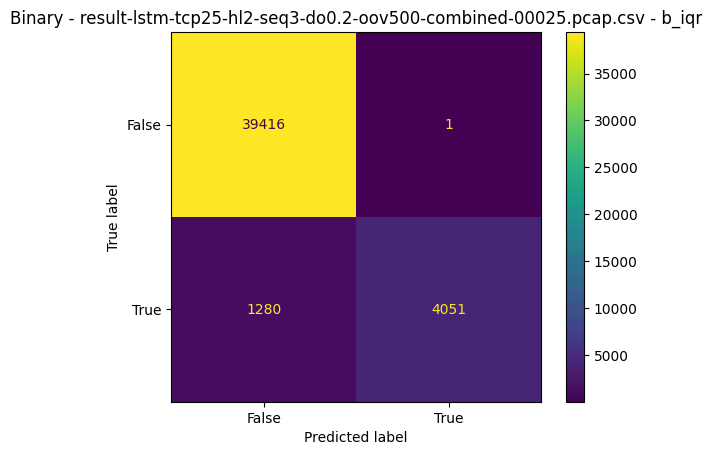

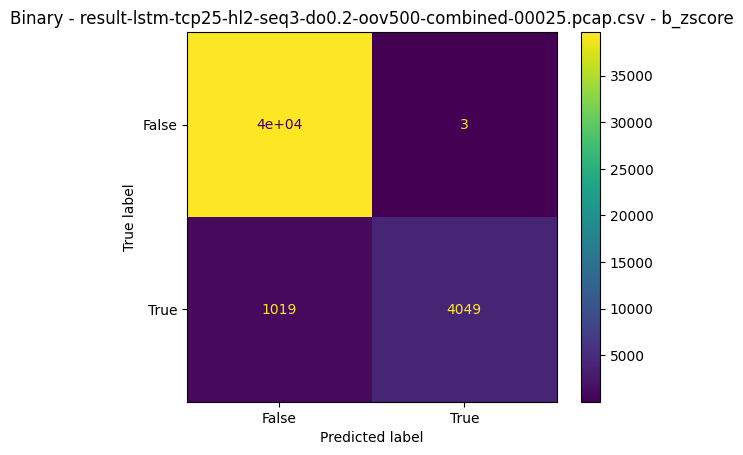

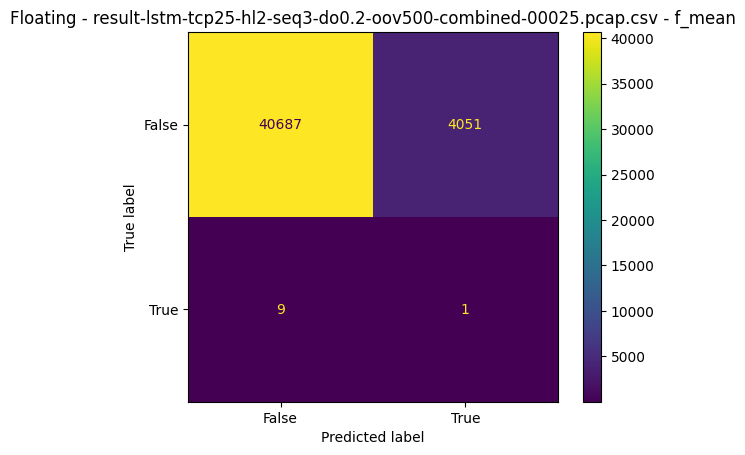

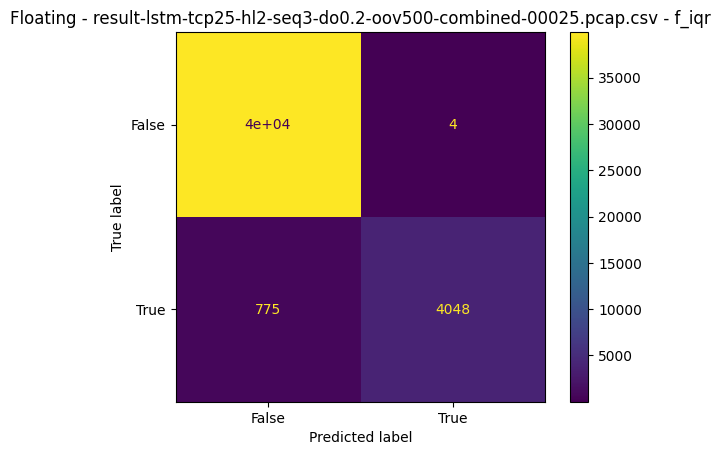

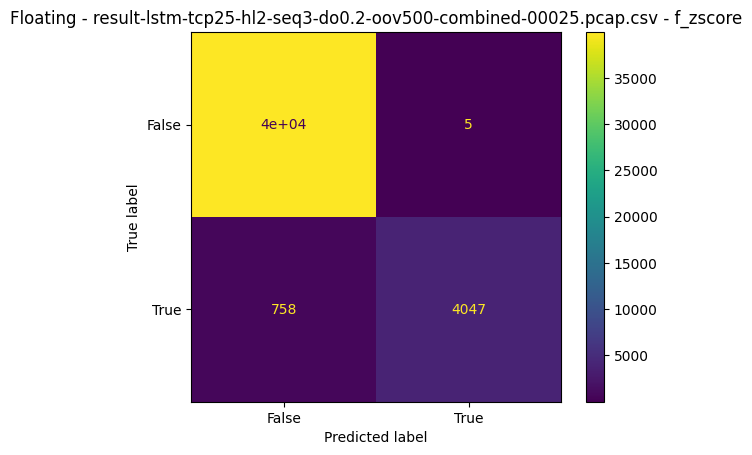

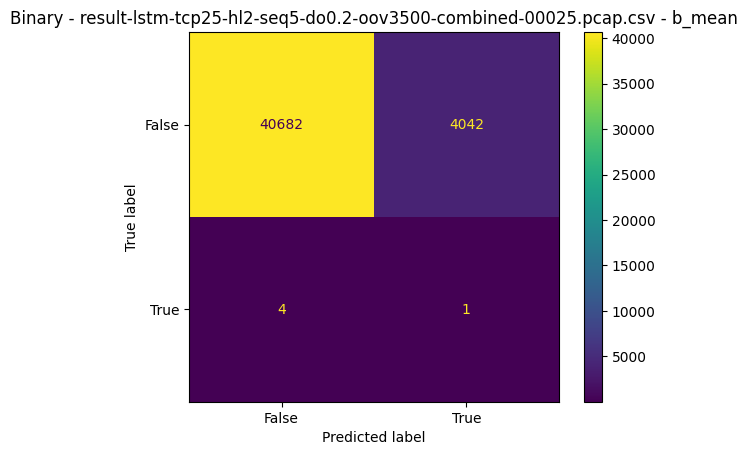

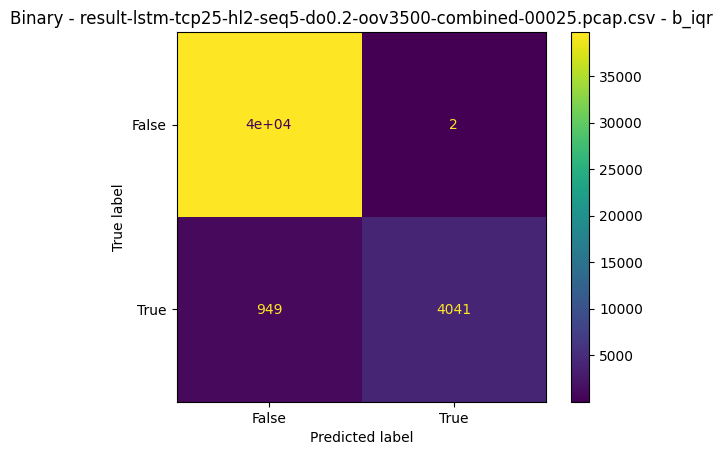

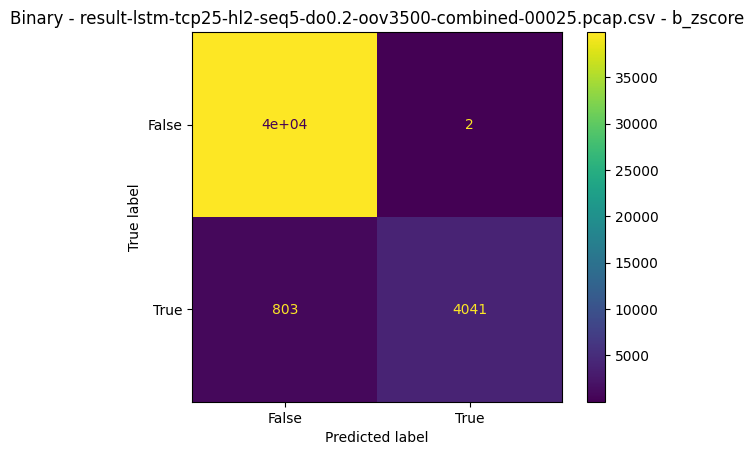

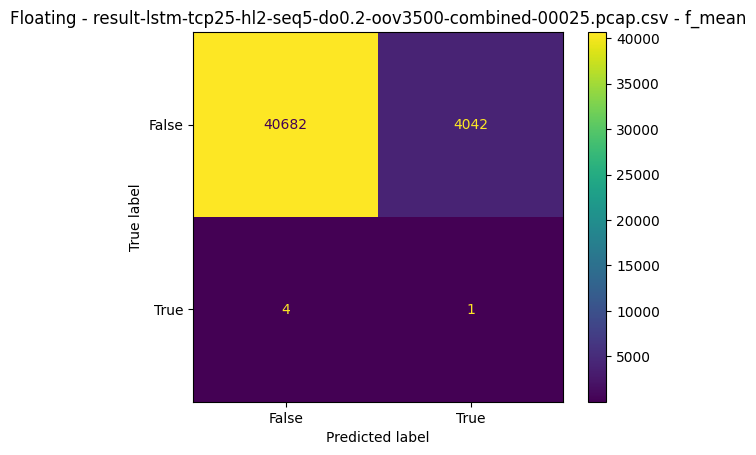

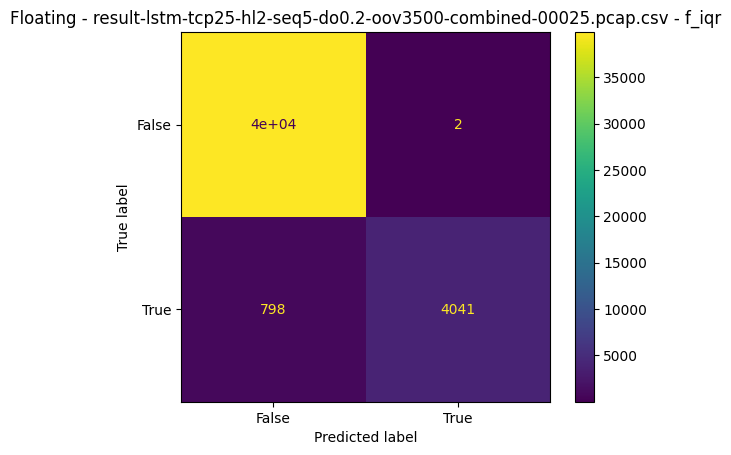

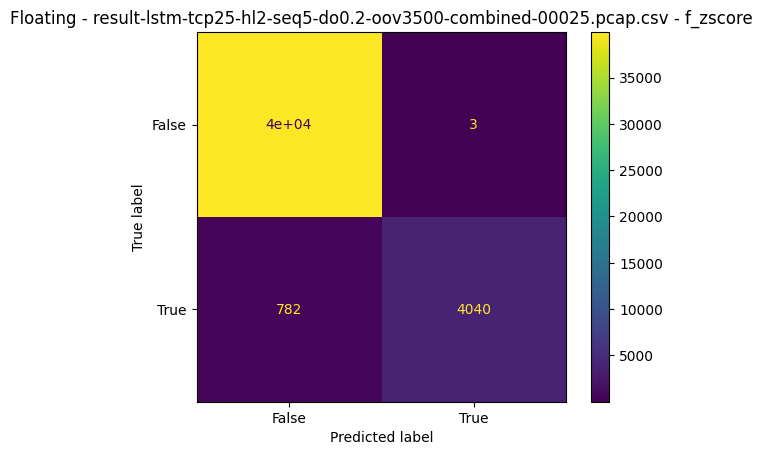

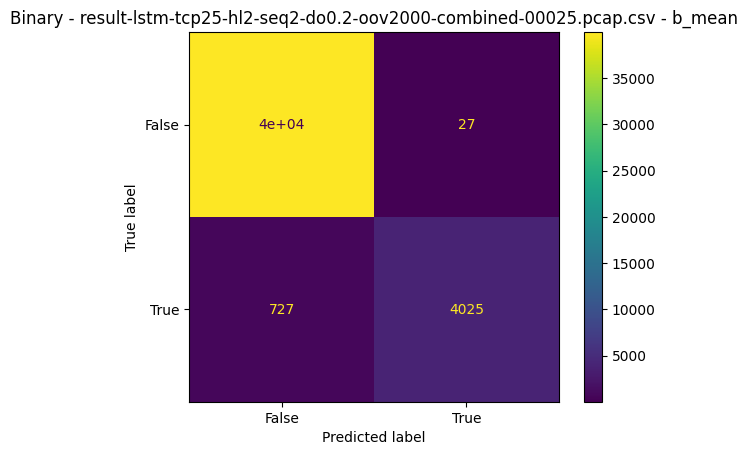

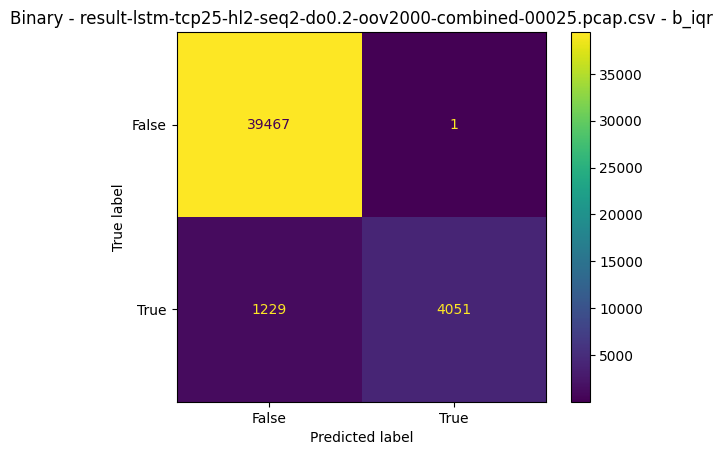

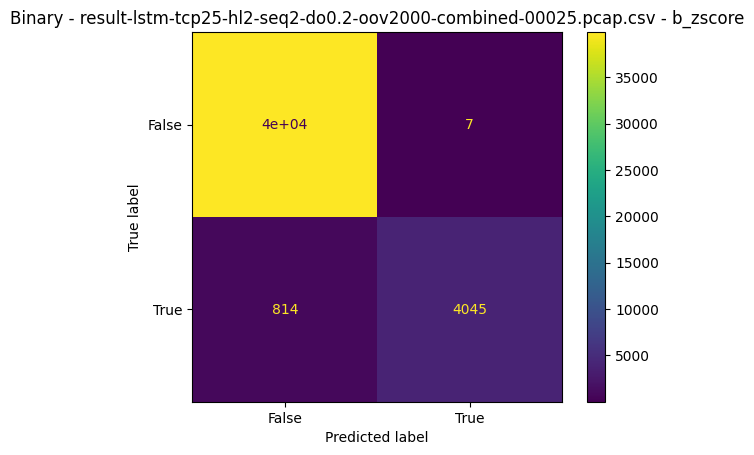

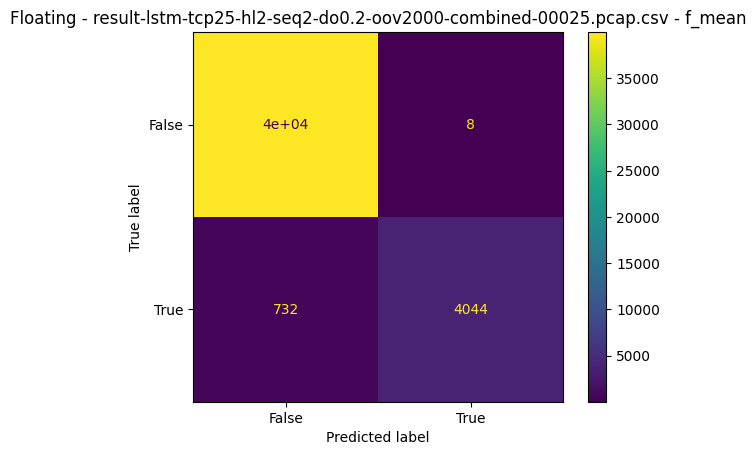

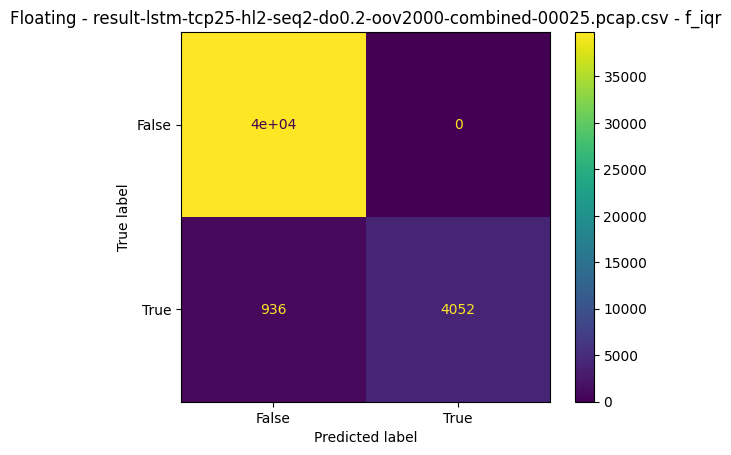

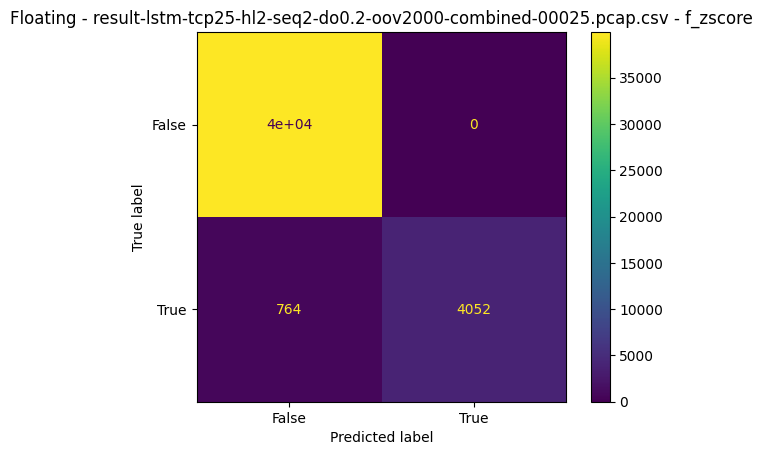

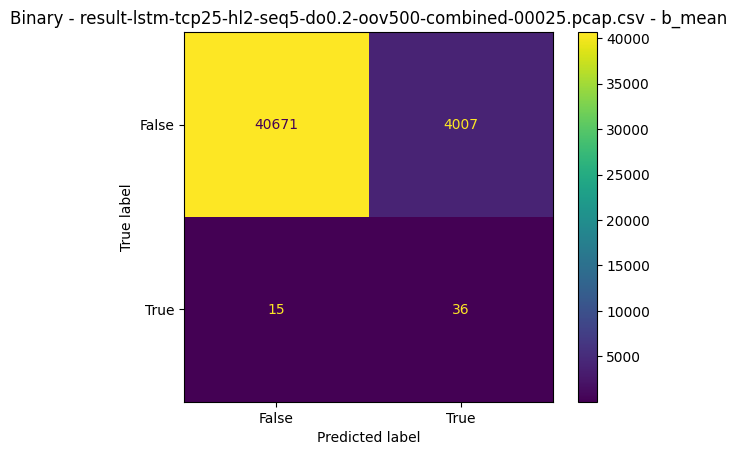

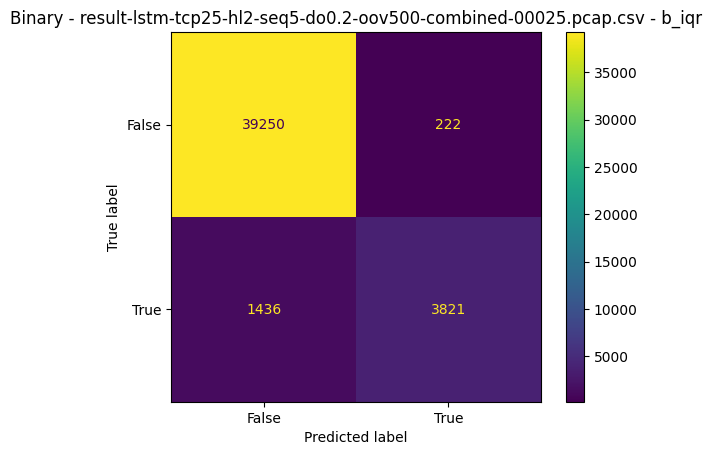

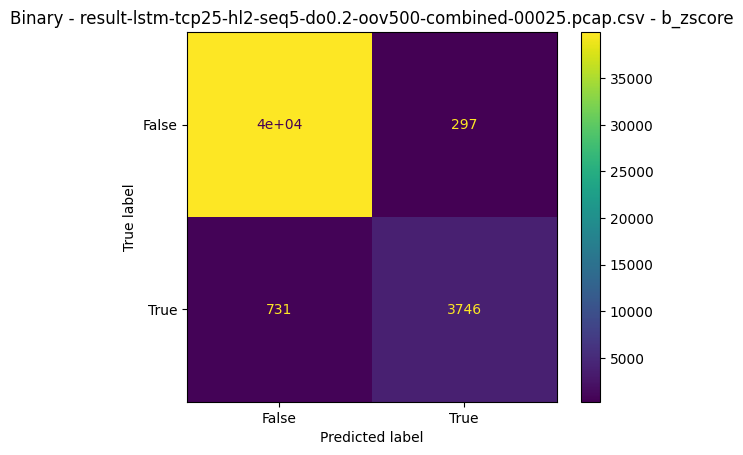

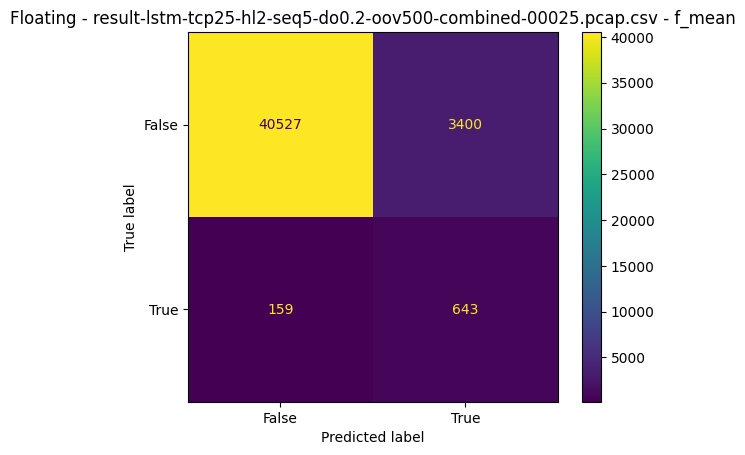

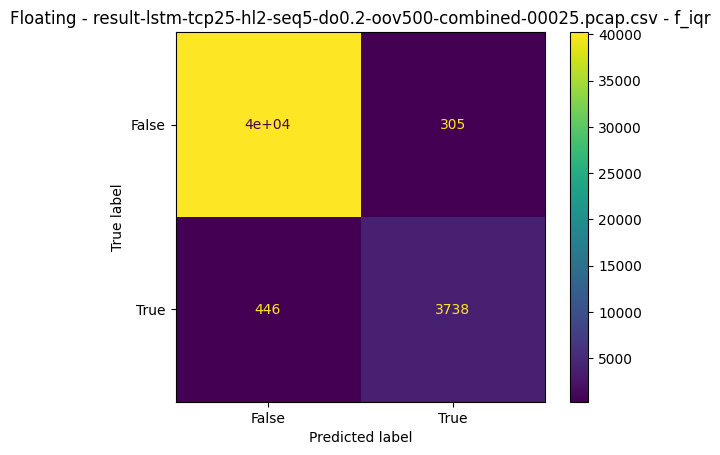

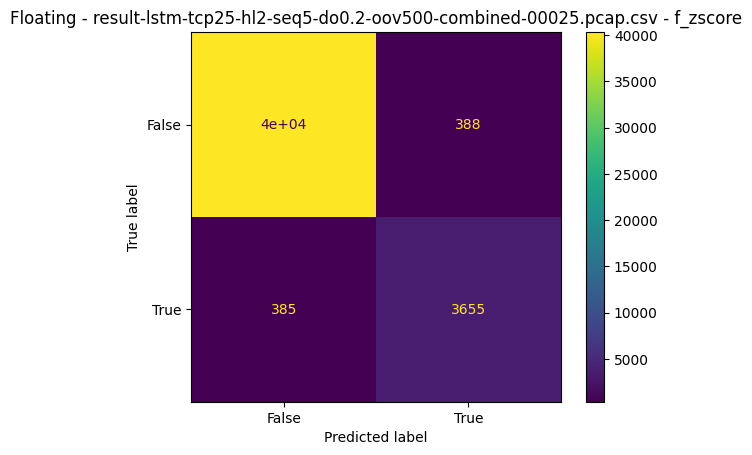

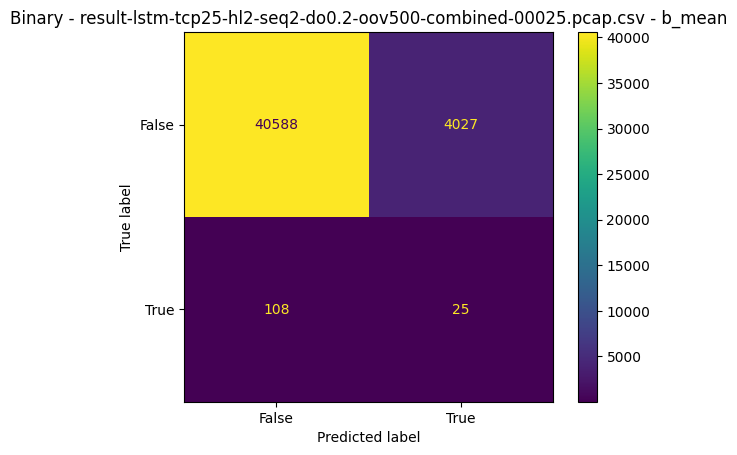

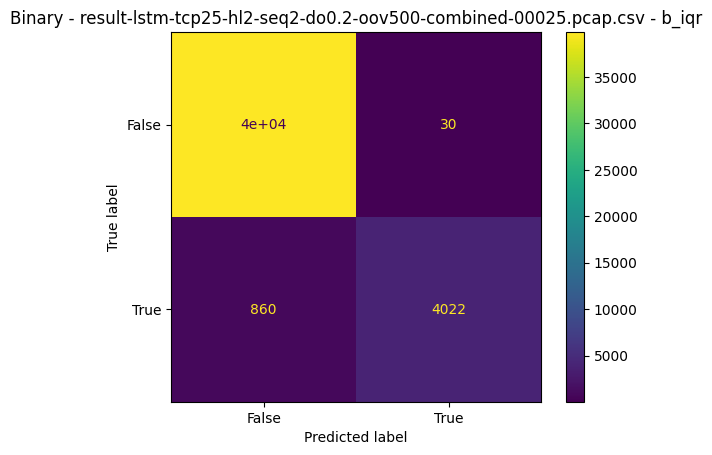

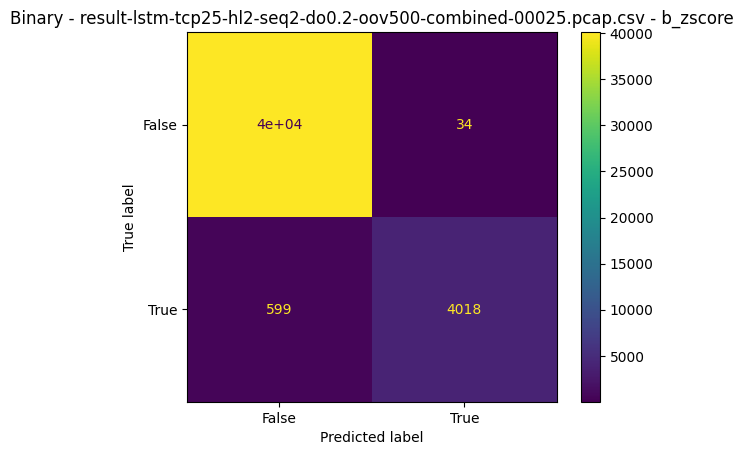

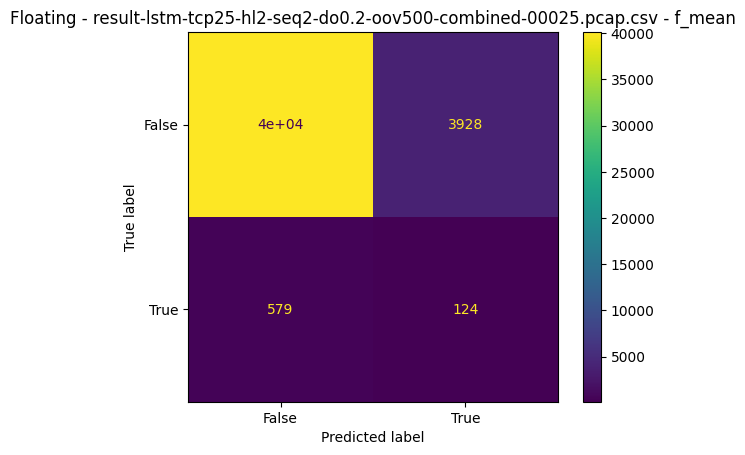

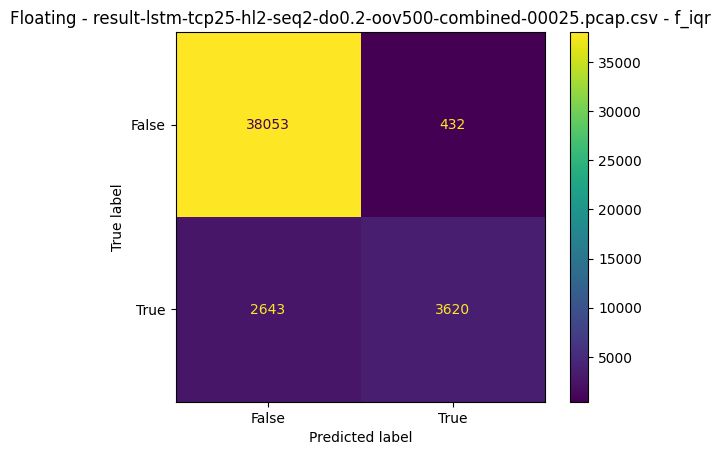

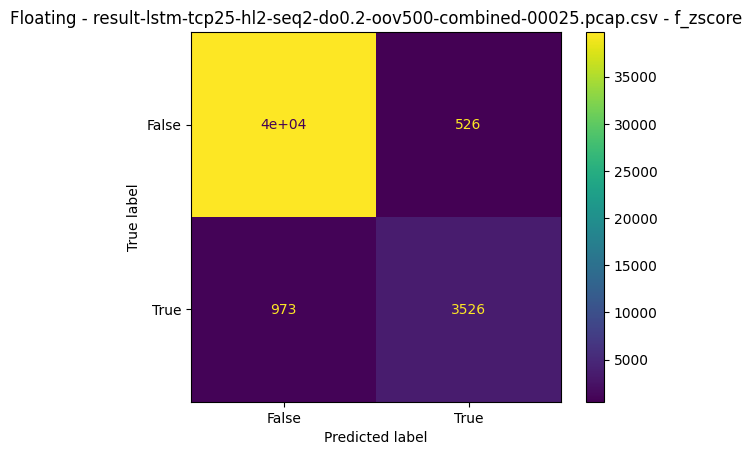

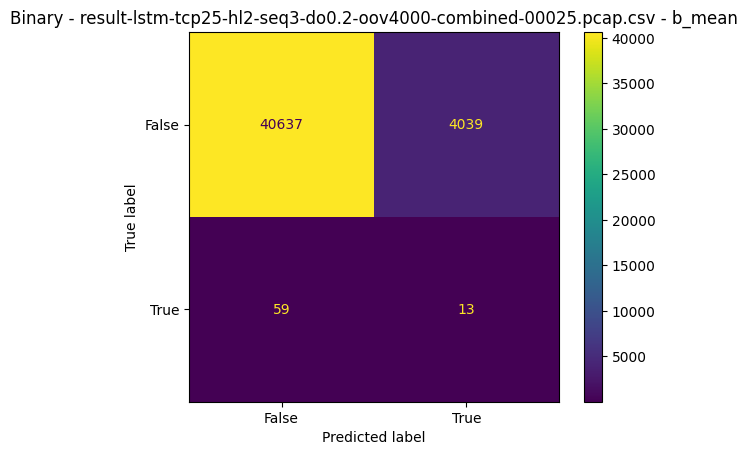

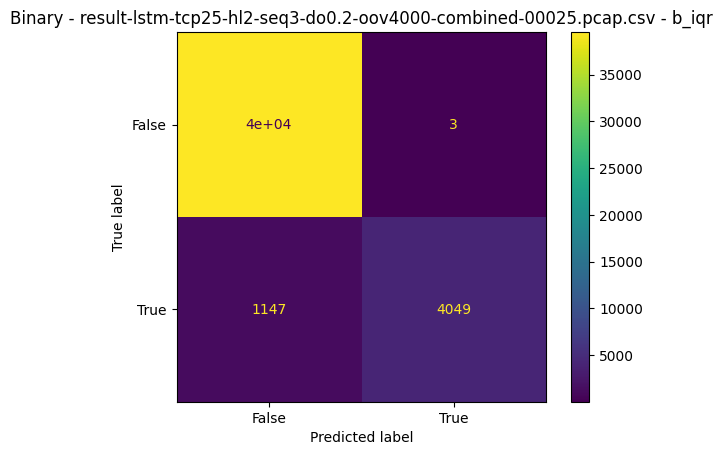

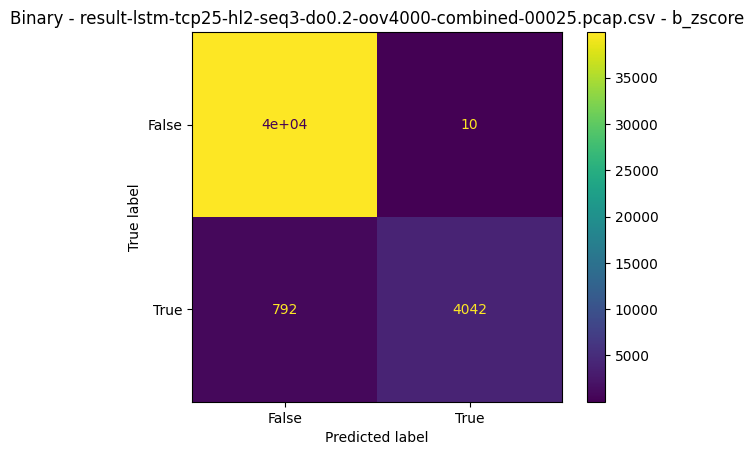

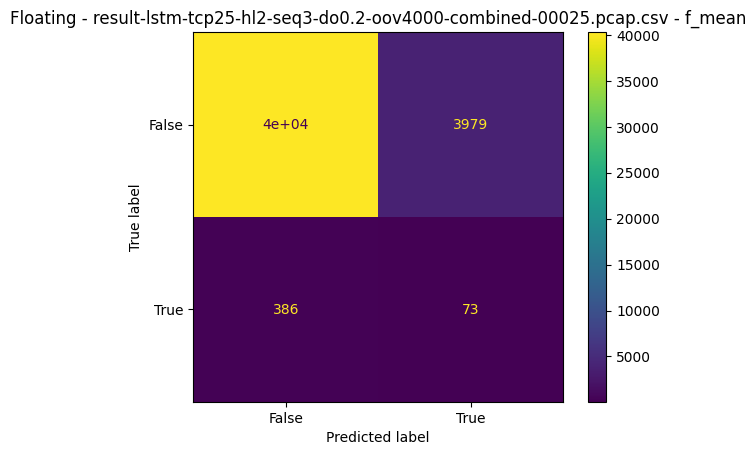

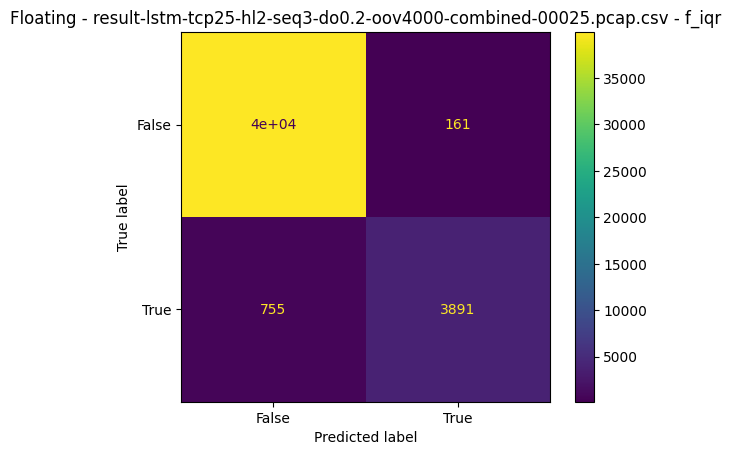

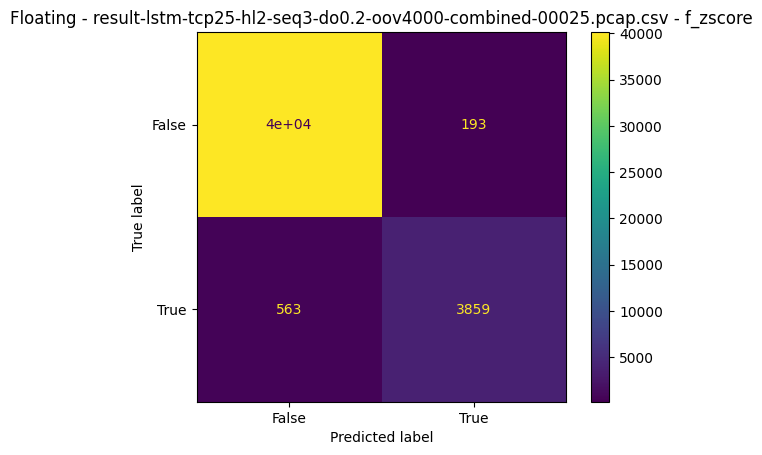

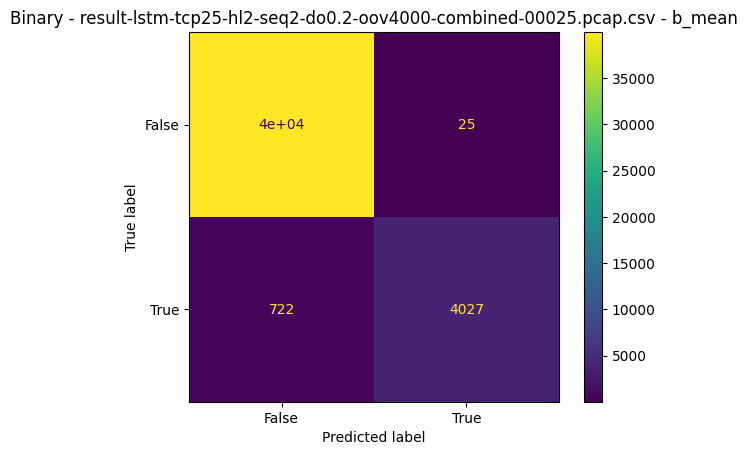

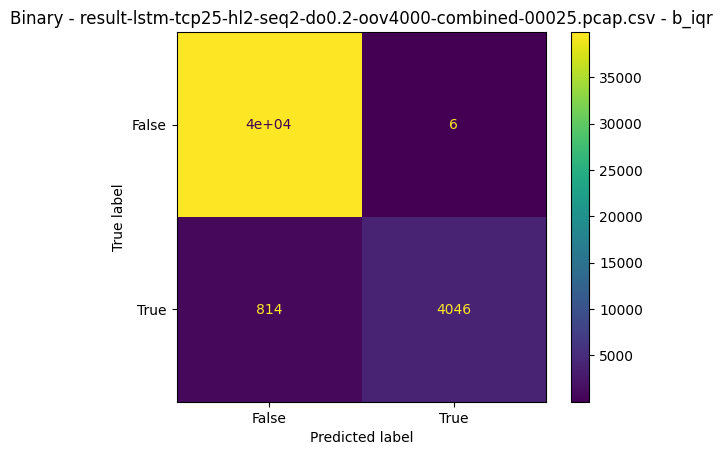

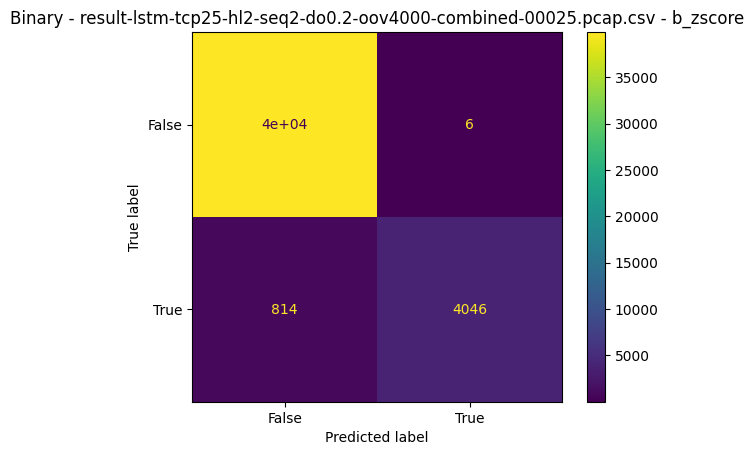

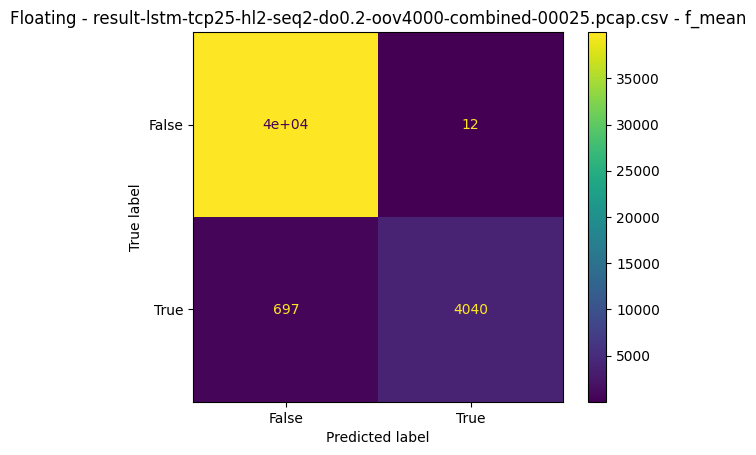

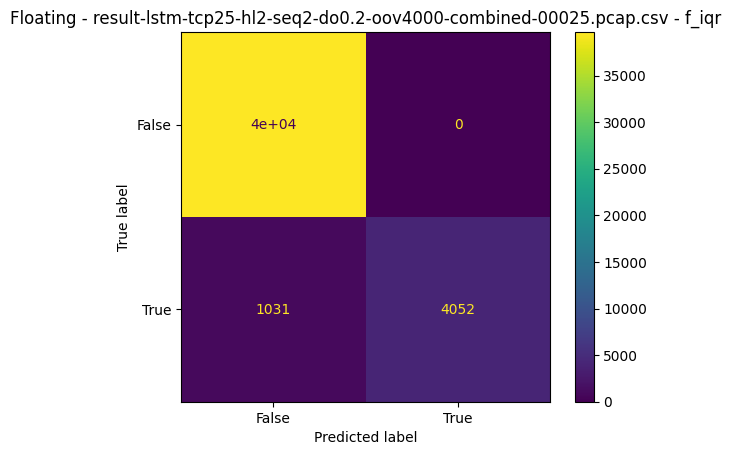

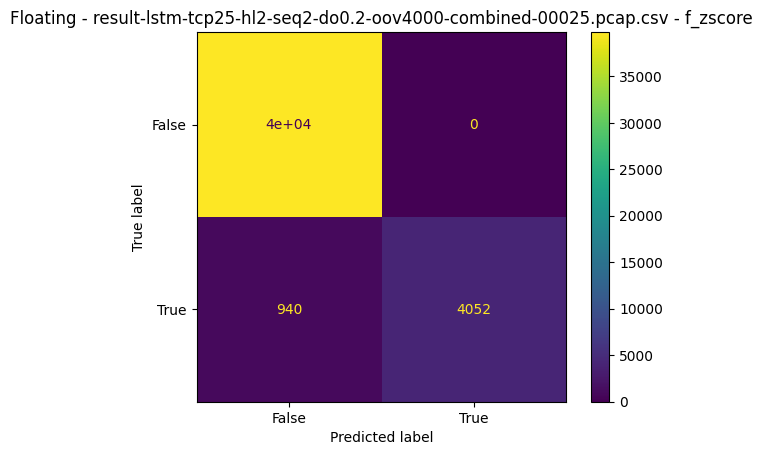

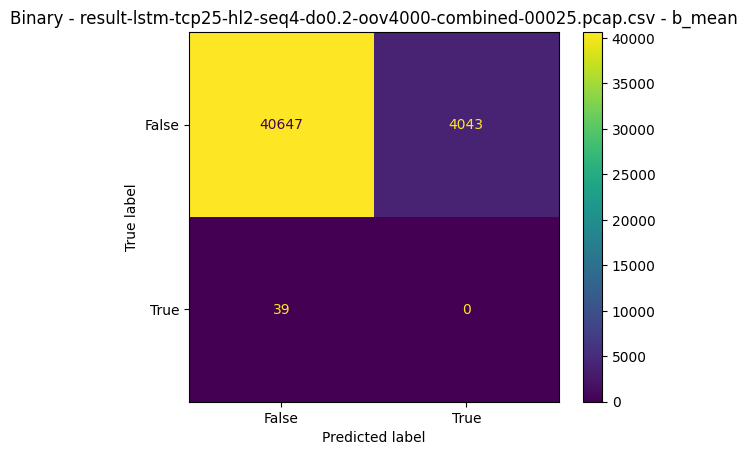

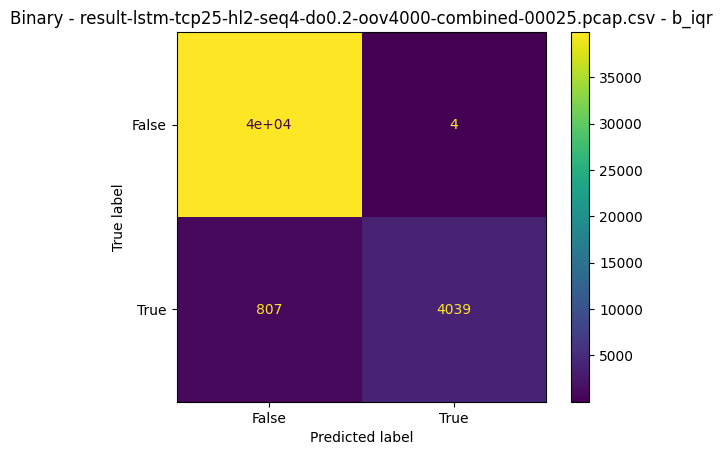

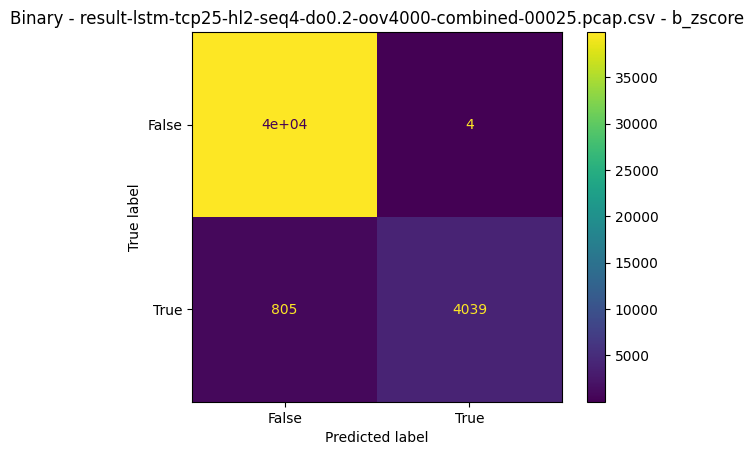

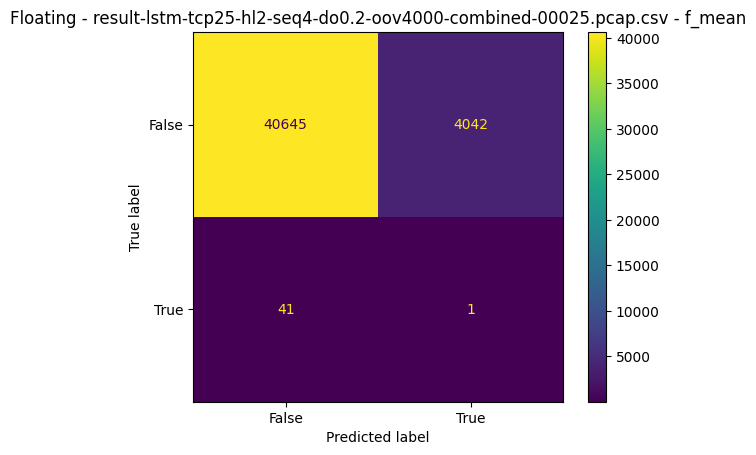

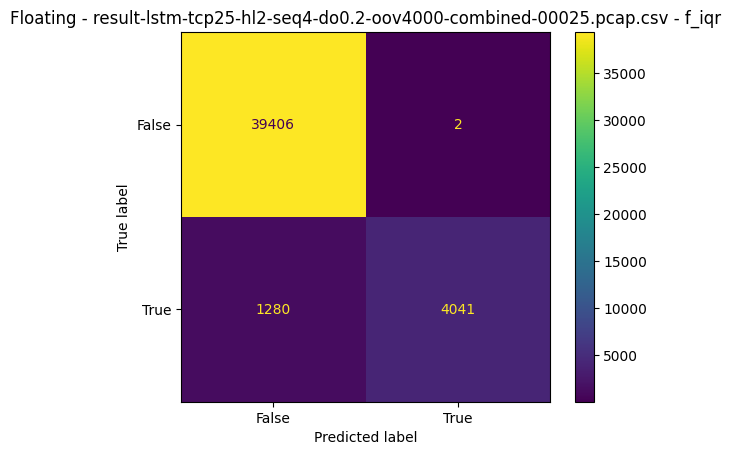

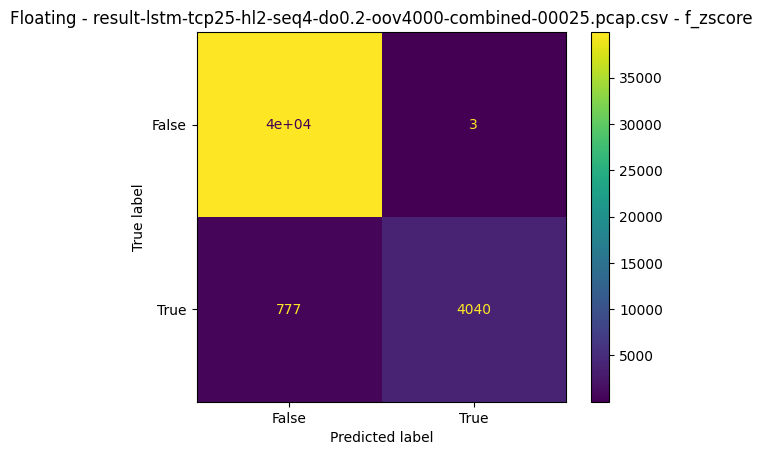

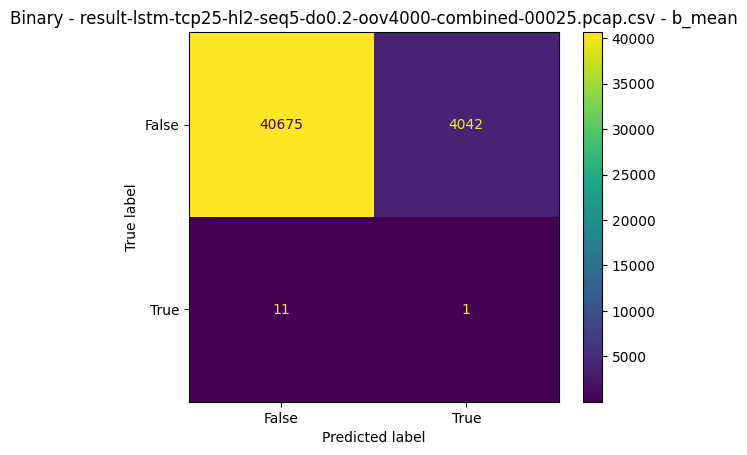

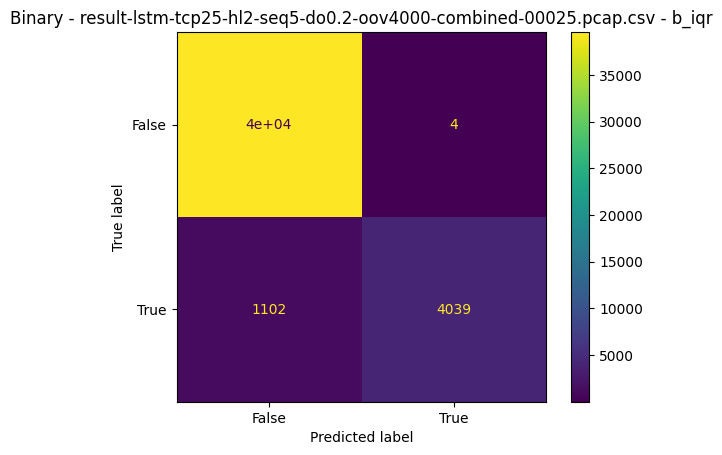

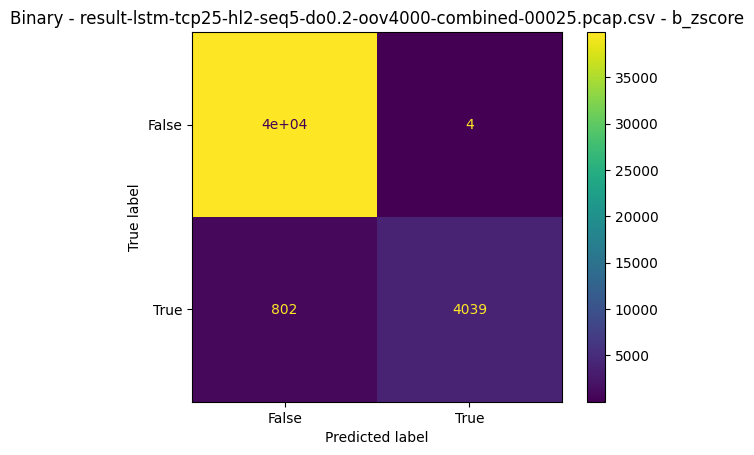

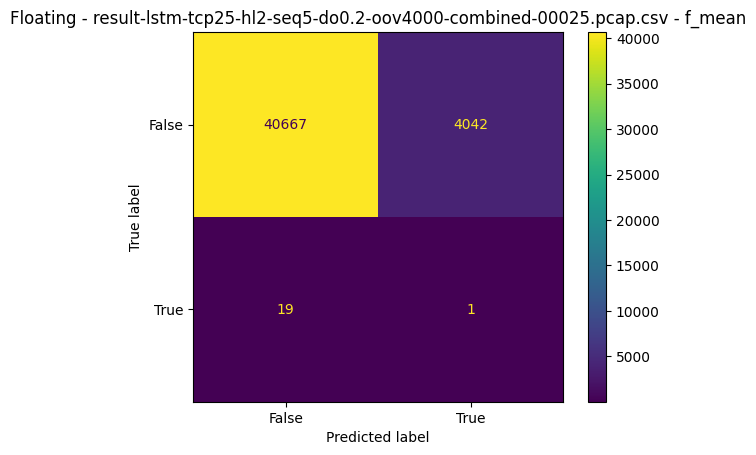

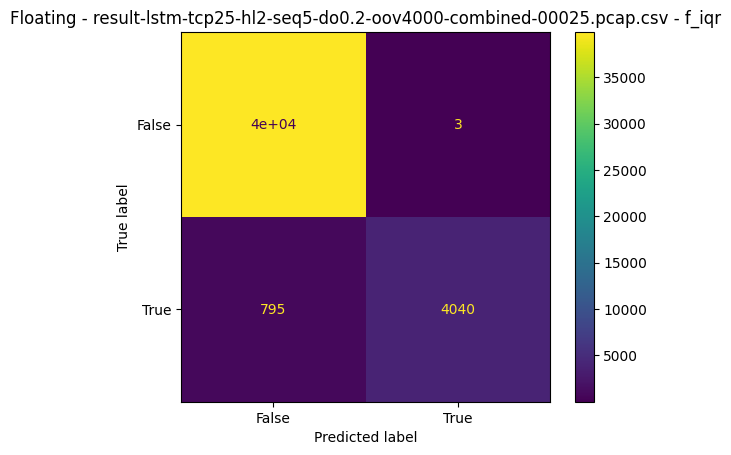

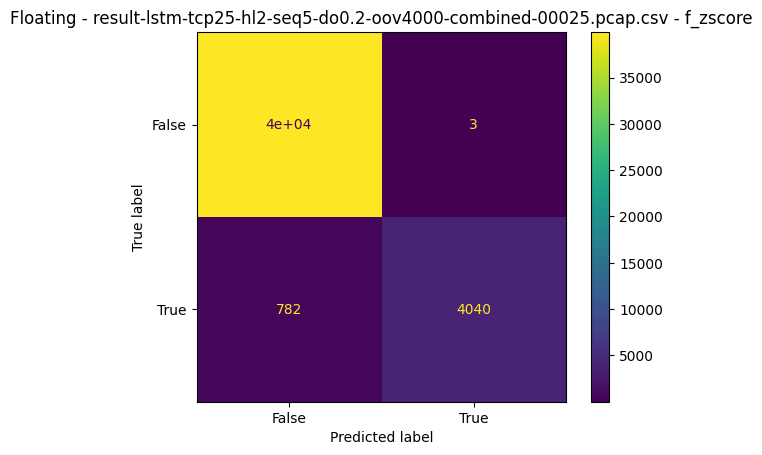

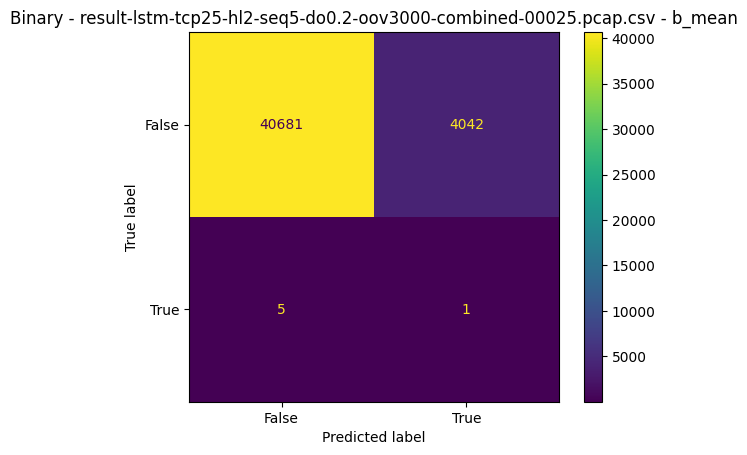

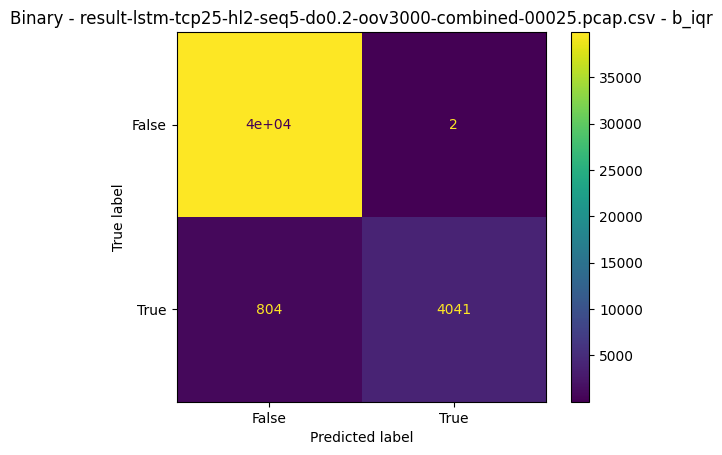

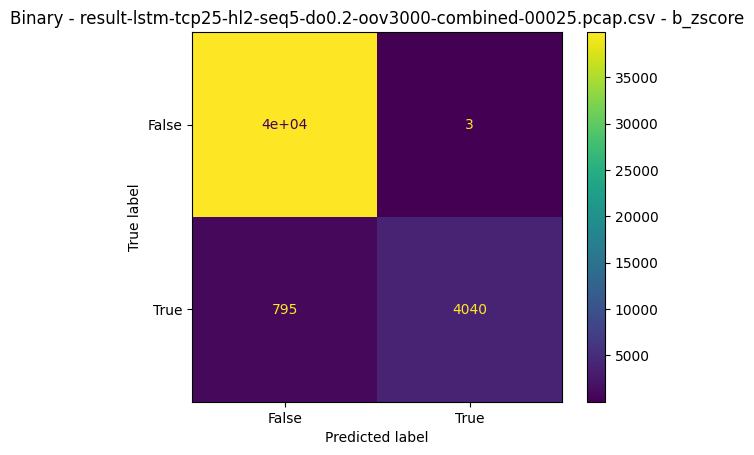

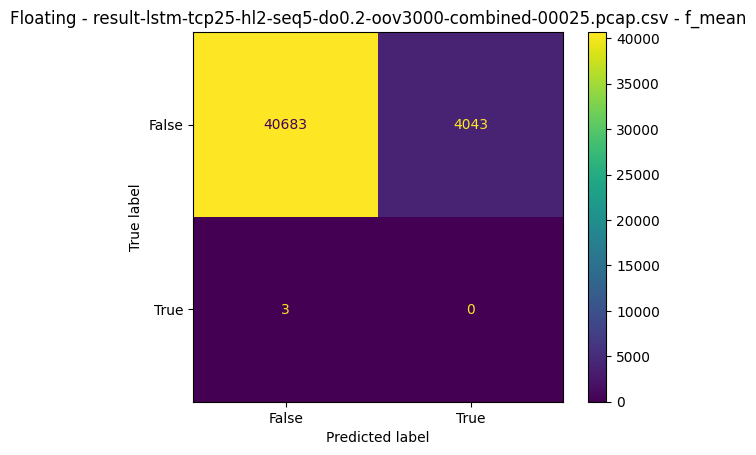

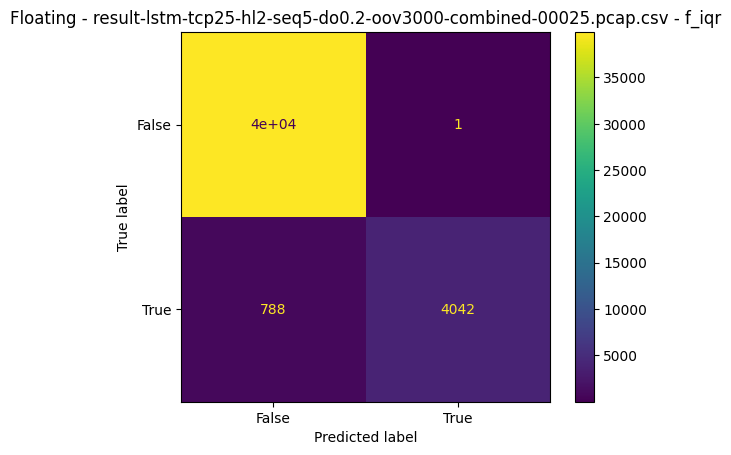

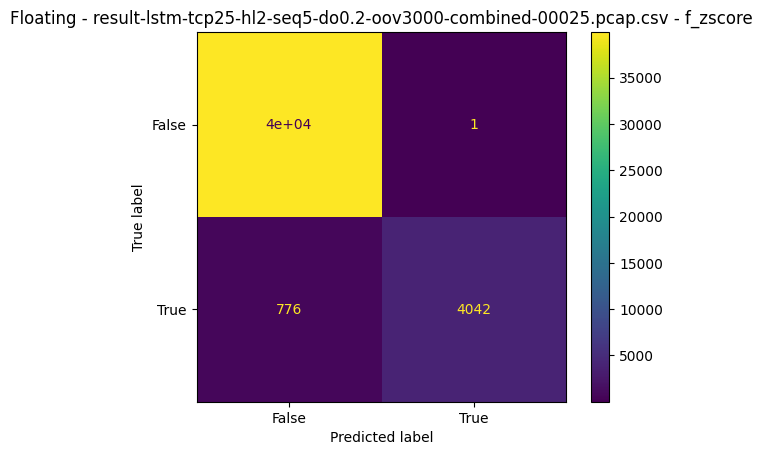

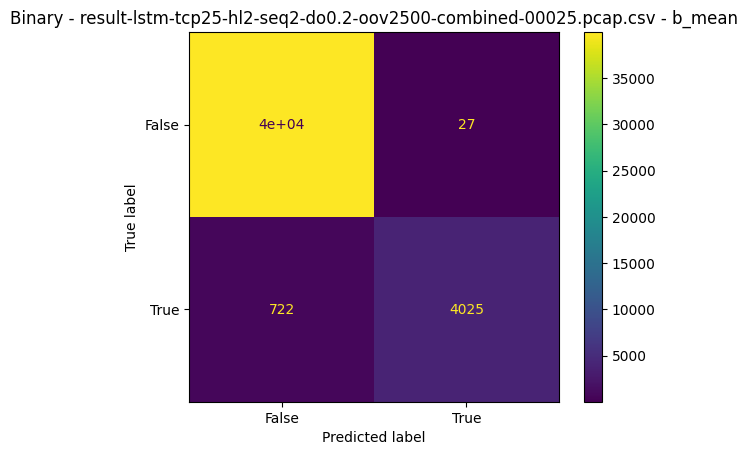

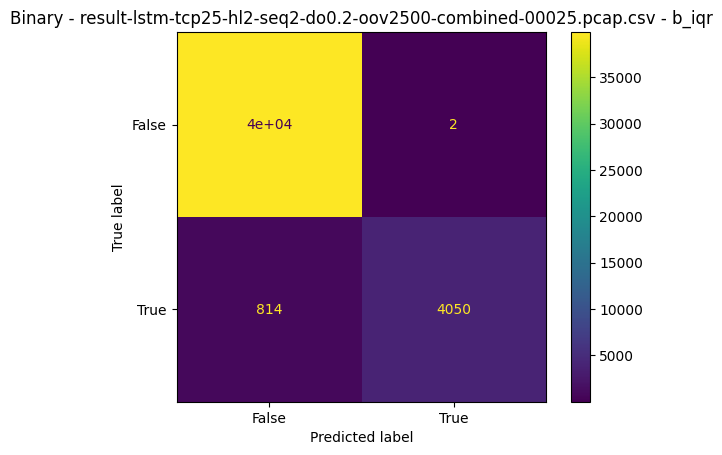

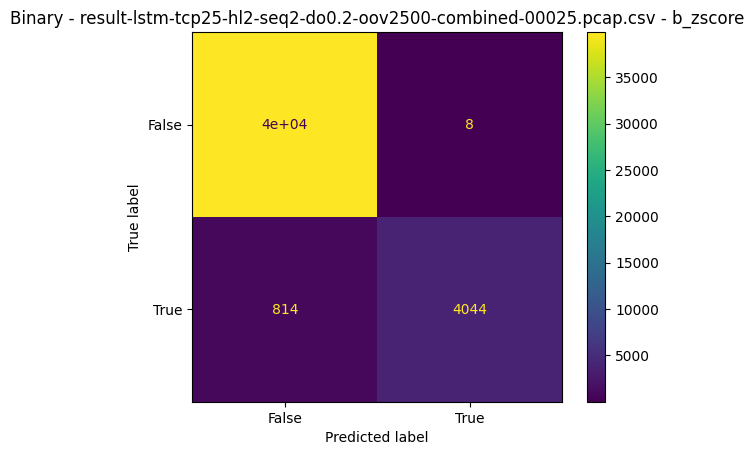

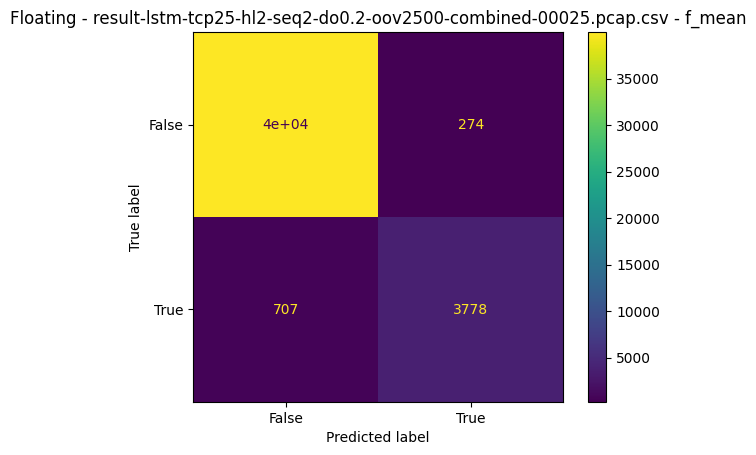

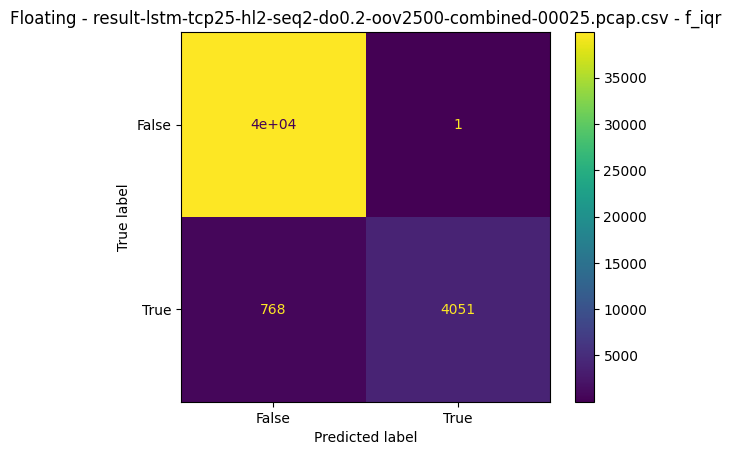

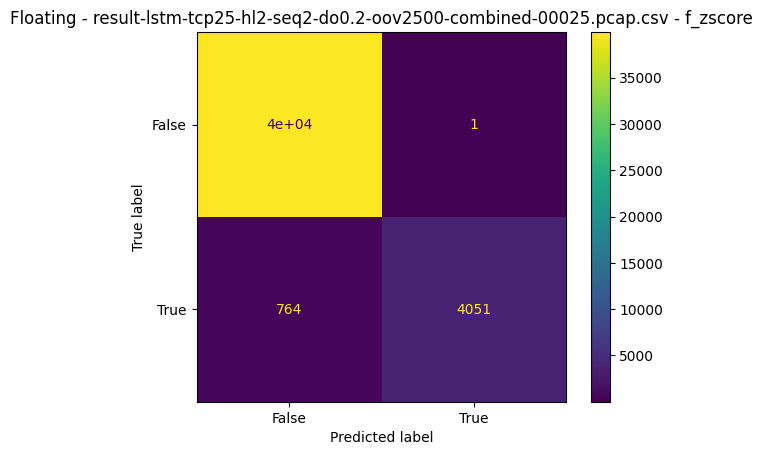

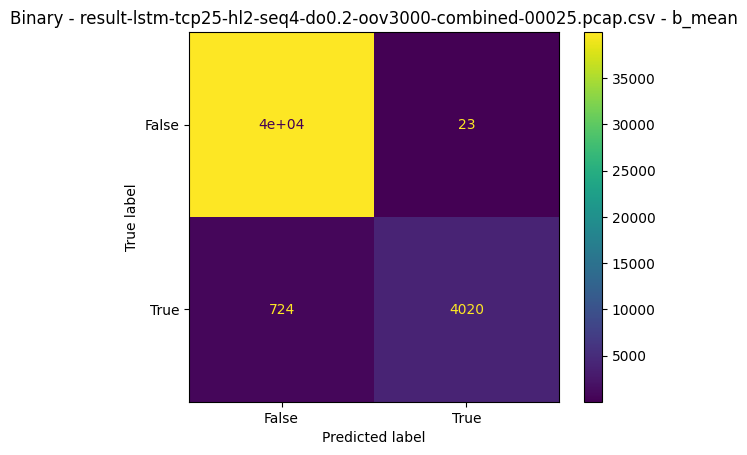

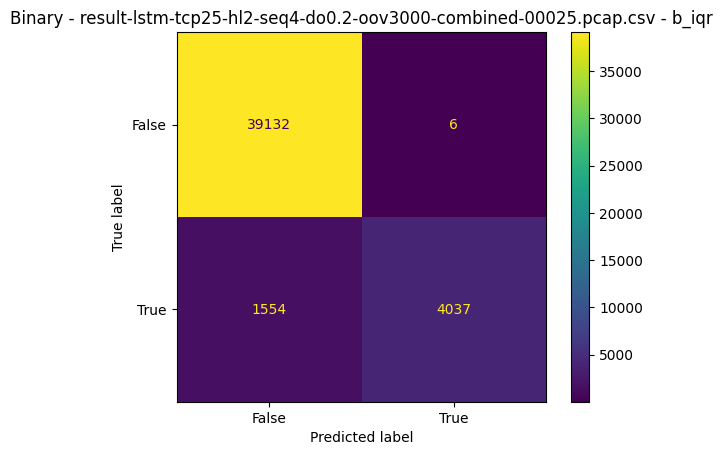

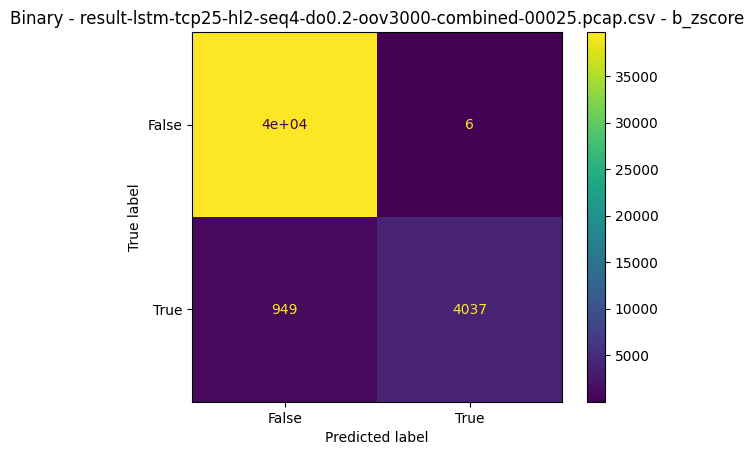

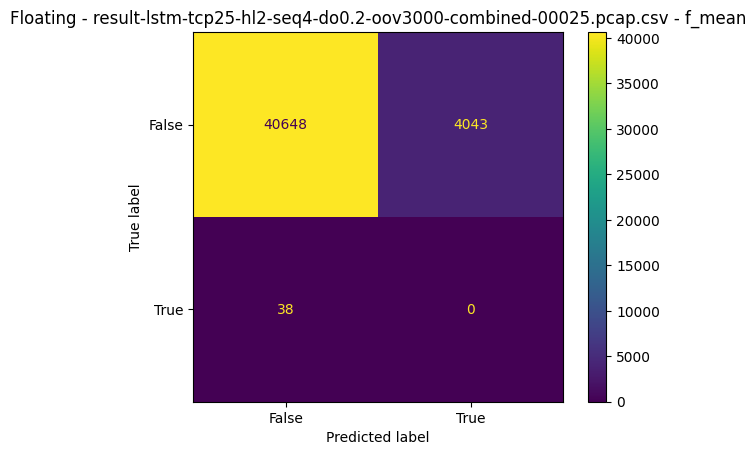

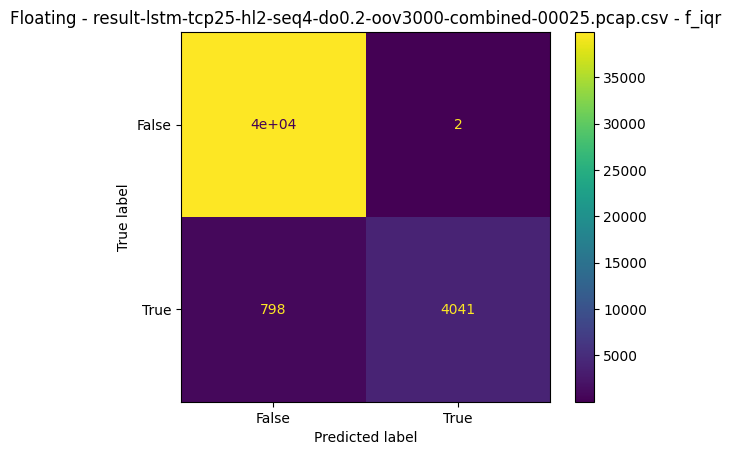

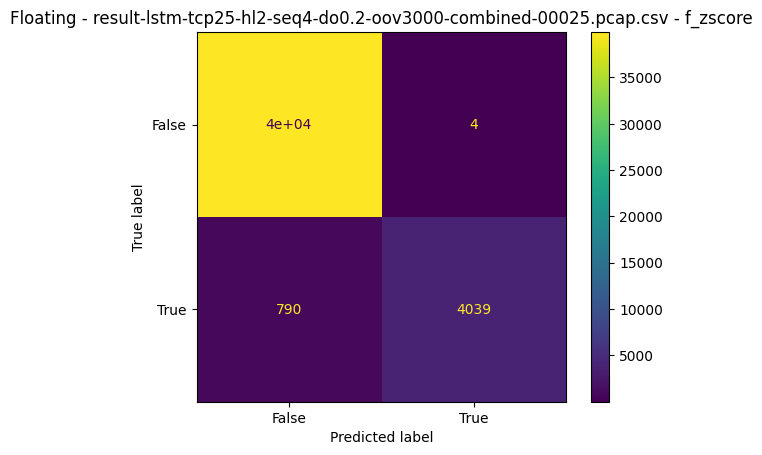

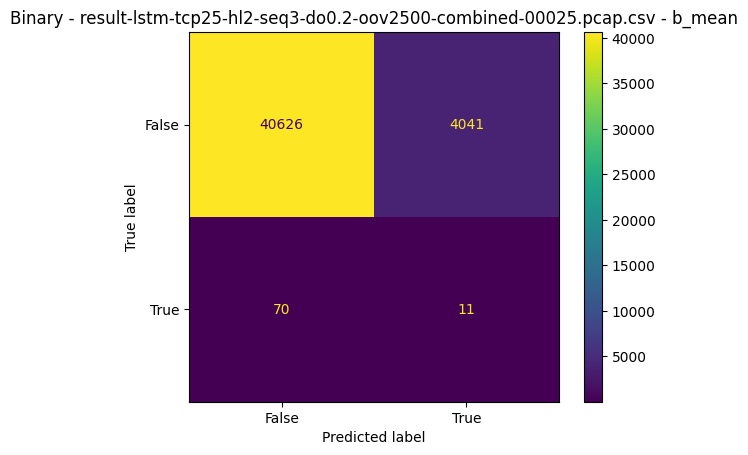

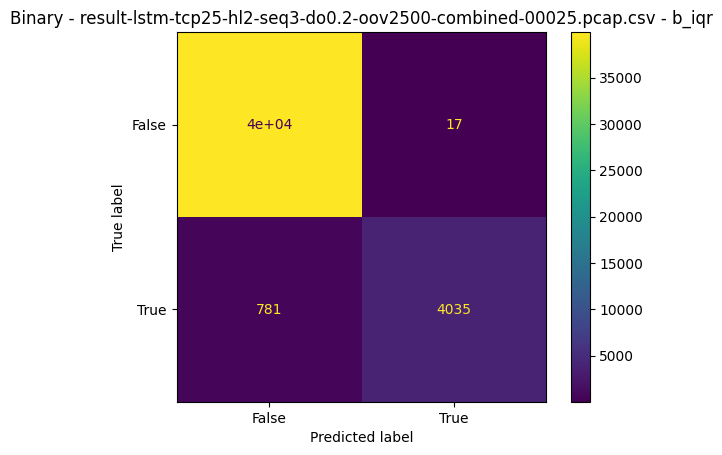

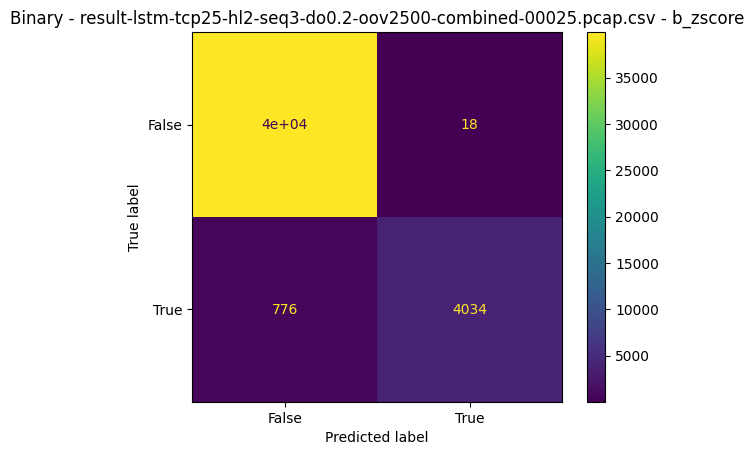

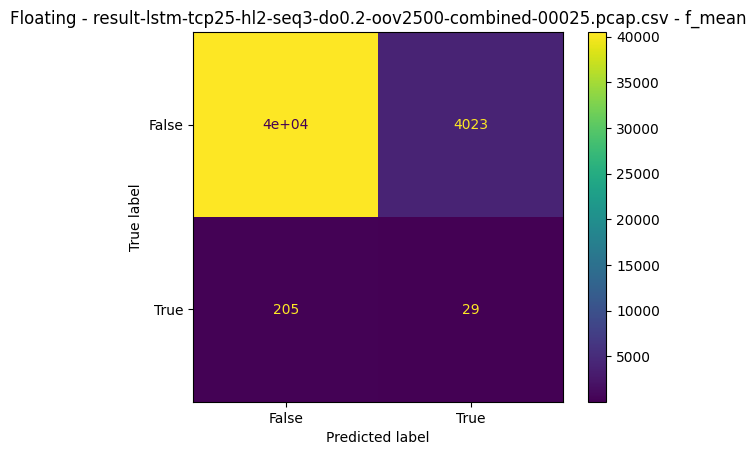

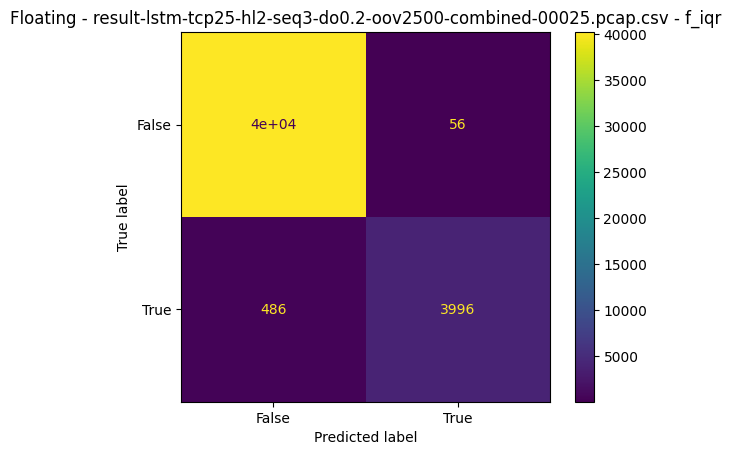

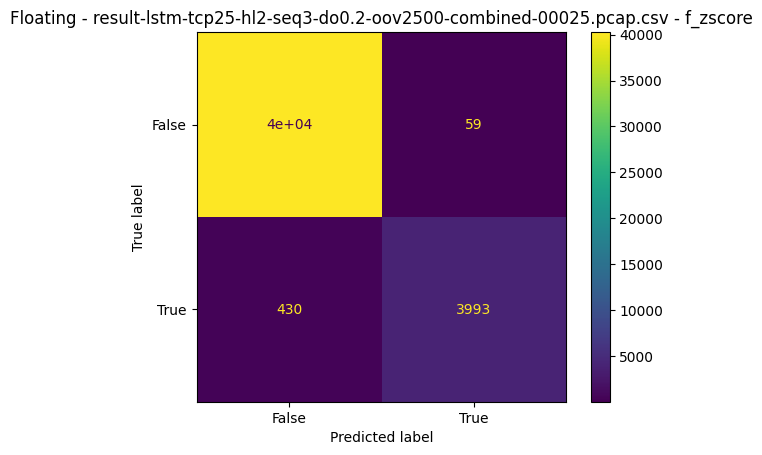

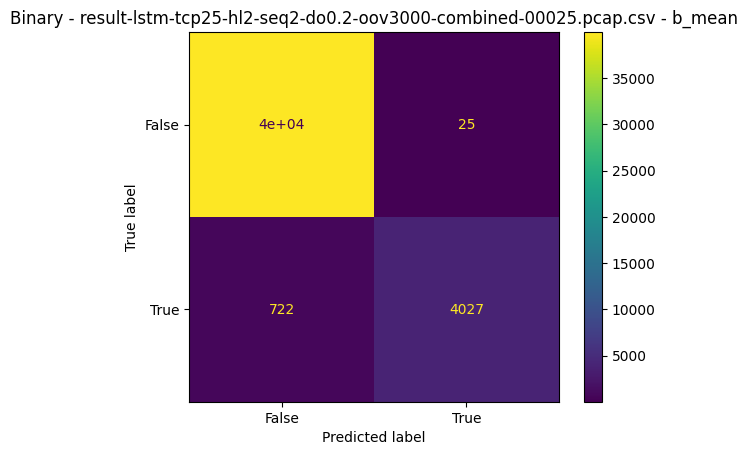

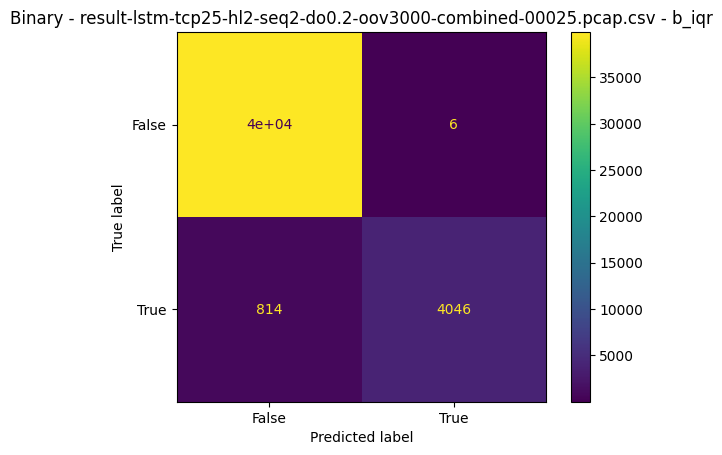

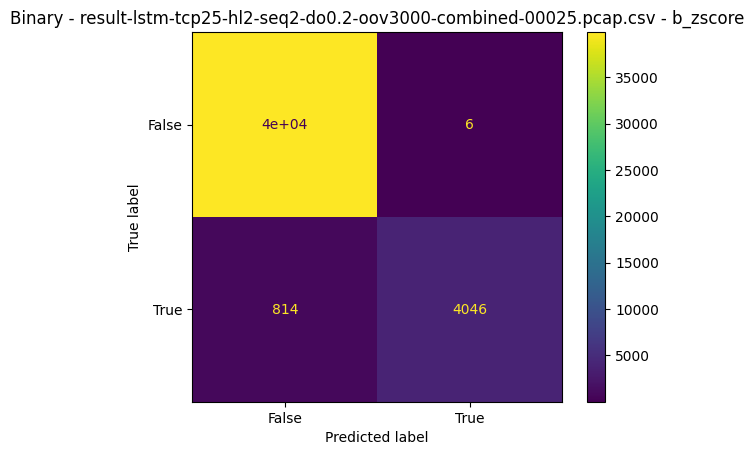

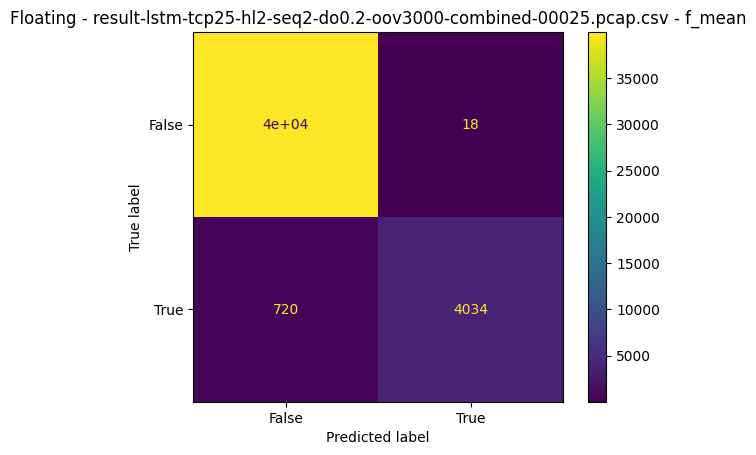

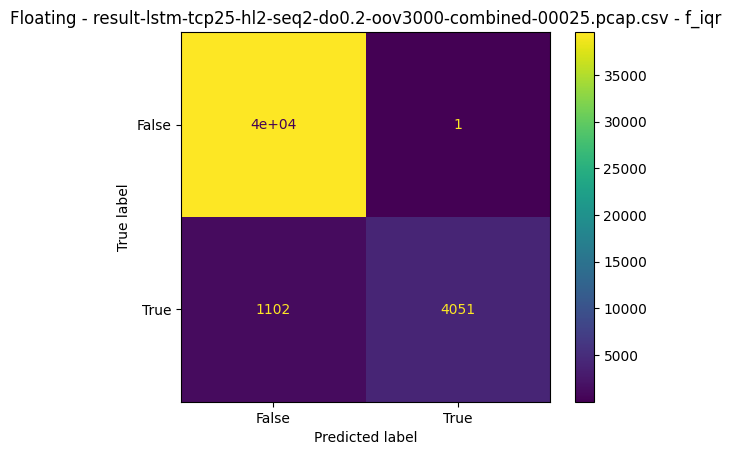

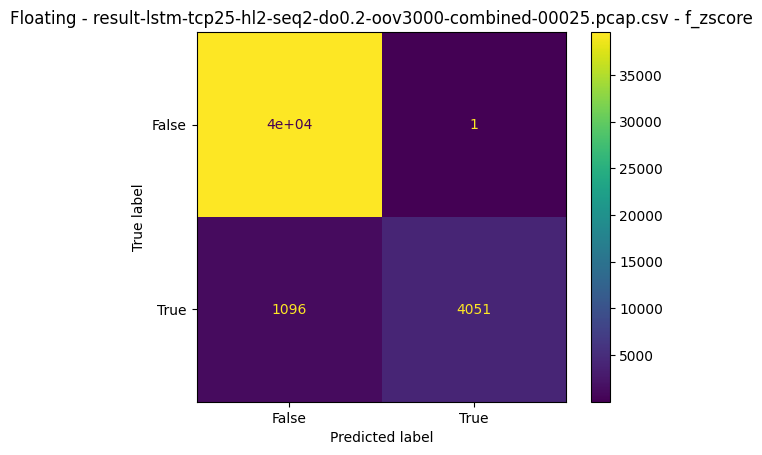

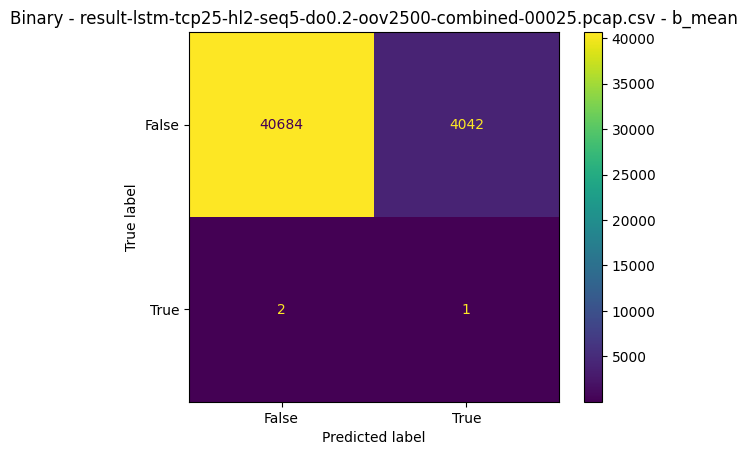

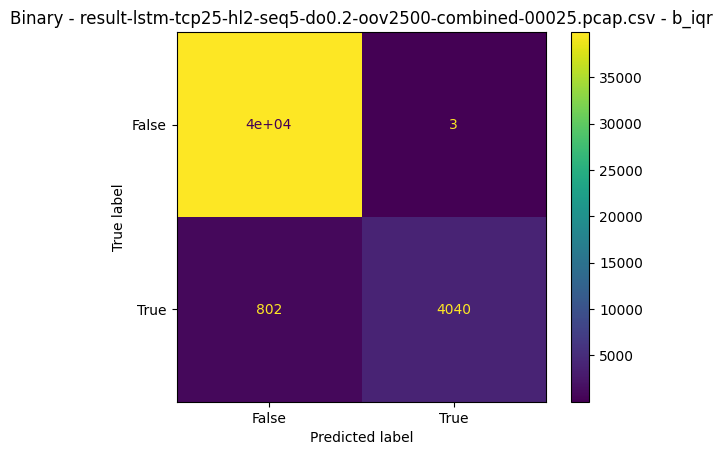

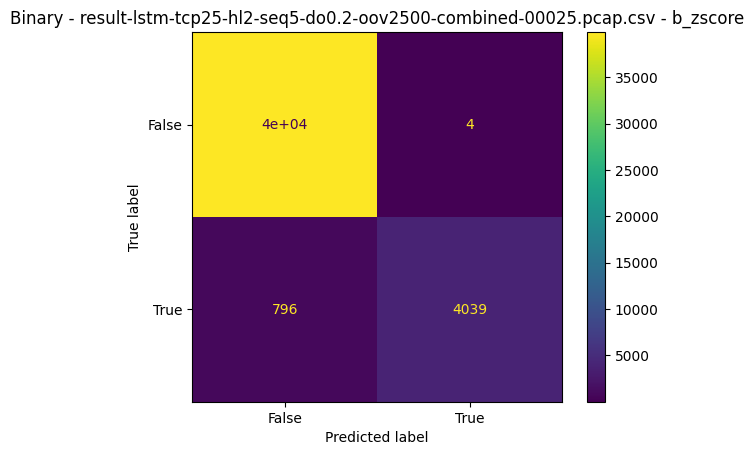

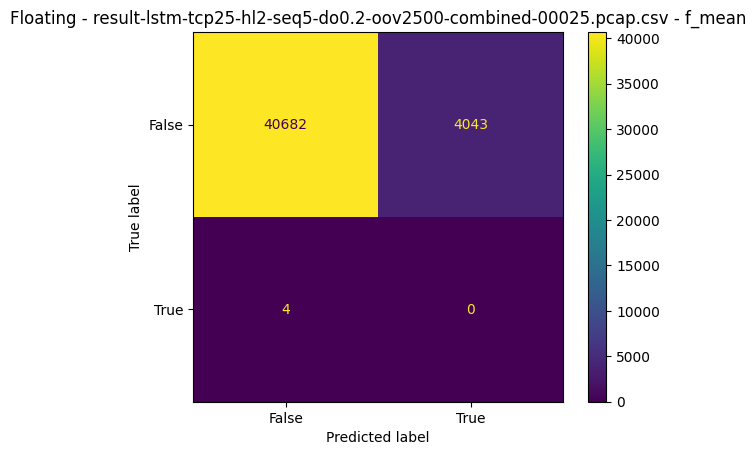

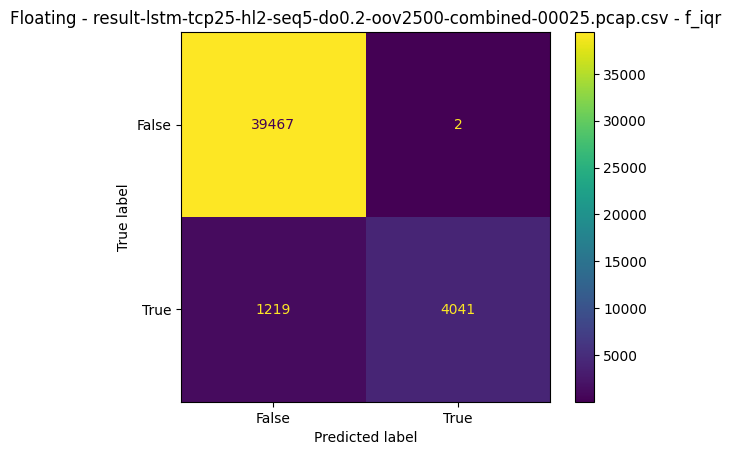

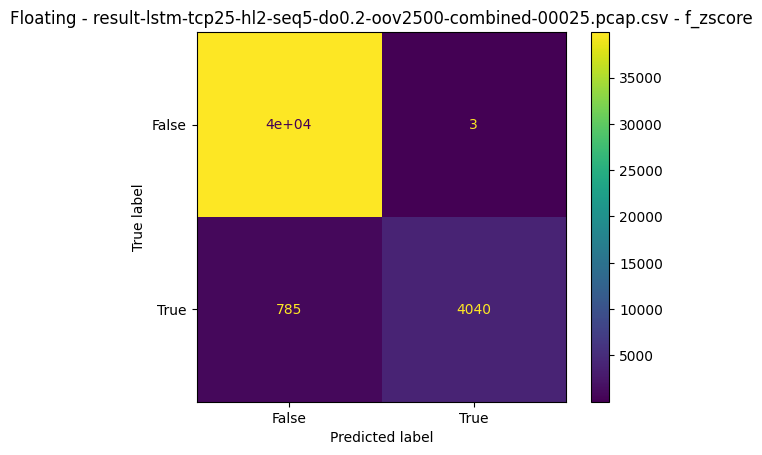

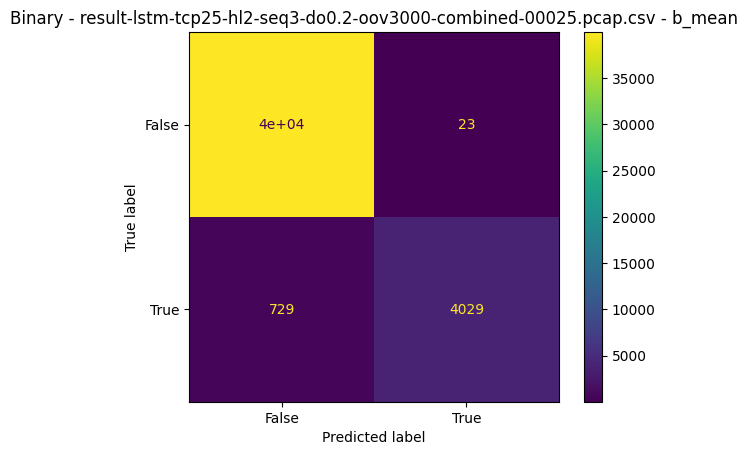

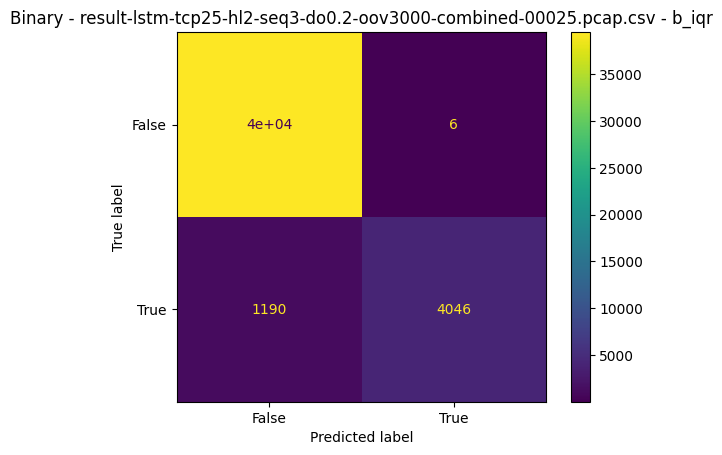

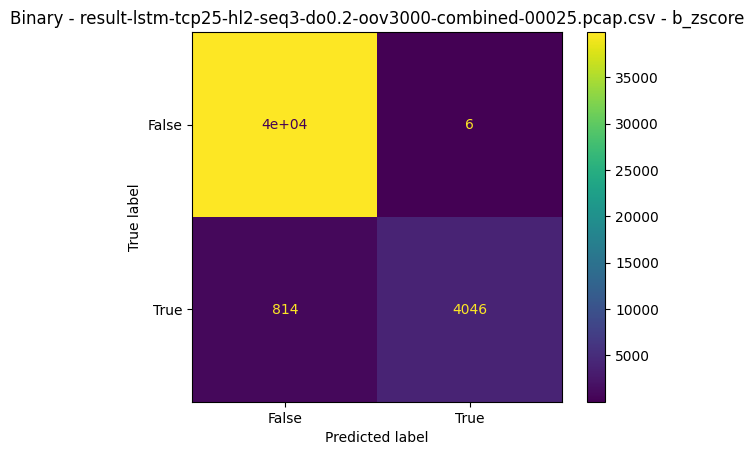

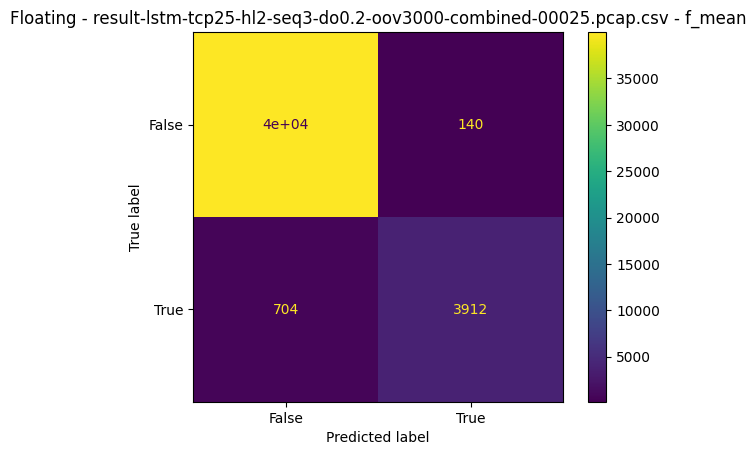

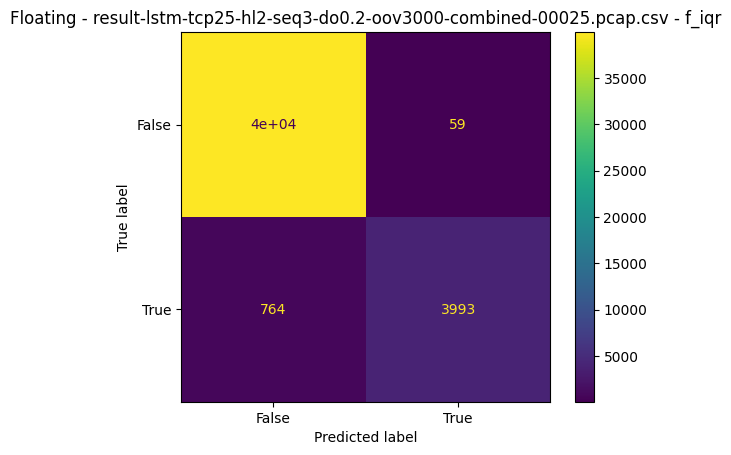

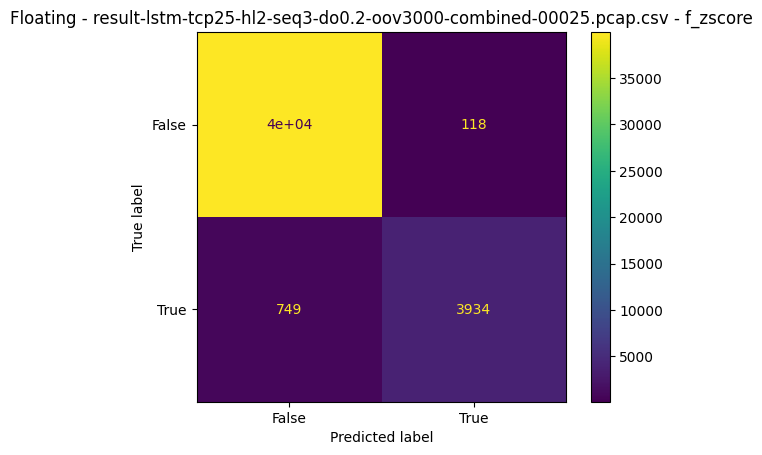

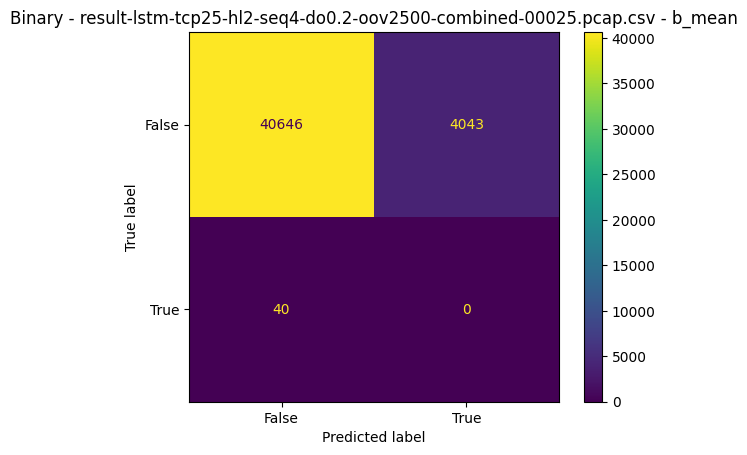

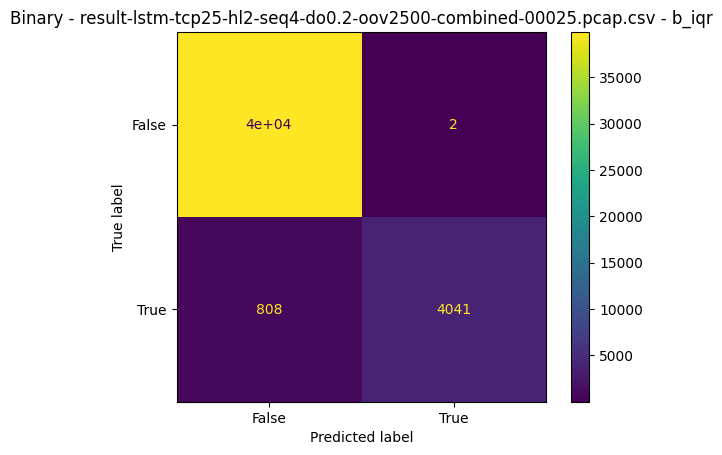

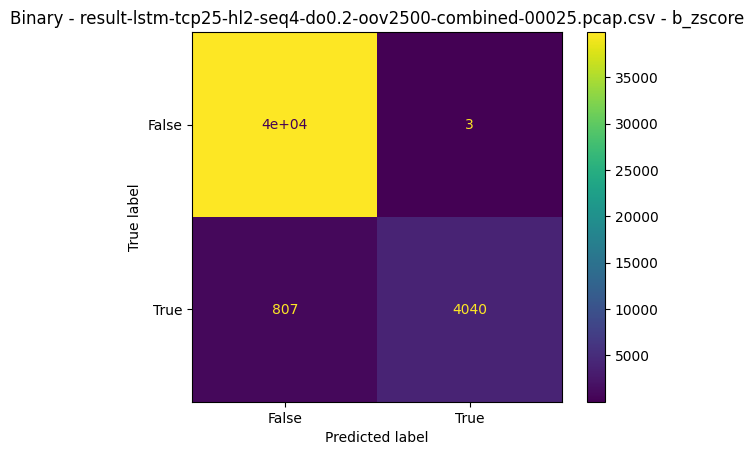

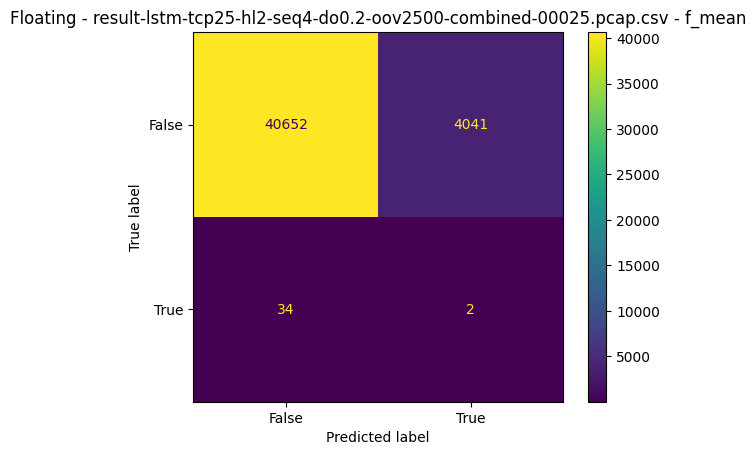

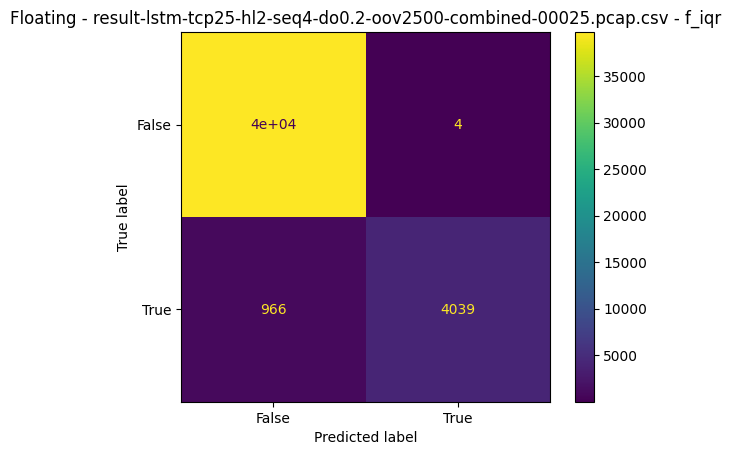

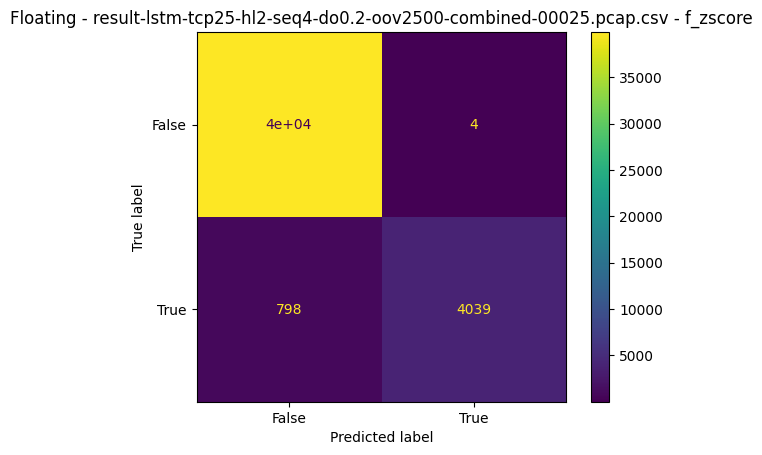

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


for key, val in df_preds.items():
    for method in methods:
        if method == 'binary':
            for i in threshold:
                conf_matrix = confusion_matrix(val[i], val['predicted'])
                cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
                cm_display.plot()
                plt.title(f'Binary - {key} - {i.strip()}')
                plt.show()
        else:
            for i in threshold_2:
                conf_matrix = confusion_matrix(val[i], val['predicted'])
                cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
                cm_display.plot()
                plt.title(f'Floating - {key} - {i.strip()}')
                plt.show()


### F2-Score

In [18]:
for key, val in df_preds.items():
    score[key]['F2 Score'] = dict()
    for method in methods:
        if method == 'binary':
            for i in threshold:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
                score[key]['F2 Score'][i] = f2
                print(f'F2-Binary-{i}: {f2}')
        else:
            for i in threshold_2:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
                score[key]['F2 Score'][i] = f2
                print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.029997600191984643
F2-Binary-b_iqr: 0.7772689914289069
F2-Binary-b_zscore: 0.8587861095377107
F2-Floating-f_mean: 0.00245398773006135
F2-Floating-f_iqr: 0.8661484948683815
F2-Floating-f_zscore: 0.868619427094551
F2-Binary-b_mean: 0.0024372410431391664
F2-Binary-b_iqr: 0.841577958672511
F2-Binary-b_zscore: 0.8623272135918175
F2-Floating-f_mean: 0.008572128337007103
F2-Floating-f_iqr: 0.8465239964543497
F2-Floating-f_zscore: 0.847321466322777
F2-Binary-b_mean: 0.0760025873221216
F2-Binary-b_iqr: 0.8030646992054483
F2-Binary-b_zscore: 0.8628862359550562
F2-Floating-f_mean: 0.7223554657914668
F2-Floating-f_iqr: 0.7665745856353591
F2-Floating-f_zscore: 0.8239409249902837
F2-Binary-b_mean: 0.0011859582542694497
F2-Binary-b_iqr: 0.8048489666136724
F2-Binary-b_zscore: 0.8612623341272542
F2-Floating-f_mean: 0.01715462031107045
F2-Floating-f_iqr: 0.8804632867132867
F2-Floating-f_zscore: 0.8920343788764842
F2-Binary-b_mean: 0.0011803588290840415
F2-Binary-b_iqr: 0.861035538173

### FPR Score

In [19]:
for key, val in df_preds.items():
    score[key]['FPR Score'] = dict()
    for method in methods:
        if method == 'binary':
            for i in threshold:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                fpr = fp/(fp+tn)
                score[key]['FPR Score'][i] = fpr
                print(f'FPR-Binary-{i}: {fpr}')
        else:
            for i in threshold_2:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                fpr = fp/(fp+tn)
                score[key]['FPR Score'][i] = fpr
                print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.08989216519754799
FPR-Binary-b_iqr: 0.0018042285017279935
FPR-Binary-b_zscore: 0.0025248737563121843
FPR-Floating-f_mean: 0.09036023344737372
FPR-Floating-f_iqr: 0.000225462197504885
FPR-Floating-f_zscore: 0.000250400641025641
FPR-Binary-b_mean: 0.09037437938900568
FPR-Binary-b_iqr: 0.0002767225981736309
FPR-Binary-b_zscore: 0.0003258308687152238
FPR-Floating-f_mean: 0.09025246539502225
FPR-Floating-f_iqr: 0.0008036768214581711
FPR-Floating-f_zscore: 0.0008788008135184673
FPR-Binary-b_mean: 0.08951713219495647
FPR-Binary-b_iqr: 0.002273071677526898
FPR-Binary-b_zscore: 0.002995132909022838
FPR-Floating-f_mean: 0.042177033492822966
FPR-Floating-f_iqr: 0.012509695013635568
FPR-Floating-f_zscore: 0.016250153884032992
FPR-Binary-b_mean: 0.09061220837900105
FPR-Binary-b_iqr: 5.06701122342986e-05
FPR-Binary-b_zscore: 5.014667903618083e-05
FPR-Floating-f_mean: 0.09037789916718904
FPR-Floating-f_iqr: 0.000574411228490797
FPR-Floating-f_zscore: 0.0006231616730644599
FPR-Bin

In [20]:
df_scores = dict()
for key, val in df_preds.items():
    df_scores[key] = pd.DataFrame.from_dict(score[key])
    print(df_scores[key])

          Detection Rate  F2 Score  FPR Score
b_mean          0.806452  0.029998   0.089892
b_iqr           0.738702  0.777269   0.001804
b_zscore        0.833933  0.858786   0.002525
f_mean          0.250000  0.002454   0.090360
f_iqr           0.838495  0.866148   0.000225
f_zscore        0.841435  0.868619   0.000250
          Detection Rate  F2 Score  FPR Score
b_mean          0.133333  0.002437   0.090374
b_iqr           0.809964  0.841578   0.000277
b_zscore        0.834196  0.862327   0.000326
f_mean          0.700000  0.008572   0.090252
f_iqr           0.816572  0.846524   0.000804
f_zscore        0.817625  0.847321   0.000879
          Detection Rate  F2 Score  FPR Score
b_mean          0.176360  0.076003   0.089517
b_iqr           0.768723  0.803065   0.002273
b_zscore        0.839633  0.862886   0.002995
f_mean          0.776459  0.722355   0.042177
f_iqr           0.743252  0.766575   0.012510
f_zscore        0.820711  0.823941   0.016250
          Detection Rate  F2 Score

In [21]:
with pd.ExcelWriter("Hasil Eksperimen 3.xlsx") as writer:
    for key, val in df_scores.items():
        seq = key.split('-')[4]
        oov = key.split('-')[6]
        val.to_excel(writer, sheet_name=f'{seq}-{oov}', index=False)